In [1]:
import nidaqmx
from nidaqmx.constants import AcquisitionType
from nidaqmx.stream_readers import AnalogMultiChannelReader
import numpy as np
from matplotlib.pyplot import *
import time

In [2]:
task = nidaqmx.Task()
#device = "Dev1"
device = 'OTKB'
task.ai_channels.add_ai_voltage_chan(device + "/ai0")
task.ai_channels.add_ai_voltage_chan(device + "/ai1")
task.ai_channels.add_ai_voltage_chan(device + "/ai2")
sample_rate = 1000
n_points=2000

task.timing.cfg_samp_clk_timing(rate=sample_rate,
                                sample_mode=AcquisitionType.CONTINUOUS,
                                samps_per_chan=n_points)

In [3]:
task.start()

In [4]:
reader = AnalogMultiChannelReader(task.in_stream)

<IPython.core.display.Javascript object>


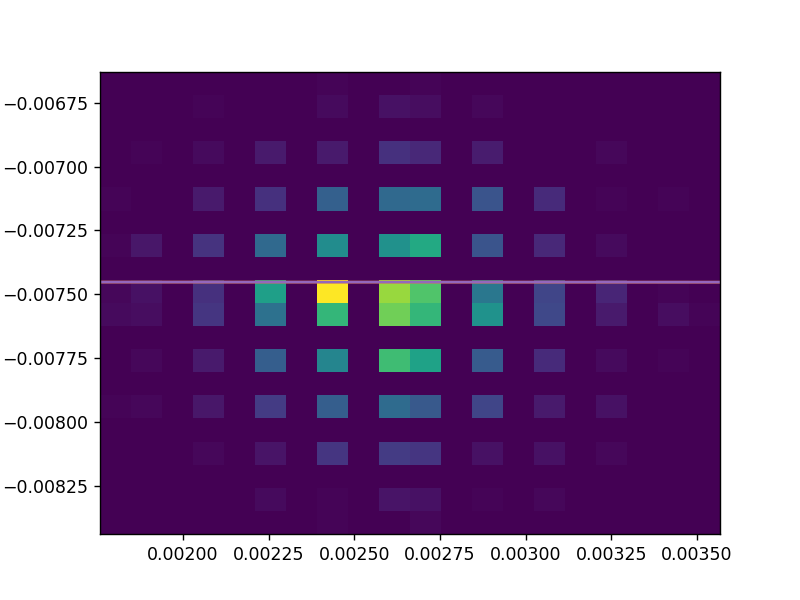

[0.00225128 0.00241575 0.00274468 ... 0.00258021 0.00258021 0.00241575] [-0.00745225 -0.00761671 -0.00728778 ... -0.00761671 -0.00712331
 -0.00745225]


In [5]:
subplots()
h = hist2d([],[],bins=20)

i=0
#while i < 20:
print(i,end='\r')
data_out = np.empty(shape=(3, n_points))
reader.read_many_sample(data = data_out,
                       number_of_samples_per_channel=n_points, timeout = 200)

x = data_out[0,:]
y = data_out[1,:]
print(x,y)
h = hist2d(x,y,bins=20)
draw()
time.sleep(1)

i+=1

In [1]:
import numpy as np
import matplotlib.pyplot as plt



plt.plot(data_out[0,:],label='x')
plt.plot(data_out[1,:],label='y')
pltplot(data_out[2,:],label='z')

show()

NameError: name 'data_out' is not defined

# Tropelias

In [1]:
import nidaqmx
from nidaqmx.constants import AcquisitionType
from nidaqmx.stream_readers import AnalogMultiChannelReader
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
task = nidaqmx.Task()
#device = "Dev1"
device = 'OTKB' #requires initialization in NI MAX
task.ai_channels.add_ai_voltage_chan(device + "/ai0")
task.ai_channels.add_ai_voltage_chan(device + "/ai1")
task.ai_channels.add_ai_voltage_chan(device + "/ai2")
#acq_time=5  ##seconds
#sample_rate = 1000
#n_points=sample_rate*acq_time

#task.timing.cfg_samp_clk_timing(rate=sample_rate,
 #                               sample_mode=AcquisitionType.CONTINUOUS,
  #                              samps_per_chan=n_points)

AIChannel(name=OTKB/ai2)

In [3]:
task.start()
reader = AnalogMultiChannelReader(task.in_stream)


data_out = np.empty(shape=(3, n_points))
reader.read_many_sample(data = data_out,
                       number_of_samples_per_channel=n_points)


print(data_out)
print(np.shape(data_out))

task.stop()

NameError: name 'n_points' is not defined

In [7]:
def file_save(self):
        name = QtGui.QFileDialog.getSaveFileName(self, 'Save File')
        file = open(name,'w')
        text = self.textEdit.toPlainText()
        file.write(text)
        file.close()

# PyQt Version

In [2]:
from PyQt5.QtCore import *
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
import numpy as np
import os

import sys

class acquisition_widget(QWidget):
    """
    This is my widget.
    """
    def __init__(self, parent=None):
        super().__init__()
        
    
        self.global_layout = QHBoxLayout(self)
        
        layout1=QVBoxLayout(self)
        
        #file name
        self.filelabel=QLabel(self)
        self.filelabel.setText('File Name')
        layout1.addWidget(self.filelabel)
        
        self.filename=QLineEdit(self)
        self.filename.setText('')
        layout1.addWidget(self.filename)
        
        #sample rate
        self.samplelabel=QLabel(self)
        self.samplelabel.setText('Sample Rate (kHz)')
        layout1.addWidget(self.samplelabel)
        
        self.samplerate=QLineEdit(self)
        self.samplerate.setText('')
        layout1.addWidget(self.samplerate)
        
        self.samplerate.returnPressed.connect(self.update_sample_rate)
        
        #acquisition time
        self.acqlabel=QLabel(self)
        self.acqlabel.setText('Acquisition Time (s)')
        layout1.addWidget(self.acqlabel)
        
        self.acqtime=QLineEdit(self)
        self.acqtime.setText('')
        layout1.addWidget(self.acqtime)
        
        #button
        
        self.recording_button=QToolButton(self)
        self.recording_button.setText('Start Recording')
        self.recording_button.clicked.connect(self.start_recording)
        
        layout1.addWidget(self.recording_button)
        
        
        self.global_layout.addLayout(layout1)
        
        #self.setFixedWidth(300)
        #self.setFixedHeight(300)
        
    def update_sample_rate(self):
        if float(self.samplerate.text())<=10:
            self.samplerate.setText(str(self.samplerate.text()))
        else:
            msg = QMessageBox()
            msg.setIcon(QMessageBox.Critical)
            msg.setText("Error")
            msg.setInformativeText('The sample rate is too high')
            msg.setWindowTitle("Error")
            msg.exec_()
            self.samplerate.setText('0')
    
    def file_save(self,data,filename):
        default_dir =""
        default_filename = os.path.join(default_dir, filename)
        filepath, _ = QFileDialog.getSaveFileName(self, "Save file", default_filename, "Files")
        
        if filepath:
            np.savetxt(filepath, np.column_stack(data),header='X,Y,SUM')
        
        
    def start_recording(self):
        print('baby')
        acq_time=int(self.acqtime.text())
        sample_rate=int(self.samplerate.text())*1000
        n_points=sample_rate*acq_time
        task.timing.cfg_samp_clk_timing(rate=sample_rate,
                                sample_mode=AcquisitionType.CONTINUOUS,
                                samps_per_chan=n_points)
        
        task.start()
        reader = AnalogMultiChannelReader(task.in_stream)
        data_out = np.empty(shape=(3, n_points))
        reader.read_many_sample(data = data_out,
                       number_of_samples_per_channel=n_points)
        
        task.stop()
        
        print('Acquisition Sucessful')
        
        self.file_save(np.array(data_out),self.filename.text())
    
    def closeEvent(self, event):
        event.accept()
        
     
qapp = QCoreApplication.instance()
if qapp is None:
    qapp = QApplication(sys.argv)
    
if __name__ == "__main__": 
    #start the widget
    ui = acquisition_widget()
    #show the widget
    ui.show()
    #start the events loop
    qapp.exec_()
        

baby


NameError: name 'task' is not defined

# Multithread Version

In [2]:
from PyQt5.QtCore import *
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from nidaqmx.stream_readers import AnalogMultiChannelReader
from nidaqmx.constants import AcquisitionType
import numpy as np
import os
from DAQ import DAQ

import sys

class acquisition_widget(QWidget):
    """
    This is my widget.
    """
    def __init__(self, parent=None):
        super().__init__()
        
        self.daq=DAQ()
        
        self.global_layout = QHBoxLayout(self)
        
        layout1=QVBoxLayout(self)
        
        #file name
        self.filelabel=QLabel(self)
        self.filelabel.setText('File Name')
        layout1.addWidget(self.filelabel)
        
        self.filename=QLineEdit(self)
        self.filename.setText('')
        layout1.addWidget(self.filename)
        
        #sample rate
        self.samplelabel=QLabel(self)
        self.samplelabel.setText('Sample Rate (kHz)')
        layout1.addWidget(self.samplelabel)
        
        self.samplerate=QLineEdit(self)
        self.samplerate.setText('')
        layout1.addWidget(self.samplerate)
        
        self.samplerate.returnPressed.connect(self.update_sample_rate)
        
        #acquisition time
        self.acqlabel=QLabel(self)
        self.acqlabel.setText('Acquisition Time (s)')
        layout1.addWidget(self.acqlabel)
        
        self.acqtime=QLineEdit(self)
        self.acqtime.setText('')
        layout1.addWidget(self.acqtime)
        
        #button
        
        self.recording_button=QToolButton(self)
        self.recording_button.setText('Start Recording')
        self.recording_button.clicked.connect(self.thread)
        
        layout1.addWidget(self.recording_button)
        
        
        self.global_layout.addLayout(layout1)
        
        #self.setFixedWidth(300)
        #self.setFixedHeight(300)
    def thread(self):
        self.thread=QThread()
        self.worker=Worker_DAQ(self.daq,int(self.acqtime.text()),int(self.samplerate.text()),self.filename.text())
        self.worker.moveToThread(self.thread)
        self.thread.started.connect(self.worker.start_recording)
        self.worker.finished.connect(self.thread.quit)
        self.worker.finished.connect(self.worker.deleteLater)
        self.thread.finished.connect(self.thread.deleteLater)
        self.thread.start()
        
    def update_sample_rate(self):
        if float(self.samplerate.text())<=10:
            self.samplerate.setText(str(self.samplerate.text()))
        else:
            msg = QMessageBox()
            msg.setIcon(QMessageBox.Critical)
            msg.setText("Error")
            msg.setInformativeText('The sample rate is too high')
            msg.setWindowTitle("Error")
            msg.exec_()
            self.samplerate.setText('0')
    
    def closeEvent(self, event):
        self.thread.exit()
        event.accept()
        
class Worker_DAQ(QThread):
    finished=pyqtSignal()
    data=pyqtSignal()
    
    def __init__(self,daq,acq,sr,file):
        super(Worker_DAQ,self).__init__()
        self.daq=daq
        self.acq=acq
        self.sr=sr*1000
        self.file=file
    
    def start_recording(self):
        print('baby')
        n_points=self.sr*self.acq
        self.daq.task.timing.cfg_samp_clk_timing(rate=self.sr,
                                sample_mode=AcquisitionType.CONTINUOUS,
                                samps_per_chan=n_points)
        
        self.daq.task.start()
        reader = AnalogMultiChannelReader(self.daq.task.in_stream)
        data_out = np.empty(shape=(3, n_points))
        reader.read_many_sample(data = data_out,number_of_samples_per_channel=n_points)
        
        self.daq.task.stop()
        
        print('Acquisition Sucessful')
        
        self.file_save(np.array(data_out),self.file)
        
    def file_save(self,data,filename):
        default_dir =""
        default_filename = os.path.join(default_dir, filename)
        filepath, _ = QFileDialog.getSaveFileName(self, "Save file", default_filename, "Files")
        
        if filepath:
            np.savetxt(filepath, np.column_stack(data),header='X,Y,SUM')
        
        
qapp = QCoreApplication.instance()
if qapp is None:
    qapp = QApplication(sys.argv)
    
if __name__ == "__main__": 
    #start the widget
    ui = acquisition_widget()
    #show the widget
    ui.show()
    #start the events loop
    qapp.exec_()

baby
Acquisition Sucessful


TypeError: getSaveFileName(parent: QWidget = None, caption: str = '', directory: str = '', filter: str = '', initialFilter: str = '', options: Union[QFileDialog.Options, QFileDialog.Option] = 0): argument 1 has unexpected type 'Worker_DAQ'

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2156248d280>


In [4]:
import numpy as np
a=np.empty(shape=(2,10))
b=np.array([1,3])
a[:,0]=b
print(a)

[[1.00000000e+000 1.10823690e-311 1.10823690e-311 1.10823690e-311
  1.10823694e-311 1.10823694e-311 1.10823694e-311 1.10823694e-311
  1.10823694e-311 1.10823694e-311]
 [3.00000000e+000 1.10823693e-311 1.10823694e-311 1.10823694e-311
  1.10823694e-311 1.10823694e-311 1.10823694e-311 1.10823694e-311
  1.10823694e-311 1.10823694e-311]]


## Fixing stalling

In [1]:
from PyQt5.QtCore import *
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from nidaqmx.stream_readers import AnalogMultiChannelReader
from nidaqmx.constants import AcquisitionType
import numpy as np
import os
from DAQ import DAQ

import sys

class acquisition_widget(QWidget):
    """
    This is my widget.
    """
    def __init__(self, parent=None):
        super().__init__()
        
        #self.daq=DAQ()
        
        self.global_layout = QHBoxLayout(self)
        
        layout1=QVBoxLayout(self)
        
        #file name
        self.filelabel=QLabel(self)
        self.filelabel.setText('File Name')
        layout1.addWidget(self.filelabel)
        
        self.filename=QLineEdit(self)
        self.filename.setText('')
        layout1.addWidget(self.filename)
        
        #sample rate
        self.samplelabel=QLabel(self)
        self.samplelabel.setText('Sample Rate (kHz)')
        layout1.addWidget(self.samplelabel)
        
        self.samplerate=QLineEdit(self)
        self.samplerate.setText('')
        layout1.addWidget(self.samplerate)
        
        self.samplerate.returnPressed.connect(self.update_sample_rate)
        
        #acquisition time
        self.acqlabel=QLabel(self)
        self.acqlabel.setText('Acquisition Time (s)')
        layout1.addWidget(self.acqlabel)
        
        self.acqtime=QLineEdit(self)
        self.acqtime.setText('')
        layout1.addWidget(self.acqtime)
        
        #button
        
        self.recording_button=QToolButton(self)
        self.recording_button.setText('Start Recording')
        self.recording_button.clicked.connect(self.thread)
        
        layout1.addWidget(self.recording_button)
        
        
        self.global_layout.addLayout(layout1)
        
        #self.setFixedWidth(300)
        #self.setFixedHeight(300)
    def thread(self):
        self.thread=QThread()
        self.worker=Worker_DAQ(int(self.acqtime.text()),int(self.samplerate.text()),self.filename.text())
        self.worker.moveToThread(self.thread)
        self.thread.started.connect(self.worker.start_recording)
        self.worker.finished.connect(self.thread.quit)
        self.worker.finished.connect(self.worker.deleteLater)
        self.thread.finished.connect(self.thread.deleteLater)
        self.thread.start()
        
    def update_sample_rate(self):
        if float(self.samplerate.text())<=10:
            self.samplerate.setText(str(self.samplerate.text()))
        else:
            msg = QMessageBox()
            msg.setIcon(QMessageBox.Critical)
            msg.setText("Error")
            msg.setInformativeText('The sample rate is too high')
            msg.setWindowTitle("Error")
            msg.exec_()
            self.samplerate.setText('0')
    
    def closeEvent(self, event):
        self.worker.stop()
        self.thread.exit()
        event.accept()
        
class Worker_DAQ(QThread):
    finished=pyqtSignal()
    data=pyqtSignal(list)
    
    def __init__(self,acq,sr,file):
        super(Worker_DAQ,self).__init__()
        self.daq=DAQ()
        self.acq=acq
        self.sr=sr*1000
        self.file=file
    
    def callback(self,task_handle, every_n_samples_event_type,number_of_samples, callback_data):
        #print(every_n_samples_event_type)
        data_out = np.empty(shape=(3, number_of_samples))
        self.reader.read_many_sample(data_out,number_of_samples)
        
        print(data_out[0])
        return 0
            #self.file_save(np.array(data_out),self.file)
    
    def start_recording(self):
        #self.daq.task.start()
        n_points=self.sr*self.acq
        self.daq.task.timing.cfg_samp_clk_timing(rate=self.sr,
                                                 sample_mode=AcquisitionType.CONTINUOUS,
                                                samps_per_chan=n_points)
        
        #self.daq.task.in_stream.input_buf_size = 10
        self.reader = AnalogMultiChannelReader(self.daq.task.in_stream)
        self.daq.task.register_every_n_samples_acquired_into_buffer_event(500,self.callback)
        self.daq.task.start()
        
        #self.daq.task.stop()
        
    def file_save(self,data,filename):
        default_dir =""
        default_filename = os.path.join(default_dir, filename)
        filepath, _ = QFileDialog.getSaveFileName(self, "Save file", default_filename, "(*.dat)")
        
        if filepath:
            np.savetxt(filepath, np.column_stack(data),delimiter='\t',header='Samples per channel: ' + str(sr) +'\nX\tY\tSUM')
        
        self.daq.task.stop()
        self.finished.emit()
    
    def start(self):
        self.flag=True
        
    def stop(self):
        self.flag=False
        
        
qapp = QCoreApplication.instance()
if qapp is None:
    qapp = QApplication(sys.argv)
    
if __name__ == "__main__": 
    #start the widget
    ui = acquisition_widget()
    #show the widget
    ui.show()
    #start the events loop
    qapp.exec_()

[0.00307361 0.00225128 0.00290915 0.00258021 0.00274468 0.00225128
 0.00225128 0.00307361 0.00274468 0.00258021 0.00274468 0.00258021
 0.00290915 0.00241575 0.00225128 0.00274468 0.00241575 0.00290915
 0.00225128 0.00258021 0.00241575 0.00241575 0.00225128 0.00241575
 0.00290915 0.00241575 0.00241575 0.00307361 0.00274468 0.00225128
 0.00290915 0.00290915 0.00258021 0.00241575 0.00258021 0.00225128
 0.00274468 0.00175788 0.00274468 0.00274468 0.00241575 0.00258021
 0.00258021 0.00290915 0.00274468 0.00258021 0.00258021 0.00323808
 0.00241575 0.00274468 0.00258021 0.00258021 0.00258021 0.00241575
 0.00208681 0.00241575 0.00274468 0.00225128 0.00258021 0.00258021
 0.00258021 0.00225128 0.00274468 0.00258021 0.00274468 0.00208681
 0.00274468 0.00274468 0.00290915 0.00208681 0.00274468 0.00307361
 0.00241575 0.00225128 0.00225128 0.00307361 0.00208681 0.00274468
 0.00192235 0.00290915 0.00290915 0.00258021 0.00208681 0.00274468
 0.00241575 0.00225128 0.00225128 0.00274468 0.00307361 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a0ec8fd00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acc40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acd00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acc40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acfa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acdc0>


[0.00208681 0.00258021 0.00241575 0.00290915 0.00290915 0.00290915
 0.00225128 0.00241575 0.00274468 0.00241575 0.00225128 0.00225128
 0.00258021 0.00225128 0.00241575 0.00258021 0.00307361 0.00225128
 0.00290915 0.00241575 0.00274468 0.00241575 0.00241575 0.00208681
 0.00241575 0.00258021 0.00258021 0.00274468 0.00241575 0.00258021
 0.00208681 0.00258021 0.00290915 0.00274468 0.00225128 0.00290915
 0.00258021 0.00241575 0.00208681 0.00274468 0.00241575 0.00208681
 0.00241575 0.00258021 0.00274468 0.00258021 0.00241575 0.00241575
 0.00290915 0.00225128 0.00241575 0.00241575 0.00307361 0.00225128
 0.00241575 0.00241575 0.00241575 0.00258021 0.00258021 0.00274468
 0.00274468 0.00258021 0.00241575 0.00290915 0.00225128 0.00258021
 0.00258021 0.00258021 0.00258021 0.00225128 0.00208681 0.00241575
 0.00241575 0.00258021 0.00258021 0.00241575 0.00274468 0.00192235
 0.00290915 0.00274468 0.00258021 0.00225128 0.00290915 0.00258021
 0.00258021 0.00192235 0.00225128 0.00225128 0.00274468 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107ac460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acd60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107ace20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107acd60>



[0.00290915 0.00290915 0.00290915 0.00208681 0.00258021 0.00241575
 0.00241575 0.00192235 0.00274468 0.00241575 0.00274468 0.00258021
 0.00274468 0.00241575 0.00258021 0.00274468 0.00241575 0.00290915
 0.00241575 0.00274468 0.00258021 0.00323808 0.00241575 0.00241575
 0.00208681 0.00290915 0.00225128 0.00225128 0.00274468 0.00307361
 0.00274468 0.00192235 0.00258021 0.00241575 0.00258021 0.00208681
 0.00274468 0.00225128 0.00258021 0.00175788 0.00258021 0.00258021
 0.00241575 0.00274468 0.00258021 0.00274468 0.00241575 0.00241575
 0.00208681 0.00307361 0.00208681 0.00258021 0.00258021 0.00258021
 0.00258021 0.00274468 0.00274468 0.00258021 0.00258021 0.00241575
 0.00307361 0.00307361 0.00274468 0.00208681 0.00307361 0.00258021
 0.00274468 0.00208681 0.00290915 0.00258021 0.00225128 0.00225128
 0.00258021 0.00258021 0.00225128 0.00258021 0.00225128 0.00258021
 0.00192235 0.00274468 0.00258021 0.00274468 0.00208681 0.00225128
 0.00241575 0.00290915 0.00241575 0.00258021 0.00274468 0.002

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107ac460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1160>


[0.00208681 0.00274468 0.00241575 0.00241575 0.00208681 0.00258021
 0.00258021 0.00208681 0.00258021 0.00258021 0.00290915 0.00258021
 0.00290915 0.00258021 0.00307361 0.00225128 0.00290915 0.00274468
 0.00274468 0.00225128 0.00258021 0.00258021 0.00290915 0.00258021
 0.00258021 0.00258021 0.00241575 0.00274468 0.00241575 0.00340255
 0.00241575 0.00274468 0.00241575 0.00290915 0.00241575 0.00258021
 0.00258021 0.00241575 0.00241575 0.00192235 0.00290915 0.00290915
 0.00241575 0.00192235 0.00241575 0.00274468 0.00258021 0.00208681
 0.00274468 0.00258021 0.00258021 0.00192235 0.00274468 0.00274468
 0.00258021 0.00258021 0.00258021 0.00241575 0.00258021 0.00290915
 0.00208681 0.00274468 0.00241575 0.00258021 0.00241575 0.00225128
 0.00241575 0.00225128 0.00258021 0.00274468 0.00258021 0.00225128
 0.00258021 0.00258021 0.00290915 0.00192235 0.00274468 0.00208681
 0.00241575 0.00192235 0.00241575 0.00258021 0.00225128 0.00225128
 0.00258021 0.00307361 0.00258021 0.00307361 0.00225128 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c11c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c12e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1400>



[0.00258021 0.00225128 0.00258021 0.00241575 0.00290915 0.00258021
 0.00258021 0.00258021 0.00290915 0.00307361 0.00258021 0.00258021
 0.00274468 0.00274468 0.00258021 0.00241575 0.00274468 0.00258021
 0.00290915 0.00225128 0.00258021 0.00323808 0.00208681 0.00258021
 0.00307361 0.00258021 0.00225128 0.00258021 0.00258021 0.00241575
 0.00241575 0.00208681 0.00307361 0.00274468 0.00307361 0.00241575
 0.00307361 0.00241575 0.00307361 0.00258021 0.00290915 0.00225128
 0.00274468 0.00208681 0.00274468 0.00241575 0.00290915 0.00241575
 0.00258021 0.00274468 0.00258021 0.00290915 0.00208681 0.00323808
 0.00241575 0.00290915 0.00258021 0.00274468 0.00241575 0.00307361
 0.00241575 0.00258021 0.00208681 0.00241575 0.00274468 0.00241575
 0.00241575 0.00208681 0.00307361 0.00258021 0.00290915 0.00225128
 0.00274468 0.00258021 0.00258021 0.00225128 0.00274468 0.00225128
 0.00258021 0.00225128 0.00274468 0.00307361 0.00208681 0.00307361
 0.00241575 0.00323808 0.00208681 0.00274468 0.00241575 0.002

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1580>


[0.00241575 0.00290915 0.00208681 0.00274468 0.00225128 0.00225128
 0.00274468 0.00274468 0.00274468 0.00241575 0.00274468 0.00274468
 0.00258021 0.00225128 0.00290915 0.00241575 0.00258021 0.00241575
 0.00241575 0.00208681 0.00258021 0.00192235 0.00258021 0.00290915
 0.00225128 0.00258021 0.00241575 0.00323808 0.00241575 0.00274468
 0.00274468 0.00307361 0.00225128 0.00258021 0.00225128 0.00241575
 0.00208681 0.00241575 0.00274468 0.00258021 0.00258021 0.00208681
 0.00290915 0.00225128 0.00274468 0.00208681 0.00307361 0.00241575
 0.00274468 0.00241575 0.00274468 0.00208681 0.00208681 0.00208681
 0.00241575 0.00274468 0.00274468 0.00258021 0.00241575 0.00274468
 0.00241575 0.00290915 0.00175788 0.00274468 0.00225128 0.00290915
 0.00241575 0.00274468 0.00258021 0.00241575 0.00241575 0.00225128
 0.00274468 0.00274468 0.00290915 0.00241575 0.00258021 0.00225128
 0.00290915 0.00241575 0.00258021 0.00208681 0.00307361 0.00192235
 0.00258021 0.00225128 0.00258021 0.00258021 0.00225128 0.0030

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c18e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1a60>


[0.00192235 0.00241575 0.00290915 0.00225128 0.00241575 0.00241575
 0.00290915 0.00225128 0.00241575 0.00258021 0.00274468 0.00258021
 0.00274468 0.00241575 0.00258021 0.00290915 0.00192235 0.00241575
 0.00258021 0.00274468 0.00192235 0.00241575 0.00258021 0.00307361
 0.00258021 0.00225128 0.00225128 0.00307361 0.00258021 0.00241575
 0.00241575 0.00290915 0.00290915 0.00241575 0.00340255 0.00274468
 0.00290915 0.00241575 0.00274468 0.00258021 0.00307361 0.00192235
 0.00258021 0.00225128 0.00258021 0.00225128 0.00258021 0.00290915
 0.00307361 0.00258021 0.00258021 0.00274468 0.00274468 0.00274468
 0.00258021 0.00274468 0.00274468 0.00258021 0.00241575 0.00258021
 0.00241575 0.00274468 0.00225128 0.00274468 0.00274468 0.00274468
 0.00307361 0.00258021 0.00258021 0.00241575 0.00258021 0.00225128
 0.00225128 0.00208681 0.00258021 0.00274468 0.00258021 0.00225128
 0.00241575 0.00274468 0.00241575 0.00274468 0.00274468 0.00241575
 0.00225128 0.00192235 0.00208681 0.00258021 0.00208681 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1d00>


[0.00274468 0.00241575 0.00290915 0.00225128 0.00307361 0.00290915
 0.00274468 0.00208681 0.00290915 0.00241575 0.00274468 0.00208681
 0.00225128 0.00274468 0.00208681 0.00241575 0.00241575 0.00274468
 0.00225128 0.00290915 0.00241575 0.00225128 0.00208681 0.00241575
 0.00258021 0.00258021 0.00258021 0.00241575 0.00241575 0.00225128
 0.00225128 0.00274468 0.00290915 0.00258021 0.00241575 0.00258021
 0.00258021 0.00225128 0.00258021 0.00274468 0.00307361 0.00241575
 0.00225128 0.00274468 0.00241575 0.00258021 0.00225128 0.00307361
 0.00241575 0.00241575 0.00225128 0.00274468 0.00241575 0.00274468
 0.00241575 0.00258021 0.00290915 0.00175788 0.00241575 0.00258021
 0.00307361 0.00241575 0.00258021 0.00274468 0.00274468 0.00225128
 0.00258021 0.00258021 0.00274468 0.00258021 0.00274468 0.00258021
 0.00241575 0.00290915 0.00274468 0.00323808 0.00274468 0.00290915
 0.00192235 0.00274468 0.00241575 0.00274468 0.00241575 0.00258021
 0.00258021 0.00208681 0.00290915 0.00290915 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c10a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c10a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c13a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1400>


[0.00274468 0.00290915 0.00258021 0.00274468 0.00258021 0.00323808
 0.00208681 0.00274468 0.00241575 0.00258021 0.00225128 0.00241575
 0.00274468 0.00258021 0.00241575 0.00225128 0.00307361 0.00241575
 0.00290915 0.00225128 0.00323808 0.00241575 0.00241575 0.00208681
 0.00274468 0.00258021 0.00241575 0.00225128 0.00290915 0.00258021
 0.00274468 0.00241575 0.00241575 0.00274468 0.00225128 0.00307361
 0.00241575 0.00241575 0.00208681 0.00274468 0.00225128 0.00241575
 0.00241575 0.00274468 0.00274468 0.00241575 0.00258021 0.00274468
 0.00241575 0.00225128 0.00258021 0.00274468 0.00307361 0.00241575
 0.00241575 0.00225128 0.00241575 0.00208681 0.00258021 0.00290915
 0.00225128 0.00258021 0.00241575 0.00274468 0.00258021 0.00274468
 0.00208681 0.00290915 0.00241575 0.00258021 0.00258021 0.00323808
 0.00258021 0.00241575 0.00208681 0.00258021 0.00290915 0.00225128
 0.00274468 0.00290915 0.00274468 0.00241575 0.00241575 0.00241575
 0.00274468 0.00225128 0.00241575 0.00241575 0.00274468 0.0020

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1dc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1640>


[0.00208681 0.00274468 0.00290915 0.00274468 0.00225128 0.00274468
 0.00274468 0.00258021 0.00241575 0.00274468 0.00307361 0.00241575
 0.00274468 0.00258021 0.00258021 0.00258021 0.00241575 0.00225128
 0.00307361 0.00241575 0.00258021 0.00241575 0.00258021 0.00241575
 0.00258021 0.00274468 0.00258021 0.00258021 0.00241575 0.00274468
 0.00225128 0.00274468 0.00225128 0.00274468 0.00225128 0.00225128
 0.00241575 0.00208681 0.00290915 0.00241575 0.00258021 0.00241575
 0.00290915 0.00208681 0.00290915 0.00307361 0.00340255 0.00274468
 0.00258021 0.00258021 0.00307361 0.00208681 0.00225128 0.00258021
 0.00274468 0.00208681 0.00225128 0.00274468 0.00258021 0.00274468
 0.00241575 0.00274468 0.00258021 0.00274468 0.00241575 0.00290915
 0.00241575 0.00241575 0.00192235 0.00258021 0.00208681 0.00258021
 0.00241575 0.00274468 0.00258021 0.00241575 0.00258021 0.00274468
 0.00307361 0.00274468 0.00258021 0.00258021 0.00307361 0.00225128
 0.00290915 0.00225128 0.00307361 0.00258021 0.00208681 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1100>


[0.00258021 0.00225128 0.00290915 0.00274468 0.00225128 0.00241575
 0.00290915 0.00258021 0.00258021 0.00192235 0.00274468 0.00258021
 0.00241575 0.00225128 0.00274468 0.00258021 0.00290915 0.00307361
 0.00258021 0.00274468 0.00241575 0.00241575 0.00274468 0.00274468
 0.00258021 0.00208681 0.00274468 0.00208681 0.00225128 0.00225128
 0.00307361 0.00258021 0.00258021 0.00290915 0.00307361 0.00258021
 0.00274468 0.00241575 0.00274468 0.00241575 0.00241575 0.00192235
 0.00258021 0.00258021 0.00225128 0.00241575 0.00258021 0.00307361
 0.00241575 0.00307361 0.00274468 0.00274468 0.00208681 0.00290915
 0.00241575 0.00290915 0.00208681 0.00241575 0.00290915 0.00258021
 0.00274468 0.00274468 0.00290915 0.00274468 0.00241575 0.00290915
 0.00241575 0.00225128 0.00241575 0.00225128 0.00241575 0.00225128
 0.00241575 0.00258021 0.00225128 0.00274468 0.00258021 0.00323808
 0.00258021 0.00274468 0.00258021 0.00307361 0.00208681 0.00208681
 0.00208681 0.00258021 0.00241575 0.00241575 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1d00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1640>


[0.00225128 0.00290915 0.00241575 0.00274468 0.00208681 0.00225128
 0.00274468 0.00241575 0.00225128 0.00225128 0.00258021 0.00258021
 0.00225128 0.00225128 0.00258021 0.00258021 0.00258021 0.00208681
 0.00258021 0.00225128 0.00258021 0.00241575 0.00241575 0.00274468
 0.00225128 0.00241575 0.00274468 0.00307361 0.00274468 0.00274468
 0.00225128 0.00290915 0.00208681 0.00225128 0.00225128 0.00258021
 0.00258021 0.00225128 0.00290915 0.00241575 0.00290915 0.00225128
 0.00274468 0.00241575 0.00290915 0.00258021 0.00241575 0.00274468
 0.00274468 0.00241575 0.00274468 0.00241575 0.00241575 0.00225128
 0.00258021 0.00274468 0.00274468 0.00258021 0.00274468 0.00274468
 0.00274468 0.00290915 0.00208681 0.00290915 0.00241575 0.00225128
 0.00225128 0.00258021 0.00290915 0.00241575 0.00290915 0.00225128
 0.00307361 0.00274468 0.00274468 0.00241575 0.00258021 0.00241575
 0.00258021 0.00208681 0.00307361 0.00208681 0.00225128 0.00274468
 0.00241575 0.00241575 0.00241575 0.00274468 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107c1220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b80a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b80a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b82e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b81c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b83a0>


[0.00258021 0.00274468 0.00241575 0.00225128 0.00274468 0.00274468
 0.00274468 0.00225128 0.00274468 0.00241575 0.00290915 0.00208681
 0.00290915 0.00225128 0.00241575 0.00208681 0.00192235 0.00274468
 0.00192235 0.00258021 0.00241575 0.00307361 0.00241575 0.00258021
 0.00307361 0.00290915 0.00208681 0.00241575 0.00208681 0.00307361
 0.00258021 0.00258021 0.00225128 0.00258021 0.00241575 0.00258021
 0.00258021 0.00258021 0.00274468 0.00225128 0.00307361 0.00258021
 0.00274468 0.00208681 0.00274468 0.00225128 0.00241575 0.00241575
 0.00241575 0.00290915 0.00241575 0.00258021 0.00241575 0.00258021
 0.00274468 0.00241575 0.00241575 0.00258021 0.00258021 0.00258021
 0.00241575 0.00290915 0.00290915 0.00258021 0.00241575 0.00258021
 0.00258021 0.00258021 0.00258021 0.00192235 0.00274468 0.00241575
 0.00290915 0.00241575 0.00307361 0.00208681 0.00258021 0.00258021
 0.00290915 0.00225128 0.00225128 0.00241575 0.00258021 0.00208681
 0.00241575 0.00290915 0.00274468 0.00258021 0.00225128 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b83a0>


[0.00225128 0.00290915 0.00192235 0.00290915 0.00290915 0.00241575
 0.00208681 0.00241575 0.00274468 0.00241575 0.00225128 0.00290915
 0.00258021 0.00241575 0.00258021 0.00208681 0.00274468 0.00241575
 0.00258021 0.00225128 0.00307361 0.00192235 0.00241575 0.00192235
 0.00290915 0.00258021 0.00258021 0.00241575 0.00258021 0.00225128
 0.00208681 0.00274468 0.00290915 0.00290915 0.00241575 0.00225128
 0.00307361 0.00258021 0.00225128 0.00241575 0.00241575 0.00258021
 0.00258021 0.00241575 0.00274468 0.00290915 0.00225128 0.00274468
 0.00274468 0.00241575 0.00274468 0.00225128 0.00323808 0.00225128
 0.00258021 0.00258021 0.00241575 0.00258021 0.00225128 0.00274468
 0.00258021 0.00241575 0.00225128 0.00323808 0.00290915 0.00274468
 0.00258021 0.00274468 0.00258021 0.00258021 0.00208681 0.00258021
 0.00274468 0.00274468 0.00208681 0.00241575 0.00241575 0.00225128
 0.00258021 0.00225128 0.00307361 0.00225128 0.00241575 0.00258021
 0.00274468 0.00241575 0.00241575 0.00241575 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b88e0>


[0.00258021 0.00274468 0.00241575 0.00307361 0.00258021 0.00290915
 0.00241575 0.00274468 0.00241575 0.00241575 0.00241575 0.00258021
 0.00290915 0.00274468 0.00241575 0.00225128 0.00274468 0.00208681
 0.00274468 0.00258021 0.00290915 0.00175788 0.00241575 0.00225128
 0.00290915 0.00208681 0.00241575 0.00258021 0.00274468 0.00274468
 0.00225128 0.00274468 0.00241575 0.00290915 0.00241575 0.00274468
 0.00241575 0.00241575 0.00225128 0.00225128 0.00241575 0.00241575
 0.00208681 0.00241575 0.00241575 0.00241575 0.00274468 0.00258021
 0.00290915 0.00225128 0.00241575 0.00241575 0.00307361 0.00225128
 0.00258021 0.00175788 0.00258021 0.00241575 0.00208681 0.00258021
 0.00241575 0.00274468 0.00225128 0.00290915 0.00241575 0.00307361
 0.00241575 0.00241575 0.00241575 0.00258021 0.00208681 0.00241575
 0.00241575 0.00258021 0.00241575 0.00225128 0.00258021 0.00258021
 0.00274468 0.00290915 0.00323808 0.00225128 0.00290915 0.00208681
 0.00274468 0.00241575 0.00241575 0.00225128 0.00274468 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8b80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b88e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8ca0>


[0.00225128 0.00274468 0.00225128 0.00258021 0.00225128 0.00307361
 0.00258021 0.00290915 0.00241575 0.00258021 0.00290915 0.00241575
 0.00274468 0.00258021 0.00274468 0.00241575 0.00274468 0.00225128
 0.00290915 0.00241575 0.00258021 0.00241575 0.00290915 0.00241575
 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128 0.00307361
 0.00225128 0.00258021 0.00241575 0.00274468 0.00274468 0.00258021
 0.00225128 0.00290915 0.00258021 0.00241575 0.00175788 0.00274468
 0.00307361 0.00258021 0.00241575 0.00241575 0.00323808 0.00274468
 0.00258021 0.00225128 0.00274468 0.00258021 0.00258021 0.00225128
 0.00274468 0.00274468 0.00192235 0.00258021 0.00241575 0.00290915
 0.00208681 0.00290915 0.00274468 0.00258021 0.00241575 0.00274468
 0.00241575 0.00241575 0.00241575 0.00274468 0.00274468 0.00258021
 0.00241575 0.00241575 0.00290915 0.00258021 0.00258021 0.00241575
 0.00290915 0.00241575 0.00241575 0.00225128 0.00274468 0.00225128
 0.00258021 0.00241575 0.00258021 0.00258021 0.00241575 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8e80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8fa0>



[0.00225128 0.00258021 0.00208681 0.00225128 0.00290915 0.00241575
 0.00225128 0.00241575 0.00258021 0.00258021 0.00241575 0.00208681
 0.00290915 0.00225128 0.00225128 0.00208681 0.00274468 0.00290915
 0.00225128 0.00290915 0.00274468 0.00307361 0.00208681 0.00274468
 0.00258021 0.00274468 0.00241575 0.00258021 0.00208681 0.00258021
 0.00225128 0.00290915 0.00258021 0.00323808 0.00225128 0.00274468
 0.00307361 0.00290915 0.00258021 0.00241575 0.00290915 0.00258021
 0.00274468 0.00208681 0.00274468 0.00258021 0.00258021 0.00274468
 0.00241575 0.00274468 0.00208681 0.00307361 0.00290915 0.00307361
 0.00258021 0.00225128 0.00274468 0.00290915 0.00258021 0.00225128
 0.00241575 0.00258021 0.00241575 0.00258021 0.00258021 0.00258021
 0.00241575 0.00258021 0.00307361 0.00258021 0.00274468 0.00225128
 0.00290915 0.00290915 0.00274468 0.00241575 0.00241575 0.00241575
 0.00258021 0.00241575 0.00225128 0.00258021 0.00225128 0.00258021
 0.00274468 0.00274468 0.00225128 0.00258021 0.00225128 0.003

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b82e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8520>



[0.00274468 0.00290915 0.00241575 0.00258021 0.00208681 0.00258021
 0.00241575 0.00241575 0.00225128 0.00258021 0.00290915 0.00225128
 0.00241575 0.00258021 0.00274468 0.00225128 0.00274468 0.00258021
 0.00274468 0.00241575 0.00241575 0.00241575 0.00274468 0.00241575
 0.00258021 0.00274468 0.00274468 0.00258021 0.00274468 0.00241575
 0.00258021 0.00274468 0.00241575 0.00274468 0.00274468 0.00258021
 0.00225128 0.00274468 0.00241575 0.00274468 0.00274468 0.00225128
 0.00274468 0.00241575 0.00258021 0.00208681 0.00241575 0.00241575
 0.00258021 0.00225128 0.00290915 0.00208681 0.00225128 0.00225128
 0.00274468 0.00274468 0.00225128 0.00241575 0.00274468 0.00258021
 0.00208681 0.00241575 0.00241575 0.00274468 0.00241575 0.00241575
 0.00208681 0.00307361 0.00192235 0.00258021 0.00225128 0.00241575
 0.00274468 0.00225128 0.00258021 0.00225128 0.00274468 0.00208681
 0.00290915 0.00274468 0.00290915 0.00241575 0.00208681 0.00225128
 0.00274468 0.00258021 0.00241575 0.00290915 0.00258021 0.002

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8ac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b89a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8d00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8d00>


[0.00241575 0.00225128 0.00241575 0.00290915 0.00274468 0.00258021
 0.00208681 0.00274468 0.00225128 0.00274468 0.00208681 0.00241575
 0.00274468 0.00225128 0.00241575 0.00225128 0.00274468 0.00208681
 0.00258021 0.00241575 0.00274468 0.00225128 0.00258021 0.00208681
 0.00274468 0.00241575 0.00225128 0.00208681 0.00258021 0.00274468
 0.00241575 0.00274468 0.00258021 0.00274468 0.00225128 0.00307361
 0.00241575 0.00241575 0.00225128 0.00307361 0.00192235 0.00225128
 0.00225128 0.00290915 0.00290915 0.00258021 0.00274468 0.00258021
 0.00274468 0.00274468 0.00258021 0.00225128 0.00274468 0.00159341
 0.00290915 0.00258021 0.00290915 0.00208681 0.00225128 0.00208681
 0.00258021 0.00290915 0.00241575 0.00290915 0.00274468 0.00258021
 0.00258021 0.00307361 0.00258021 0.00258021 0.00225128 0.00290915
 0.00241575 0.00258021 0.00208681 0.00274468 0.00225128 0.00225128
 0.00290915 0.00258021 0.00307361 0.00258021 0.00274468 0.00274468
 0.00258021 0.00225128 0.00258021 0.00241575 0.00274468 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b82e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8940>


[0.00290915 0.00208681 0.00241575 0.00241575 0.00290915 0.00241575
 0.00225128 0.00274468 0.00274468 0.00290915 0.00241575 0.00307361
 0.00241575 0.00307361 0.00258021 0.00274468 0.00274468 0.00290915
 0.00225128 0.00225128 0.00274468 0.00274468 0.00258021 0.00241575
 0.00274468 0.00241575 0.00258021 0.00241575 0.00290915 0.00258021
 0.00290915 0.00208681 0.00241575 0.00241575 0.00274468 0.00225128
 0.00225128 0.00258021 0.00241575 0.00307361 0.00241575 0.00241575
 0.00258021 0.00274468 0.00241575 0.00274468 0.00208681 0.00241575
 0.00258021 0.00258021 0.00241575 0.00241575 0.00290915 0.00274468
 0.00290915 0.00208681 0.00307361 0.00307361 0.00241575 0.00241575
 0.00307361 0.00241575 0.00241575 0.00241575 0.00274468 0.00274468
 0.00241575 0.00274468 0.00258021 0.00307361 0.00241575 0.00258021
 0.00258021 0.00307361 0.00208681 0.00274468 0.00258021 0.00274468
 0.00225128 0.00225128 0.00274468 0.00274468 0.00258021 0.00225128
 0.00323808 0.00241575 0.00274468 0.00208681 0.00307361 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b82e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b82e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107b8940>


[0.00225128 0.00241575 0.00274468 0.00290915 0.00258021 0.00241575
 0.00258021 0.00225128 0.00241575 0.00225128 0.00225128 0.00307361
 0.00225128 0.00241575 0.00258021 0.00274468 0.00241575 0.00241575
 0.00307361 0.00241575 0.00290915 0.00208681 0.00258021 0.00258021
 0.00241575 0.00208681 0.00258021 0.00225128 0.00225128 0.00225128
 0.00258021 0.00307361 0.00258021 0.00258021 0.00258021 0.00290915
 0.00258021 0.00274468 0.00258021 0.00274468 0.00241575 0.00258021
 0.00225128 0.00274468 0.00225128 0.00225128 0.00241575 0.00274468
 0.00274468 0.00175788 0.00274468 0.00258021 0.00274468 0.00258021
 0.00241575 0.00225128 0.00274468 0.00208681 0.00241575 0.00258021
 0.00241575 0.00274468 0.00258021 0.00323808 0.00241575 0.00258021
 0.00241575 0.00274468 0.00258021 0.00241575 0.00258021 0.00274468
 0.00225128 0.00258021 0.00192235 0.00258021 0.00241575 0.00241575
 0.00225128 0.00241575 0.00290915 0.00192235 0.00241575 0.00208681
 0.00290915 0.00208681 0.00241575 0.00258021 0.00307361 0.0020

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e11c0>


[0.00290915 0.00241575 0.00290915 0.00241575 0.00290915 0.00208681
 0.00258021 0.00241575 0.00258021 0.00208681 0.00274468 0.00274468
 0.00307361 0.00241575 0.00241575 0.00274468 0.00290915 0.00241575
 0.00241575 0.00274468 0.00258021 0.00258021 0.00274468 0.00258021
 0.00225128 0.00241575 0.00225128 0.00258021 0.00241575 0.00241575
 0.00241575 0.00274468 0.00307361 0.00225128 0.00274468 0.00241575
 0.00258021 0.00241575 0.00241575 0.00175788 0.00225128 0.00241575
 0.00208681 0.00258021 0.00274468 0.00290915 0.00192235 0.00274468
 0.00258021 0.00274468 0.00241575 0.00274468 0.00258021 0.00258021
 0.00258021 0.00274468 0.00225128 0.00290915 0.00225128 0.00208681
 0.00290915 0.00225128 0.00241575 0.00241575 0.00307361 0.00241575
 0.00258021 0.00208681 0.00274468 0.00258021 0.00274468 0.00241575
 0.00290915 0.00290915 0.00225128 0.00258021 0.00241575 0.00274468
 0.00225128 0.00258021 0.00241575 0.00307361 0.00241575 0.00225128
 0.00258021 0.00274468 0.00225128 0.00241575 0.00208681 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e13a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e14c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e14c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1700>


[0.00274468 0.00274468 0.00290915 0.00340255 0.00241575 0.00258021
 0.00225128 0.00241575 0.00258021 0.00258021 0.00258021 0.00258021
 0.00258021 0.00241575 0.00241575 0.00274468 0.00307361 0.00225128
 0.00258021 0.00225128 0.00290915 0.00225128 0.00225128 0.00225128
 0.00274468 0.00225128 0.00208681 0.00241575 0.00274468 0.00274468
 0.00208681 0.00274468 0.00290915 0.00258021 0.00225128 0.00258021
 0.00258021 0.00241575 0.00225128 0.00241575 0.00208681 0.00290915
 0.00225128 0.00258021 0.00290915 0.00225128 0.00274468 0.00258021
 0.00323808 0.00225128 0.00274468 0.00175788 0.00274468 0.00241575
 0.00208681 0.00208681 0.00241575 0.00225128 0.00241575 0.00274468
 0.00258021 0.00258021 0.00225128 0.00274468 0.00274468 0.00290915
 0.00208681 0.00241575 0.00225128 0.00274468 0.00208681 0.00225128
 0.00225128 0.00258021 0.00225128 0.00274468 0.00258021 0.00258021
 0.00274468 0.00208681 0.00307361 0.00241575 0.00307361 0.00241575
 0.00290915 0.00241575 0.00274468 0.00241575 0.00241575 0.0025

[0.00258021 0.00323808 0.00241575 0.00274468 0.00241575 0.00307361
 0.00274468 0.00258021 0.00225128 0.00307361 0.00208681 0.00258021
 0.00274468 0.00290915 0.00258021 0.00258021 0.00307361 0.00241575
 0.00258021 0.00225128 0.00290915 0.00258021 0.00208681 0.00225128
 0.00241575 0.00274468 0.00241575 0.00258021 0.00274468 0.00274468
 0.00290915 0.00241575 0.00258021 0.00307361 0.00225128 0.00241575
 0.00241575 0.00307361 0.00241575 0.00241575 0.00241575 0.00290915
 0.00323808 0.00241575 0.00274468 0.00290915 0.00323808 0.00290915
 0.00290915 0.00290915 0.00241575 0.00274468 0.00258021 0.00274468
 0.00225128 0.00241575 0.00274468 0.00307361 0.00258021 0.00274468
 0.00290915 0.00323808 0.00208681 0.00241575 0.00258021 0.00274468
 0.00208681 0.00290915 0.00258021 0.00307361 0.00241575 0.00258021
 0.00290915 0.00241575 0.00274468 0.00225128 0.00307361 0.00258021
 0.00258021 0.00274468 0.00290915 0.00241575 0.00258021 0.00274468
 0.00274468 0.00274468 0.00274468 0.00307361 0.00307361 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1a00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1b80>


[0.00258021 0.00258021 0.00274468 0.00258021 0.00258021 0.00192235
 0.00307361 0.00192235 0.00258021 0.00225128 0.00258021 0.00290915
 0.00175788 0.00241575 0.00274468 0.00290915 0.00225128 0.00258021
 0.00258021 0.00274468 0.00192235 0.00258021 0.00241575 0.00241575
 0.00274468 0.00274468 0.00258021 0.00241575 0.00241575 0.00225128
 0.00307361 0.00241575 0.00274468 0.00274468 0.00323808 0.00208681
 0.00225128 0.00258021 0.00274468 0.00208681 0.00225128 0.00274468
 0.00290915 0.00225128 0.00225128 0.00290915 0.00258021 0.00274468
 0.00208681 0.00290915 0.00274468 0.00307361 0.00225128 0.00290915
 0.00258021 0.00241575 0.00225128 0.00225128 0.00274468 0.00241575
 0.00290915 0.00258021 0.00307361 0.00175788 0.00258021 0.00225128
 0.00241575 0.00208681 0.00274468 0.00225128 0.00225128 0.00258021
 0.00225128 0.00274468 0.00241575 0.00241575 0.00225128 0.00290915
 0.00241575 0.00274468 0.00208681 0.00307361 0.00225128 0.00192235
 0.00208681 0.00241575 0.00225128 0.00258021 0.00258021 0.0025

[0.00258021 0.00258021 0.00258021 0.00290915 0.00258021 0.00258021
 0.00225128 0.00258021 0.00225128 0.00241575 0.00274468 0.00290915
 0.00241575 0.00258021 0.00241575 0.00225128 0.00290915 0.00225128
 0.00290915 0.00274468 0.00241575 0.00175788 0.00274468 0.00241575
 0.00241575 0.00241575 0.00225128 0.00274468 0.00208681 0.00307361
 0.00241575 0.00290915 0.00258021 0.00241575 0.00274468 0.00258021
 0.00241575 0.00241575 0.00208681 0.00241575 0.00208681 0.00274468
 0.00290915 0.00258021 0.00208681 0.00274468 0.00274468 0.00258021
 0.00290915 0.00208681 0.00274468 0.00241575 0.00274468 0.00241575
 0.00290915 0.00225128 0.00258021 0.00208681 0.00258021 0.00290915
 0.00258021 0.00258021 0.00258021 0.00274468 0.00241575 0.00241575
 0.00258021 0.00241575 0.00225128 0.00241575 0.00225128 0.00241575
 0.00241575 0.00241575 0.00258021 0.00307361 0.00241575 0.00192235
 0.00307361 0.00258021 0.00274468 0.00208681 0.00290915 0.00258021
 0.00258021 0.00258021 0.00290915 0.00241575 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76346820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bc640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76346820>


[0.00274468 0.00274468 0.00290915 0.00208681 0.00258021 0.00274468
 0.00258021 0.00241575 0.00290915 0.00241575 0.00274468 0.00274468
 0.00258021 0.00274468 0.00241575 0.00290915 0.00208681 0.00323808
 0.00290915 0.00274468 0.00225128 0.00258021 0.00241575 0.00192235
 0.00258021 0.00258021 0.00241575 0.00208681 0.00258021 0.00290915
 0.00307361 0.00241575 0.00274468 0.00225128 0.00274468 0.00208681
 0.00241575 0.00241575 0.00258021 0.00192235 0.00208681 0.00258021
 0.00241575 0.00241575 0.00241575 0.00258021 0.00258021 0.00258021
 0.00241575 0.00290915 0.00225128 0.00258021 0.00192235 0.00241575
 0.00241575 0.00258021 0.00225128 0.00274468 0.00258021 0.00241575
 0.00307361 0.00241575 0.00258021 0.00225128 0.00274468 0.00274468
 0.00290915 0.00241575 0.00274468 0.00225128 0.00258021 0.00225128
 0.00258021 0.00274468 0.00241575 0.00241575 0.00241575 0.00258021
 0.00241575 0.00241575 0.00241575 0.00274468 0.00225128 0.00241575
 0.00241575 0.00241575 0.00208681 0.00225128 0.00241575 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76346700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76346820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bc640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1e20>


[0.00241575 0.00258021 0.00274468 0.00274468 0.00258021 0.00307361
 0.00208681 0.00290915 0.00241575 0.00241575 0.00225128 0.00258021
 0.00258021 0.00225128 0.00225128 0.00258021 0.00274468 0.00241575
 0.00290915 0.00307361 0.00258021 0.00225128 0.00258021 0.00241575
 0.00290915 0.00241575 0.00258021 0.00241575 0.00258021 0.00208681
 0.00241575 0.00258021 0.00290915 0.00274468 0.00208681 0.00290915
 0.00258021 0.00258021 0.00241575 0.00290915 0.00241575 0.00290915
 0.00192235 0.00241575 0.00241575 0.00258021 0.00290915 0.00290915
 0.00274468 0.00258021 0.00290915 0.00258021 0.00323808 0.00241575
 0.00274468 0.00208681 0.00241575 0.00192235 0.00241575 0.00225128
 0.00225128 0.00274468 0.00290915 0.00290915 0.00225128 0.00274468
 0.00274468 0.00307361 0.00241575 0.00241575 0.00290915 0.00274468
 0.00225128 0.00258021 0.00274468 0.00258021 0.00225128 0.00241575
 0.00290915 0.00258021 0.00258021 0.00241575 0.00307361 0.00274468
 0.00323808 0.00241575 0.00274468 0.00208681 0.00274468 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bcac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bcac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1e20>


[0.00192235 0.00225128 0.00258021 0.00241575 0.00241575 0.00225128
 0.00290915 0.00274468 0.00241575 0.00208681 0.00307361 0.00208681
 0.00225128 0.00290915 0.00307361 0.00225128 0.00225128 0.00258021
 0.00274468 0.00241575 0.00208681 0.00290915 0.00258021 0.00274468
 0.00225128 0.00258021 0.00258021 0.00258021 0.00274468 0.00274468
 0.00225128 0.00274468 0.00241575 0.00274468 0.00225128 0.00258021
 0.00307361 0.00241575 0.00290915 0.00208681 0.00290915 0.00274468
 0.00241575 0.00192235 0.00258021 0.00307361 0.00274468 0.00208681
 0.00208681 0.00323808 0.00241575 0.00258021 0.00241575 0.00258021
 0.00241575 0.00241575 0.00225128 0.00258021 0.00208681 0.00307361
 0.00225128 0.00274468 0.00241575 0.00225128 0.00274468 0.00241575
 0.00241575 0.00258021 0.00290915 0.00225128 0.00258021 0.00274468
 0.00290915 0.00225128 0.00241575 0.00225128 0.00274468 0.00258021
 0.00208681 0.00225128 0.00258021 0.00274468 0.00274468 0.00290915
 0.00290915 0.00241575 0.00225128 0.00274468 0.00241575 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bcac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bcac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1e20>


[0.00307361 0.00192235 0.00258021 0.00258021 0.00241575 0.00258021
 0.00241575 0.00290915 0.00225128 0.00258021 0.00258021 0.00323808
 0.00241575 0.00241575 0.00225128 0.00258021 0.00225128 0.00241575
 0.00274468 0.00274468 0.00258021 0.00241575 0.00274468 0.00225128
 0.00274468 0.00192235 0.00323808 0.00258021 0.00241575 0.00192235
 0.00258021 0.00274468 0.00241575 0.00208681 0.00290915 0.00274468
 0.00208681 0.00241575 0.00274468 0.00274468 0.00241575 0.00241575
 0.00258021 0.00274468 0.00258021 0.00258021 0.00274468 0.00307361
 0.00241575 0.00274468 0.00290915 0.00241575 0.00241575 0.00258021
 0.00323808 0.00274468 0.00307361 0.00225128 0.00258021 0.00241575
 0.00241575 0.00258021 0.00241575 0.00258021 0.00225128 0.00274468
 0.00258021 0.00290915 0.00258021 0.00258021 0.00241575 0.00225128
 0.00175788 0.00290915 0.00258021 0.00258021 0.00241575 0.00274468
 0.00274468 0.00258021 0.00274468 0.00258021 0.00274468 0.00274468
 0.00307361 0.00241575 0.00258021 0.00241575 0.00241575 0.0022

[0.00241575 0.00258021 0.00274468 0.00225128 0.00274468 0.00258021
 0.00241575 0.00258021 0.00258021 0.00307361 0.00208681 0.00307361
 0.00258021 0.00274468 0.00208681 0.00208681 0.00225128 0.00274468
 0.00208681 0.00258021 0.00307361 0.00208681 0.00225128 0.00241575
 0.00290915 0.00307361 0.00225128 0.00192235 0.00274468 0.00258021
 0.00258021 0.00225128 0.00274468 0.00258021 0.00225128 0.00274468
 0.00225128 0.00290915 0.00225128 0.00258021 0.00208681 0.00290915
 0.00225128 0.00290915 0.00192235 0.00274468 0.00241575 0.00274468
 0.00290915 0.00241575 0.00290915 0.00258021 0.00307361 0.00258021
 0.00274468 0.00274468 0.00258021 0.00241575 0.00258021 0.00258021
 0.00274468 0.00274468 0.00241575 0.00258021 0.00258021 0.00258021
 0.00258021 0.00290915 0.00225128 0.00274468 0.00241575 0.00290915
 0.00225128 0.00225128 0.00241575 0.00258021 0.00307361 0.00208681
 0.00274468 0.00258021 0.00241575 0.00192235 0.00258021 0.00258021
 0.00274468 0.00274468 0.00258021 0.00274468 0.00274468 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bcac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bcac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1e20>


[0.00225128 0.00241575 0.00290915 0.00274468 0.00290915 0.00225128
 0.00307361 0.00274468 0.00274468 0.00208681 0.00258021 0.00241575
 0.00258021 0.00208681 0.00258021 0.00258021 0.00258021 0.00290915
 0.00258021 0.00307361 0.00258021 0.00274468 0.00225128 0.00307361
 0.00241575 0.00258021 0.00274468 0.00225128 0.00208681 0.00241575
 0.00241575 0.00258021 0.00258021 0.00208681 0.00323808 0.00258021
 0.00274468 0.00192235 0.00241575 0.00241575 0.00307361 0.00159341
 0.00258021 0.00274468 0.00274468 0.00258021 0.00208681 0.00290915
 0.00274468 0.00225128 0.00258021 0.00258021 0.00208681 0.00241575
 0.00274468 0.00290915 0.00258021 0.00241575 0.00258021 0.00274468
 0.00241575 0.00274468 0.00258021 0.00258021 0.00241575 0.00208681
 0.00274468 0.00225128 0.00258021 0.00225128 0.00274468 0.00274468
 0.00225128 0.00225128 0.00290915 0.00290915 0.00241575 0.00241575
 0.00258021 0.00307361 0.00208681 0.00258021 0.00290915 0.00290915
 0.00208681 0.00241575 0.00258021 0.00258021 0.00241575 0.0022

[0.00258021 0.00258021 0.00274468 0.00208681 0.00290915 0.00192235
 0.00274468 0.00225128 0.00290915 0.00208681 0.00241575 0.00192235
 0.00241575 0.00225128 0.00225128 0.00241575 0.00274468 0.00241575
 0.00258021 0.00225128 0.00274468 0.00258021 0.00241575 0.00258021
 0.00208681 0.00274468 0.00225128 0.00192235 0.00241575 0.00208681
 0.00192235 0.00192235 0.00274468 0.00241575 0.00241575 0.00225128
 0.00307361 0.00208681 0.00258021 0.00241575 0.00290915 0.00258021
 0.00225128 0.00208681 0.00274468 0.00192235 0.00192235 0.00225128
 0.00225128 0.00241575 0.00192235 0.00258021 0.00258021 0.00258021
 0.00175788 0.00307361 0.00258021 0.00241575 0.00192235 0.00208681
 0.00258021 0.00208681 0.00208681 0.00258021 0.00258021 0.00225128
 0.00258021 0.00241575 0.00307361 0.00208681 0.00274468 0.00258021
 0.00258021 0.00208681 0.00258021 0.00258021 0.00258021 0.00208681
 0.00225128 0.00274468 0.00258021 0.00208681 0.00225128 0.00274468
 0.00241575 0.00258021 0.00258021 0.00290915 0.00225128 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bcac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bcc40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a763bc880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1820>


[0.00307361 0.00241575 0.00258021 0.00208681 0.00241575 0.00192235
 0.00258021 0.00241575 0.00258021 0.00258021 0.00225128 0.00290915
 0.00208681 0.00241575 0.00192235 0.00290915 0.00274468 0.00225128
 0.00258021 0.00241575 0.00225128 0.00258021 0.00208681 0.00258021
 0.00258021 0.00208681 0.00241575 0.00241575 0.00274468 0.00175788
 0.00258021 0.00258021 0.00290915 0.00208681 0.00241575 0.00208681
 0.00241575 0.00225128 0.00241575 0.00274468 0.00241575 0.00274468
 0.00208681 0.00274468 0.00274468 0.00274468 0.00258021 0.00307361
 0.00241575 0.00241575 0.00208681 0.00274468 0.00192235 0.00241575
 0.00208681 0.00290915 0.00225128 0.00225128 0.00290915 0.00258021
 0.00274468 0.00225128 0.00290915 0.00241575 0.00258021 0.00208681
 0.00241575 0.00274468 0.00241575 0.00208681 0.00241575 0.00241575
 0.00192235 0.00241575 0.00290915 0.00258021 0.00241575 0.00241575
 0.00290915 0.00274468 0.00241575 0.00258021 0.00241575 0.00274468
 0.00208681 0.00258021 0.00208681 0.00241575 0.00225128 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e17c0>


[0.00241575 0.00274468 0.00241575 0.00208681 0.00241575 0.00258021
 0.00258021 0.00241575 0.00258021 0.00290915 0.00274468 0.00241575
 0.00258021 0.00290915 0.00241575 0.00274468 0.00225128 0.00307361
 0.00258021 0.00274468 0.00258021 0.00274468 0.00241575 0.00225128
 0.00225128 0.00274468 0.00274468 0.00225128 0.00241575 0.00258021
 0.00274468 0.00208681 0.00241575 0.00290915 0.00274468 0.00241575
 0.00258021 0.00241575 0.00225128 0.00241575 0.00258021 0.00274468
 0.00274468 0.00274468 0.00241575 0.00290915 0.00274468 0.00258021
 0.00241575 0.00274468 0.00274468 0.00241575 0.00241575 0.00241575
 0.00241575 0.00225128 0.00307361 0.00225128 0.00274468 0.00258021
 0.00274468 0.00290915 0.00274468 0.00225128 0.00258021 0.00274468
 0.00241575 0.00225128 0.00258021 0.00208681 0.00258021 0.00225128
 0.00274468 0.00274468 0.00241575 0.00241575 0.00208681 0.00258021
 0.00225128 0.00274468 0.00258021 0.00241575 0.00241575 0.00290915
 0.00208681 0.00241575 0.00241575 0.00258021 0.00258021 0.0027

[0.00274468 0.00274468 0.00241575 0.00274468 0.00274468 0.00290915
 0.00241575 0.00307361 0.00258021 0.00307361 0.00241575 0.00307361
 0.00225128 0.00258021 0.00241575 0.00241575 0.00258021 0.00192235
 0.00225128 0.00241575 0.00241575 0.00258021 0.00290915 0.00225128
 0.00290915 0.00258021 0.00258021 0.00241575 0.00290915 0.00241575
 0.00274468 0.00241575 0.00290915 0.00225128 0.00225128 0.00241575
 0.00258021 0.00274468 0.00258021 0.00290915 0.00241575 0.00274468
 0.00225128 0.00274468 0.00258021 0.00258021 0.00241575 0.00258021
 0.00274468 0.00225128 0.00258021 0.00274468 0.00290915 0.00225128
 0.00241575 0.00258021 0.00241575 0.00241575 0.00258021 0.00241575
 0.00274468 0.00241575 0.00258021 0.00241575 0.00274468 0.00208681
 0.00241575 0.00274468 0.00241575 0.00274468 0.00241575 0.00323808
 0.00274468 0.00258021 0.00241575 0.00290915 0.00241575 0.00225128
 0.00258021 0.00225128 0.00258021 0.00258021 0.00258021 0.00258021
 0.00241575 0.00258021 0.00274468 0.00241575 0.00258021 0.0020

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e13a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e10a0>


[0.00258021 0.00274468 0.00307361 0.00274468 0.00241575 0.00258021
 0.00258021 0.00258021 0.00208681 0.00274468 0.00274468 0.00241575
 0.00192235 0.00241575 0.00241575 0.00241575 0.00241575 0.00258021
 0.00258021 0.00258021 0.00241575 0.00258021 0.00274468 0.00225128
 0.00225128 0.00241575 0.00274468 0.00225128 0.00258021 0.00208681
 0.00307361 0.00274468 0.00241575 0.00241575 0.00290915 0.00323808
 0.00225128 0.00290915 0.00225128 0.00241575 0.00208681 0.00225128
 0.00192235 0.00208681 0.00208681 0.00241575 0.00290915 0.00225128
 0.00258021 0.00241575 0.00290915 0.00290915 0.00258021 0.00241575
 0.00258021 0.00258021 0.00208681 0.00258021 0.00225128 0.00241575
 0.00241575 0.00241575 0.00241575 0.00290915 0.00225128 0.00307361
 0.00241575 0.00258021 0.00208681 0.00307361 0.00225128 0.00274468
 0.00208681 0.00307361 0.00225128 0.00241575 0.00208681 0.00274468
 0.00225128 0.00225128 0.00274468 0.00258021 0.00307361 0.00241575
 0.00258021 0.00241575 0.00274468 0.00225128 0.00241575 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e13a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1f40>


[0.00258021 0.00241575 0.00192235 0.00241575 0.00258021 0.00258021
 0.00258021 0.00241575 0.00274468 0.00241575 0.00274468 0.00290915
 0.00258021 0.00208681 0.00241575 0.00225128 0.00208681 0.00225128
 0.00241575 0.00241575 0.00241575 0.00241575 0.00225128 0.00290915
 0.00274468 0.00241575 0.00241575 0.00307361 0.00274468 0.00241575
 0.00258021 0.00258021 0.00241575 0.00225128 0.00258021 0.00340255
 0.00290915 0.00208681 0.00290915 0.00290915 0.00290915 0.00225128
 0.00241575 0.00208681 0.00225128 0.00241575 0.00225128 0.00274468
 0.00241575 0.00241575 0.00192235 0.00274468 0.00241575 0.00258021
 0.00241575 0.00274468 0.00241575 0.00258021 0.00241575 0.00274468
 0.00274468 0.00241575 0.00241575 0.00307361 0.00258021 0.00258021
 0.00307361 0.00274468 0.00274468 0.00208681 0.00290915 0.00225128
 0.00241575 0.00208681 0.00258021 0.00290915 0.00258021 0.00241575
 0.00241575 0.00290915 0.00241575 0.00258021 0.00258021 0.00241575
 0.00225128 0.00258021 0.00241575 0.00290915 0.00225128 0.0024

[0.00225128 0.00290915 0.00290915 0.00258021 0.00241575 0.00258021
 0.00241575 0.00274468 0.00225128 0.00307361 0.00258021 0.00274468
 0.00225128 0.00258021 0.00258021 0.00274468 0.00225128 0.00258021
 0.00274468 0.00241575 0.00307361 0.00241575 0.00290915 0.00225128
 0.00258021 0.00225128 0.00241575 0.00274468 0.00241575 0.00274468
 0.00258021 0.00307361 0.00241575 0.00290915 0.00241575 0.00258021
 0.00225128 0.00290915 0.00258021 0.00258021 0.00175788 0.00241575
 0.00258021 0.00290915 0.00241575 0.00274468 0.00290915 0.00241575
 0.00290915 0.00258021 0.00307361 0.00258021 0.00274468 0.00241575
 0.00241575 0.00192235 0.00274468 0.00258021 0.00274468 0.00258021
 0.00258021 0.00307361 0.00274468 0.00258021 0.00225128 0.00258021
 0.00225128 0.00274468 0.00208681 0.00290915 0.00225128 0.00274468
 0.00225128 0.00241575 0.00274468 0.00258021 0.00274468 0.00290915
 0.00290915 0.00241575 0.00258021 0.00225128 0.00208681 0.00192235
 0.00258021 0.00241575 0.00241575 0.00258021 0.00274468 0.0032

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e13a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e1820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e13a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138e10a0>


[0.00241575 0.00290915 0.00225128 0.00307361 0.00208681 0.00225128
 0.00192235 0.00241575 0.00241575 0.00274468 0.00208681 0.00241575
 0.00274468 0.00225128 0.00274468 0.00241575 0.00307361 0.00258021
 0.00241575 0.00258021 0.00258021 0.00225128 0.00258021 0.00258021
 0.00225128 0.00241575 0.00258021 0.00208681 0.00258021 0.00274468
 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128 0.00274468
 0.00208681 0.00225128 0.00225128 0.00290915 0.00241575 0.00225128
 0.00274468 0.00208681 0.00307361 0.00258021 0.00323808 0.00241575
 0.00323808 0.00241575 0.00290915 0.00225128 0.00241575 0.00225128
 0.00274468 0.00241575 0.00258021 0.00258021 0.00290915 0.00258021
 0.00241575 0.00241575 0.00208681 0.00274468 0.00241575 0.00258021
 0.00208681 0.00258021 0.00225128 0.00208681 0.00290915 0.00258021
 0.00258021 0.00225128 0.00323808 0.00258021 0.00274468 0.00274468
 0.00258021 0.00241575 0.00208681 0.00208681 0.00274468 0.00208681
 0.00258021 0.00290915 0.00290915 0.00241575 0.00241575 0.0029

[0.00225128 0.00225128 0.00208681 0.00274468 0.00241575 0.00258021
 0.00258021 0.00258021 0.00258021 0.00225128 0.00241575 0.00258021
 0.00258021 0.00208681 0.00323808 0.00225128 0.00307361 0.00192235
 0.00307361 0.00225128 0.00225128 0.00192235 0.00290915 0.00274468
 0.00258021 0.00241575 0.00241575 0.00241575 0.00225128 0.00258021
 0.00274468 0.00274468 0.00192235 0.00241575 0.00225128 0.00258021
 0.00225128 0.00274468 0.00290915 0.00225128 0.00274468 0.00241575
 0.00290915 0.00258021 0.00274468 0.00274468 0.00290915 0.00241575
 0.00225128 0.00208681 0.00241575 0.00225128 0.00258021 0.00225128
 0.00225128 0.00225128 0.00225128 0.00274468 0.00258021 0.00258021
 0.00241575 0.00340255 0.00290915 0.00241575 0.00241575 0.00274468
 0.00241575 0.00258021 0.00241575 0.00258021 0.00225128 0.00208681
 0.00208681 0.00290915 0.00274468 0.00225128 0.00274468 0.00241575
 0.00274468 0.00241575 0.00274468 0.00241575 0.00274468 0.00208681
 0.00290915 0.00258021 0.00241575 0.00192235 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437340>


[0.00208681 0.00241575 0.00258021 0.00258021 0.00258021 0.00258021
 0.00323808 0.00241575 0.00225128 0.00241575 0.00241575 0.00258021
 0.00258021 0.00208681 0.00307361 0.00208681 0.00258021 0.00241575
 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128 0.00241575
 0.00225128 0.00340255 0.00225128 0.00258021 0.00208681 0.00241575
 0.00225128 0.00241575 0.00258021 0.00258021 0.00258021 0.00192235
 0.00274468 0.00241575 0.00274468 0.00225128 0.00274468 0.00274468
 0.00241575 0.00241575 0.00274468 0.00258021 0.00274468 0.00208681
 0.00258021 0.00274468 0.00258021 0.00274468 0.00225128 0.00274468
 0.00225128 0.00274468 0.00258021 0.00258021 0.00241575 0.00241575
 0.00208681 0.00274468 0.00208681 0.00225128 0.00241575 0.00241575
 0.00274468 0.00208681 0.00290915 0.00258021 0.00274468 0.00225128
 0.00258021 0.00258021 0.00274468 0.00208681 0.00225128 0.00258021
 0.00290915 0.00258021 0.00225128 0.00274468 0.00241575 0.00258021
 0.00274468 0.00290915 0.00258021 0.00290915 0.00208681 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a764372e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a764374c0>


[0.00241575 0.00225128 0.00307361 0.00258021 0.00290915 0.00258021
 0.00290915 0.00208681 0.00258021 0.00225128 0.00290915 0.00225128
 0.00258021 0.00241575 0.00258021 0.00274468 0.00241575 0.00274468
 0.00241575 0.00258021 0.00208681 0.00258021 0.00258021 0.00274468
 0.00192235 0.00258021 0.00290915 0.00258021 0.00241575 0.00274468
 0.00274468 0.00225128 0.00241575 0.00241575 0.00290915 0.00225128
 0.00274468 0.00225128 0.00290915 0.00274468 0.00208681 0.00225128
 0.00274468 0.00241575 0.00274468 0.00258021 0.00258021 0.00274468
 0.00225128 0.00274468 0.00258021 0.00258021 0.00241575 0.00258021
 0.00274468 0.00290915 0.00175788 0.00241575 0.00274468 0.00241575
 0.00225128 0.00241575 0.00274468 0.00241575 0.00225128 0.00258021
 0.00323808 0.00258021 0.00290915 0.00258021 0.00290915 0.00208681
 0.00258021 0.00208681 0.00274468 0.00225128 0.00225128 0.00258021
 0.00274468 0.00241575 0.00241575 0.00307361 0.00274468 0.00258021
 0.00241575 0.00290915 0.00208681 0.00258021 0.00241575 0.0024

[0.00258021 0.00241575 0.00225128 0.00290915 0.00241575 0.00323808
 0.00258021 0.00290915 0.00225128 0.00208681 0.00258021 0.00307361
 0.00225128 0.00225128 0.00241575 0.00225128 0.00241575 0.00225128
 0.00258021 0.00290915 0.00274468 0.00208681 0.00290915 0.00225128
 0.00258021 0.00225128 0.00241575 0.00225128 0.00241575 0.00241575
 0.00290915 0.00274468 0.00274468 0.00258021 0.00241575 0.00356701
 0.00241575 0.00258021 0.00258021 0.00307361 0.00258021 0.00225128
 0.00225128 0.00241575 0.00208681 0.00258021 0.00258021 0.00258021
 0.00258021 0.00258021 0.00258021 0.00258021 0.00258021 0.00241575
 0.00274468 0.00274468 0.00225128 0.00175788 0.00307361 0.00241575
 0.00274468 0.00208681 0.00274468 0.00258021 0.00225128 0.00290915
 0.00274468 0.00274468 0.00225128 0.00274468 0.00290915 0.00323808
 0.00225128 0.00290915 0.00241575 0.00241575 0.00241575 0.00241575
 0.00258021 0.00241575 0.00241575 0.00225128 0.00307361 0.00258021
 0.00225128 0.00241575 0.00307361 0.00241575 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a764376a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a764377c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437460>


[0.00258021 0.00225128 0.00274468 0.00258021 0.00274468 0.00241575
 0.00274468 0.00225128 0.00225128 0.00241575 0.00274468 0.00241575
 0.00208681 0.00290915 0.00258021 0.00274468 0.00208681 0.00274468
 0.00274468 0.00258021 0.00208681 0.00241575 0.00290915 0.00241575
 0.00241575 0.00241575 0.00290915 0.00225128 0.00274468 0.00307361
 0.00274468 0.00208681 0.00225128 0.00241575 0.00290915 0.00225128
 0.00241575 0.00241575 0.00225128 0.00208681 0.00208681 0.00307361
 0.00241575 0.00274468 0.00274468 0.00307361 0.00225128 0.00241575
 0.00225128 0.00258021 0.00225128 0.00258021 0.00225128 0.00258021
 0.00225128 0.00192235 0.00258021 0.00241575 0.00258021 0.00241575
 0.00274468 0.00274468 0.00241575 0.00241575 0.00307361 0.00241575
 0.00258021 0.00241575 0.00241575 0.00208681 0.00258021 0.00241575
 0.00274468 0.00258021 0.00208681 0.00258021 0.00241575 0.00274468
 0.00225128 0.00225128 0.00258021 0.00290915 0.00192235 0.00258021
 0.00241575 0.00225128 0.00225128 0.00225128 0.00307361 0.0025

[0.00258021 0.00274468 0.00290915 0.00241575 0.00258021 0.00258021
 0.00274468 0.00225128 0.00274468 0.00258021 0.00307361 0.00225128
 0.00225128 0.00290915 0.00241575 0.00225128 0.00258021 0.00290915
 0.00258021 0.00274468 0.00258021 0.00290915 0.00241575 0.00241575
 0.00208681 0.00241575 0.00241575 0.00225128 0.00290915 0.00274468
 0.00258021 0.00225128 0.00274468 0.00290915 0.00258021 0.00225128
 0.00307361 0.00274468 0.00225128 0.00241575 0.00241575 0.00274468
 0.00225128 0.00258021 0.00290915 0.00274468 0.00208681 0.00225128
 0.00225128 0.00290915 0.00175788 0.00274468 0.00274468 0.00274468
 0.00225128 0.00258021 0.00290915 0.00274468 0.00225128 0.00225128
 0.00307361 0.00225128 0.00241575 0.00225128 0.00274468 0.00225128
 0.00258021 0.00258021 0.00258021 0.00258021 0.00241575 0.00258021
 0.00258021 0.00274468 0.00258021 0.00258021 0.00290915 0.00323808
 0.00225128 0.00323808 0.00241575 0.00258021 0.00225128 0.00274468
 0.00290915 0.00258021 0.00241575 0.00274468 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a764378e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437ac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437460>


[0.00258021 0.00241575 0.00323808 0.00225128 0.00208681 0.00225128
 0.00290915 0.00241575 0.00258021 0.00192235 0.00290915 0.00208681
 0.00208681 0.00208681 0.00274468 0.00258021 0.00241575 0.00258021
 0.00274468 0.00274468 0.00241575 0.00258021 0.00208681 0.00290915
 0.00225128 0.00258021 0.00258021 0.00258021 0.00225128 0.00241575
 0.00307361 0.00258021 0.00241575 0.00290915 0.00274468 0.00274468
 0.00274468 0.00241575 0.00307361 0.00241575 0.00241575 0.00258021
 0.00241575 0.00241575 0.00225128 0.00274468 0.00274468 0.00258021
 0.00241575 0.00290915 0.00225128 0.00307361 0.00241575 0.00258021
 0.00241575 0.00274468 0.00225128 0.00258021 0.00258021 0.00225128
 0.00258021 0.00258021 0.00307361 0.00241575 0.00258021 0.00290915
 0.00274468 0.00241575 0.00258021 0.00258021 0.00290915 0.00192235
 0.00225128 0.00274468 0.00274468 0.00241575 0.00208681 0.00274468
 0.00241575 0.00290915 0.00241575 0.00307361 0.00225128 0.00241575
 0.00208681 0.00274468 0.00241575 0.00258021 0.00274468 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437be0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437f40>


[0.00258021 0.00225128 0.00225128 0.00241575 0.00241575 0.00258021
 0.00258021 0.00274468 0.00258021 0.00290915 0.00225128 0.00340255
 0.00241575 0.00258021 0.00258021 0.00307361 0.00241575 0.00241575
 0.00241575 0.00258021 0.00258021 0.00241575 0.00225128 0.00258021
 0.00307361 0.00225128 0.00258021 0.00258021 0.00274468 0.00241575
 0.00208681 0.00241575 0.00258021 0.00225128 0.00225128 0.00274468
 0.00241575 0.00307361 0.00208681 0.00290915 0.00208681 0.00290915
 0.00274468 0.00290915 0.00225128 0.00258021 0.00241575 0.00290915
 0.00225128 0.00225128 0.00274468 0.00274468 0.00290915 0.00241575
 0.00290915 0.00274468 0.00307361 0.00192235 0.00241575 0.00274468
 0.00241575 0.00258021 0.00225128 0.00274468 0.00241575 0.00258021
 0.00241575 0.00274468 0.00241575 0.00274468 0.00241575 0.00258021
 0.00241575 0.00258021 0.00225128 0.00258021 0.00241575 0.00241575
 0.00241575 0.00225128 0.00290915 0.00258021 0.00258021 0.00241575
 0.00307361 0.00225128 0.00225128 0.00258021 0.00290915 0.0022

[0.00307361 0.00274468 0.00290915 0.00225128 0.00323808 0.00258021
 0.00241575 0.00241575 0.00258021 0.00208681 0.00241575 0.00208681
 0.00274468 0.00258021 0.00225128 0.00274468 0.00241575 0.00274468
 0.00208681 0.00290915 0.00225128 0.00241575 0.00208681 0.00241575
 0.00225128 0.00290915 0.00192235 0.00258021 0.00274468 0.00274468
 0.00225128 0.00290915 0.00323808 0.00290915 0.00225128 0.00208681
 0.00323808 0.00225128 0.00258021 0.00192235 0.00241575 0.00241575
 0.00274468 0.00225128 0.00274468 0.00274468 0.00208681 0.00290915
 0.00290915 0.00274468 0.00208681 0.00323808 0.00290915 0.00290915
 0.00192235 0.00241575 0.00274468 0.00274468 0.00208681 0.00225128
 0.00258021 0.00241575 0.00241575 0.00258021 0.00307361 0.00241575
 0.00258021 0.00241575 0.00307361 0.00225128 0.00258021 0.00192235
 0.00290915 0.00225128 0.00258021 0.00208681 0.00241575 0.00258021
 0.00225128 0.00290915 0.00274468 0.00274468 0.00225128 0.00323808
 0.00274468 0.00241575 0.00274468 0.00274468 0.00290915 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437be0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437fa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437580>


[0.00258021 0.00208681 0.00241575 0.00241575 0.00225128 0.00290915
 0.00274468 0.00274468 0.00258021 0.00290915 0.00225128 0.00241575
 0.00241575 0.00290915 0.00225128 0.00241575 0.00241575 0.00241575
 0.00241575 0.00225128 0.00274468 0.00258021 0.00307361 0.00241575
 0.00307361 0.00290915 0.00290915 0.00208681 0.00274468 0.00274468
 0.00274468 0.00175788 0.00258021 0.00241575 0.00307361 0.00208681
 0.00192235 0.00258021 0.00258021 0.00290915 0.00241575 0.00307361
 0.00258021 0.00290915 0.00208681 0.00290915 0.00258021 0.00208681
 0.00258021 0.00241575 0.00258021 0.00241575 0.00241575 0.00258021
 0.00290915 0.00290915 0.00307361 0.00208681 0.00241575 0.00175788
 0.00290915 0.00225128 0.00258021 0.00241575 0.00258021 0.00241575
 0.00241575 0.00225128 0.00258021 0.00290915 0.00241575 0.00274468
 0.00192235 0.00290915 0.00225128 0.00258021 0.00258021 0.00274468
 0.00241575 0.00274468 0.00192235 0.00241575 0.00225128 0.00192235
 0.00258021 0.00241575 0.00225128 0.00258021 0.00290915 0.0027

[0.00241575 0.00258021 0.00225128 0.00241575 0.00307361 0.00225128
 0.00225128 0.00258021 0.00290915 0.00225128 0.00258021 0.00274468
 0.00274468 0.00208681 0.00241575 0.00208681 0.00258021 0.00225128
 0.00225128 0.00274468 0.00274468 0.00225128 0.00241575 0.00274468
 0.00258021 0.00258021 0.00241575 0.00274468 0.00225128 0.00258021
 0.00208681 0.00258021 0.00274468 0.00258021 0.00258021 0.00241575
 0.00274468 0.00241575 0.00241575 0.00225128 0.00274468 0.00258021
 0.00323808 0.00258021 0.00241575 0.00225128 0.00225128 0.00258021
 0.00274468 0.00225128 0.00274468 0.00258021 0.00225128 0.00258021
 0.00225128 0.00290915 0.00241575 0.00258021 0.00258021 0.00274468
 0.00241575 0.00241575 0.00225128 0.00225128 0.00225128 0.00241575
 0.00274468 0.00225128 0.00258021 0.00241575 0.00290915 0.00175788
 0.00258021 0.00241575 0.00274468 0.00241575 0.00208681 0.00241575
 0.00274468 0.00258021 0.00208681 0.00274468 0.00274468 0.00258021
 0.00241575 0.00274468 0.00241575 0.00307361 0.00225128 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437fa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437be0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437940>


[0.00258021 0.00241575 0.00258021 0.00225128 0.00225128 0.00290915
 0.00258021 0.00258021 0.00225128 0.00258021 0.00241575 0.00225128
 0.00241575 0.00274468 0.00225128 0.00208681 0.00225128 0.00258021
 0.00290915 0.00274468 0.00258021 0.00274468 0.00307361 0.00225128
 0.00290915 0.00208681 0.00290915 0.00208681 0.00274468 0.00258021
 0.00274468 0.00225128 0.00241575 0.00307361 0.00241575 0.00241575
 0.00290915 0.00274468 0.00258021 0.00274468 0.00241575 0.00274468
 0.00225128 0.00258021 0.00258021 0.00241575 0.00192235 0.00225128
 0.00241575 0.00274468 0.00241575 0.00274468 0.00290915 0.00225128
 0.00307361 0.00241575 0.00307361 0.00241575 0.00274468 0.00192235
 0.00290915 0.00258021 0.00225128 0.00208681 0.00258021 0.00274468
 0.00241575 0.00241575 0.00290915 0.00307361 0.00225128 0.00290915
 0.00290915 0.00307361 0.00208681 0.00241575 0.00208681 0.00241575
 0.00225128 0.00258021 0.00258021 0.00274468 0.00258021 0.00241575
 0.00307361 0.00241575 0.00307361 0.00241575 0.00290915 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437ee0>


[0.00258021 0.00274468 0.00258021 0.00307361 0.00258021 0.00274468
 0.00307361 0.00290915 0.00192235 0.00307361 0.00225128 0.00274468
 0.00192235 0.00274468 0.00258021 0.00241575 0.00225128 0.00208681
 0.00274468 0.00258021 0.00225128 0.00258021 0.00307361 0.00307361
 0.00258021 0.00241575 0.00258021 0.00241575 0.00290915 0.00192235
 0.00290915 0.00225128 0.00258021 0.00241575 0.00225128 0.00274468
 0.00225128 0.00274468 0.00241575 0.00290915 0.00225128 0.00307361
 0.00241575 0.00258021 0.00225128 0.00258021 0.00290915 0.00258021
 0.00225128 0.00290915 0.00290915 0.00208681 0.00241575 0.00258021
 0.00290915 0.00225128 0.00258021 0.00241575 0.00290915 0.00208681
 0.00241575 0.00225128 0.00241575 0.00225128 0.00241575 0.00258021
 0.00274468 0.00274468 0.00241575 0.00323808 0.00241575 0.00258021
 0.00225128 0.00274468 0.00258021 0.00258021 0.00225128 0.00274468
 0.00241575 0.00241575 0.00258021 0.00323808 0.00274468 0.00225128
 0.00225128 0.00241575 0.00323808 0.00225128 0.00307361 0.0027

[0.00258021 0.00192235 0.00274468 0.00258021 0.00274468 0.00175788
 0.00274468 0.00307361 0.00192235 0.00307361 0.00241575 0.00274468
 0.00208681 0.00274468 0.00241575 0.00307361 0.00274468 0.00241575
 0.00241575 0.00290915 0.00208681 0.00225128 0.00274468 0.00241575
 0.00290915 0.00241575 0.00290915 0.00307361 0.00258021 0.00241575
 0.00274468 0.00208681 0.00274468 0.00192235 0.00290915 0.00208681
 0.00241575 0.00241575 0.00258021 0.00274468 0.00208681 0.00241575
 0.00258021 0.00258021 0.00258021 0.00274468 0.00208681 0.00241575
 0.00208681 0.00258021 0.00258021 0.00274468 0.00241575 0.00192235
 0.00258021 0.00258021 0.00274468 0.00208681 0.00274468 0.00241575
 0.00290915 0.00192235 0.00274468 0.00274468 0.00241575 0.00208681
 0.00241575 0.00274468 0.00258021 0.00307361 0.00258021 0.00290915
 0.00241575 0.00274468 0.00241575 0.00225128 0.00225128 0.00241575
 0.00290915 0.00290915 0.00241575 0.00241575 0.00258021 0.00241575
 0.00274468 0.00225128 0.00290915 0.00274468 0.00225128 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a764376a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437700>


[0.00208681 0.00225128 0.00208681 0.00274468 0.00258021 0.00208681
 0.00323808 0.00274468 0.00258021 0.00225128 0.00307361 0.00258021
 0.00241575 0.00208681 0.00208681 0.00290915 0.00208681 0.00225128
 0.00258021 0.00258021 0.00225128 0.00241575 0.00241575 0.00290915
 0.00258021 0.00290915 0.00225128 0.00307361 0.00225128 0.00258021
 0.00241575 0.00274468 0.00241575 0.00192235 0.00274468 0.00241575
 0.00258021 0.00208681 0.00290915 0.00274468 0.00274468 0.00208681
 0.00258021 0.00241575 0.00241575 0.00208681 0.00241575 0.00274468
 0.00258021 0.00225128 0.00274468 0.00307361 0.00258021 0.00258021
 0.00225128 0.00258021 0.00192235 0.00225128 0.00192235 0.00274468
 0.00208681 0.00241575 0.00258021 0.00290915 0.00274468 0.00225128
 0.00290915 0.00258021 0.00274468 0.00258021 0.00323808 0.00258021
 0.00225128 0.00225128 0.00258021 0.00241575 0.00208681 0.00274468
 0.00307361 0.00274468 0.00208681 0.00307361 0.00258021 0.00323808
 0.00225128 0.00274468 0.00258021 0.00258021 0.00208681 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a76437700>


[0.00241575 0.00241575 0.00241575 0.00258021 0.00225128 0.00258021
 0.00241575 0.00258021 0.00225128 0.00241575 0.00241575 0.00274468
 0.00241575 0.00258021 0.00225128 0.00274468 0.00208681 0.00258021
 0.00241575 0.00274468 0.00241575 0.00241575 0.00307361 0.00225128
 0.00225128 0.00241575 0.00241575 0.00208681 0.00241575 0.00208681
 0.00258021 0.00241575 0.00241575 0.00241575 0.00241575 0.00241575
 0.00225128 0.00258021 0.00258021 0.00290915 0.00258021 0.00274468
 0.00241575 0.00274468 0.00208681 0.00208681 0.00241575 0.00208681
 0.00225128 0.00241575 0.00274468 0.00290915 0.00290915 0.00241575
 0.00258021 0.00208681 0.00274468 0.00258021 0.00290915 0.00241575
 0.00208681 0.00258021 0.00258021 0.00290915 0.00192235 0.00258021
 0.00225128 0.00258021 0.00208681 0.00290915 0.00258021 0.00225128
 0.00192235 0.00274468 0.00258021 0.00208681 0.00241575 0.00225128
 0.00274468 0.00274468 0.00258021 0.00274468 0.00290915 0.00225128
 0.00258021 0.00208681 0.00241575 0.00225128 0.00241575 0.0027

[0.00258021 0.00274468 0.00225128 0.00258021 0.00241575 0.00208681
 0.00208681 0.00274468 0.00290915 0.00192235 0.00290915 0.00274468
 0.00307361 0.00241575 0.00290915 0.00274468 0.00274468 0.00208681
 0.00274468 0.00241575 0.00274468 0.00241575 0.00241575 0.00290915
 0.00274468 0.00258021 0.00241575 0.00274468 0.00241575 0.00290915
 0.00241575 0.00323808 0.00241575 0.00258021 0.00208681 0.00307361
 0.00225128 0.00208681 0.00241575 0.00290915 0.00241575 0.00208681
 0.00225128 0.00290915 0.00258021 0.00290915 0.00258021 0.00225128
 0.00290915 0.00208681 0.00258021 0.00225128 0.00225128 0.00258021
 0.00241575 0.00290915 0.00274468 0.00241575 0.00208681 0.00258021
 0.00225128 0.00274468 0.00225128 0.00258021 0.00258021 0.00258021
 0.00208681 0.00241575 0.00241575 0.00258021 0.00241575 0.00307361
 0.00258021 0.00241575 0.00258021 0.00274468 0.00307361 0.00208681
 0.00241575 0.00225128 0.00274468 0.00225128 0.00274468 0.00290915
 0.00258021 0.00225128 0.00241575 0.00274468 0.00290915 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a764376a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d40a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d40a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4160>


[0.00241575 0.00274468 0.00258021 0.00258021 0.00208681 0.00274468
 0.00225128 0.00241575 0.00192235 0.00290915 0.00258021 0.00258021
 0.00208681 0.00241575 0.00307361 0.00225128 0.00258021 0.00258021
 0.00290915 0.00192235 0.00241575 0.00274468 0.00274468 0.00175788
 0.00225128 0.00258021 0.00241575 0.00225128 0.00258021 0.00274468
 0.00241575 0.00258021 0.00241575 0.00323808 0.00241575 0.00258021
 0.00208681 0.00274468 0.00192235 0.00225128 0.00175788 0.00274468
 0.00258021 0.00258021 0.00274468 0.00241575 0.00323808 0.00225128
 0.00290915 0.00258021 0.00274468 0.00241575 0.00258021 0.00258021
 0.00241575 0.00208681 0.00241575 0.00258021 0.00241575 0.00241575
 0.00241575 0.00274468 0.00258021 0.00241575 0.00208681 0.00307361
 0.00225128 0.00258021 0.00241575 0.00274468 0.00258021 0.00274468
 0.00241575 0.00258021 0.00258021 0.00208681 0.00290915 0.00258021
 0.00258021 0.00241575 0.00307361 0.00290915 0.00274468 0.00208681
 0.00274468 0.00241575 0.00274468 0.00208681 0.00241575 0.0020

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d43a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4460>


[0.00241575 0.00274468 0.00258021 0.00307361 0.00225128 0.00208681
 0.00225128 0.00258021 0.00241575 0.00241575 0.00290915 0.00241575
 0.00258021 0.00241575 0.00258021 0.00258021 0.00225128 0.00225128
 0.00290915 0.00258021 0.00274468 0.00175788 0.00274468 0.00225128
 0.00258021 0.00241575 0.00241575 0.00258021 0.00258021 0.00241575
 0.00225128 0.00274468 0.00208681 0.00258021 0.00241575 0.00258021
 0.00208681 0.00208681 0.00241575 0.00225128 0.00225128 0.00241575
 0.00241575 0.00241575 0.00258021 0.00175788 0.00258021 0.00192235
 0.00274468 0.00192235 0.00258021 0.00241575 0.00258021 0.00208681
 0.00274468 0.00290915 0.00258021 0.00274468 0.00274468 0.00241575
 0.00241575 0.00241575 0.00274468 0.00225128 0.00241575 0.00241575
 0.00241575 0.00274468 0.00192235 0.00241575 0.00274468 0.00290915
 0.00225128 0.00225128 0.00274468 0.00290915 0.00274468 0.00225128
 0.00307361 0.00241575 0.00290915 0.00208681 0.00274468 0.00225128
 0.00225128 0.00225128 0.00225128 0.00258021 0.00241575 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d45e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d46a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4760>


[0.00241575 0.00192235 0.00258021 0.00258021 0.00241575 0.00290915
 0.00225128 0.00274468 0.00225128 0.00274468 0.00258021 0.00274468
 0.00258021 0.00241575 0.00258021 0.00225128 0.00274468 0.00225128
 0.00241575 0.00241575 0.00241575 0.00258021 0.00258021 0.00241575
 0.00290915 0.00208681 0.00290915 0.00225128 0.00307361 0.00175788
 0.00241575 0.00241575 0.00225128 0.00258021 0.00258021 0.00307361
 0.00225128 0.00290915 0.00241575 0.00258021 0.00241575 0.00258021
 0.00241575 0.00258021 0.00258021 0.00225128 0.00208681 0.00241575
 0.00290915 0.00225128 0.00258021 0.00274468 0.00290915 0.00258021
 0.00290915 0.00274468 0.00290915 0.00241575 0.00258021 0.00208681
 0.00258021 0.00192235 0.00258021 0.00307361 0.00225128 0.00241575
 0.00208681 0.00290915 0.00258021 0.00274468 0.00258021 0.00274468
 0.00192235 0.00241575 0.00258021 0.00274468 0.00208681 0.00225128
 0.00258021 0.00258021 0.00241575 0.00192235 0.00274468 0.00274468
 0.00323808 0.00241575 0.00241575 0.00225128 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d49a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4be0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4e20>


[0.00241575 0.00208681 0.00323808 0.00241575 0.00258021 0.00225128
 0.00274468 0.00225128 0.00241575 0.00225128 0.00241575 0.00241575
 0.00274468 0.00258021 0.00274468 0.00258021 0.00225128 0.00307361
 0.00241575 0.00241575 0.00258021 0.00274468 0.00258021 0.00258021
 0.00208681 0.00241575 0.00225128 0.00258021 0.00258021 0.00258021
 0.00290915 0.00241575 0.00258021 0.00208681 0.00274468 0.00241575
 0.00258021 0.00175788 0.00241575 0.00274468 0.00274468 0.00258021
 0.00225128 0.00307361 0.00192235 0.00290915 0.00274468 0.00307361
 0.00225128 0.00258021 0.00274468 0.00225128 0.00208681 0.00241575
 0.00274468 0.00258021 0.00225128 0.00208681 0.00307361 0.00225128
 0.00241575 0.00225128 0.00274468 0.00225128 0.00241575 0.00241575
 0.00258021 0.00241575 0.00241575 0.00290915 0.00290915 0.00274468
 0.00225128 0.00307361 0.00258021 0.00241575 0.00192235 0.00274468
 0.00225128 0.00241575 0.00225128 0.00274468 0.00258021 0.00290915
 0.00225128 0.00241575 0.00258021 0.00225128 0.00258021 0.0025

[0.00225128 0.00241575 0.00290915 0.00241575 0.00258021 0.00241575
 0.00290915 0.00274468 0.00258021 0.00225128 0.00323808 0.00225128
 0.00241575 0.00258021 0.00274468 0.00225128 0.00274468 0.00274468
 0.00258021 0.00274468 0.00225128 0.00274468 0.00241575 0.00258021
 0.00208681 0.00274468 0.00241575 0.00258021 0.00241575 0.00290915
 0.00274468 0.00241575 0.00258021 0.00241575 0.00323808 0.00258021
 0.00258021 0.00225128 0.00307361 0.00208681 0.00225128 0.00192235
 0.00356701 0.00225128 0.00225128 0.00208681 0.00274468 0.00241575
 0.00258021 0.00290915 0.00241575 0.00290915 0.00241575 0.00290915
 0.00258021 0.00307361 0.00225128 0.00258021 0.00225128 0.00258021
 0.00274468 0.00258021 0.00274468 0.00274468 0.00225128 0.00274468
 0.00290915 0.00258021 0.00241575 0.00241575 0.00323808 0.00274468
 0.00241575 0.00241575 0.00274468 0.00225128 0.00241575 0.00225128
 0.00258021 0.00274468 0.00290915 0.00274468 0.00274468 0.00290915
 0.00241575 0.00290915 0.00274468 0.00290915 0.00208681 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4220>


[0.00241575 0.00241575 0.00290915 0.00274468 0.00274468 0.00241575
 0.00307361 0.00258021 0.00274468 0.00241575 0.00241575 0.00274468
 0.00258021 0.00258021 0.00258021 0.00307361 0.00258021 0.00274468
 0.00258021 0.00274468 0.00258021 0.00258021 0.00274468 0.00274468
 0.00192235 0.00258021 0.00258021 0.00258021 0.00241575 0.00241575
 0.00274468 0.00274468 0.00274468 0.00225128 0.00258021 0.00241575
 0.00258021 0.00274468 0.00290915 0.00208681 0.00274468 0.00258021
 0.00241575 0.00258021 0.00274468 0.00290915 0.00241575 0.00290915
 0.00192235 0.00290915 0.00290915 0.00274468 0.00225128 0.00290915
 0.00241575 0.00225128 0.00241575 0.00274468 0.00241575 0.00225128
 0.00208681 0.00290915 0.00258021 0.00241575 0.00290915 0.00192235
 0.00307361 0.00225128 0.00258021 0.00241575 0.00274468 0.00258021
 0.00258021 0.00258021 0.00241575 0.00241575 0.00241575 0.00274468
 0.00225128 0.00241575 0.00258021 0.00290915 0.00307361 0.00274468
 0.00208681 0.00290915 0.00258021 0.00241575 0.00225128 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d42e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4a00>


[0.00208681 0.00241575 0.00225128 0.00258021 0.00208681 0.00241575
 0.00192235 0.00290915 0.00258021 0.00241575 0.00290915 0.00241575
 0.00258021 0.00208681 0.00290915 0.00274468 0.00274468 0.00175788
 0.00258021 0.00225128 0.00225128 0.00241575 0.00274468 0.00290915
 0.00274468 0.00225128 0.00225128 0.00290915 0.00241575 0.00241575
 0.00258021 0.00290915 0.00192235 0.00225128 0.00192235 0.00258021
 0.00258021 0.00258021 0.00241575 0.00241575 0.00258021 0.00241575
 0.00241575 0.00241575 0.00241575 0.00241575 0.00241575 0.00241575
 0.00258021 0.00241575 0.00290915 0.00274468 0.00241575 0.00192235
 0.00258021 0.00290915 0.00241575 0.00225128 0.00258021 0.00274468
 0.00225128 0.00225128 0.00258021 0.00290915 0.00208681 0.00241575
 0.00208681 0.00241575 0.00225128 0.00225128 0.00241575 0.00274468
 0.00290915 0.00225128 0.00274468 0.00258021 0.00274468 0.00208681
 0.00274468 0.00241575 0.00274468 0.00208681 0.00258021 0.00258021
 0.00225128 0.00208681 0.00274468 0.00258021 0.00241575 0.0025

[0.00274468 0.00241575 0.00274468 0.00258021 0.00241575 0.00241575
 0.00225128 0.00258021 0.00258021 0.00225128 0.00208681 0.00241575
 0.00258021 0.00274468 0.00225128 0.00241575 0.00290915 0.00274468
 0.00241575 0.00241575 0.00241575 0.00290915 0.00225128 0.00258021
 0.00258021 0.00225128 0.00274468 0.00175788 0.00258021 0.00290915
 0.00274468 0.00241575 0.00307361 0.00241575 0.00258021 0.00241575
 0.00258021 0.00241575 0.00241575 0.00241575 0.00258021 0.00258021
 0.00274468 0.00290915 0.00274468 0.00290915 0.00241575 0.00274468
 0.00241575 0.00258021 0.00241575 0.00225128 0.00258021 0.00241575
 0.00208681 0.00241575 0.00307361 0.00274468 0.00274468 0.00225128
 0.00290915 0.00241575 0.00323808 0.00258021 0.00258021 0.00241575
 0.00241575 0.00241575 0.00274468 0.00225128 0.00258021 0.00241575
 0.00241575 0.00225128 0.00225128 0.00274468 0.00274468 0.00208681
 0.00208681 0.00274468 0.00274468 0.00225128 0.00225128 0.00258021
 0.00225128 0.00258021 0.00208681 0.00290915 0.00241575 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d47c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4dc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4e80>


[0.00258021 0.00258021 0.00274468 0.00241575 0.00241575 0.00208681
 0.00225128 0.00241575 0.00274468 0.00241575 0.00307361 0.00241575
 0.00290915 0.00274468 0.00258021 0.00258021 0.00225128 0.00258021
 0.00258021 0.00274468 0.00208681 0.00258021 0.00258021 0.00241575
 0.00192235 0.00258021 0.00258021 0.00241575 0.00258021 0.00274468
 0.00307361 0.00258021 0.00258021 0.00241575 0.00290915 0.00258021
 0.00241575 0.00258021 0.00290915 0.00258021 0.00258021 0.00274468
 0.00290915 0.00274468 0.00241575 0.00323808 0.00241575 0.00290915
 0.00225128 0.00274468 0.00290915 0.00307361 0.00208681 0.00258021
 0.00258021 0.00274468 0.00241575 0.00241575 0.00274468 0.00241575
 0.00274468 0.00225128 0.00290915 0.00258021 0.00258021 0.00192235
 0.00241575 0.00208681 0.00258021 0.00225128 0.00274468 0.00274468
 0.00241575 0.00274468 0.00241575 0.00290915 0.00225128 0.00241575
 0.00192235 0.00274468 0.00192235 0.00258021 0.00208681 0.00258021
 0.00241575 0.00241575 0.00225128 0.00274468 0.00274468 0.0020

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4fa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d46a0>


[0.00258021 0.00225128 0.00258021 0.00241575 0.00241575 0.00258021
 0.00274468 0.00274468 0.00258021 0.00274468 0.00241575 0.00307361
 0.00225128 0.00241575 0.00258021 0.00225128 0.00274468 0.00241575
 0.00274468 0.00258021 0.00258021 0.00258021 0.00307361 0.00274468
 0.00274468 0.00241575 0.00258021 0.00241575 0.00225128 0.00208681
 0.00258021 0.00175788 0.00225128 0.00258021 0.00241575 0.00290915
 0.00225128 0.00290915 0.00258021 0.00274468 0.00225128 0.00274468
 0.00225128 0.00241575 0.00225128 0.00258021 0.00258021 0.00241575
 0.00290915 0.00274468 0.00225128 0.00208681 0.00307361 0.00241575
 0.00274468 0.00241575 0.00225128 0.00258021 0.00274468 0.00225128
 0.00258021 0.00307361 0.00241575 0.00274468 0.00192235 0.00323808
 0.00241575 0.00274468 0.00241575 0.00274468 0.00258021 0.00208681
 0.00192235 0.00290915 0.00225128 0.00274468 0.00274468 0.00258021
 0.00290915 0.00225128 0.00274468 0.00258021 0.00274468 0.00241575
 0.00290915 0.00225128 0.00258021 0.00208681 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4a00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4dc0>


[0.00258021 0.00241575 0.00241575 0.00225128 0.00241575 0.00225128
 0.00241575 0.00274468 0.00258021 0.00274468 0.00258021 0.00258021
 0.00274468 0.00241575 0.00241575 0.00290915 0.00192235 0.00258021
 0.00290915 0.00290915 0.00192235 0.00290915 0.00258021 0.00258021
 0.00241575 0.00241575 0.00323808 0.00225128 0.00258021 0.00258021
 0.00323808 0.00241575 0.00225128 0.00241575 0.00241575 0.00225128
 0.00241575 0.00241575 0.00258021 0.00175788 0.00258021 0.00290915
 0.00274468 0.00258021 0.00258021 0.00307361 0.00225128 0.00290915
 0.00258021 0.00290915 0.00241575 0.00274468 0.00241575 0.00274468
 0.00225128 0.00258021 0.00241575 0.00225128 0.00241575 0.00274468
 0.00258021 0.00258021 0.00258021 0.00258021 0.00274468 0.00258021
 0.00258021 0.00208681 0.00258021 0.00241575 0.00241575 0.00208681
 0.00258021 0.00290915 0.00258021 0.00290915 0.00241575 0.00307361
 0.00192235 0.00274468 0.00258021 0.00274468 0.00208681 0.00241575
 0.00258021 0.00208681 0.00241575 0.00274468 0.00274468 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d4820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138d6040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed040>


[0.00274468 0.00241575 0.00258021 0.00225128 0.00241575 0.00225128
 0.00241575 0.00225128 0.00192235 0.00290915 0.00274468 0.00290915
 0.00258021 0.00290915 0.00307361 0.00192235 0.00192235 0.00274468
 0.00241575 0.00258021 0.00258021 0.00290915 0.00241575 0.00241575
 0.00241575 0.00241575 0.00274468 0.00225128 0.00307361 0.00225128
 0.00290915 0.00208681 0.00274468 0.00225128 0.00225128 0.00225128
 0.00274468 0.00274468 0.00241575 0.00241575 0.00274468 0.00307361
 0.00241575 0.00241575 0.00274468 0.00274468 0.00225128 0.00241575
 0.00241575 0.00274468 0.00225128 0.00241575 0.00225128 0.00290915
 0.00241575 0.00241575 0.00290915 0.00258021 0.00241575 0.00225128
 0.00290915 0.00274468 0.00225128 0.00241575 0.00307361 0.00192235
 0.00208681 0.00241575 0.00241575 0.00258021 0.00241575 0.00258021
 0.00307361 0.00290915 0.00258021 0.00290915 0.00274468 0.00274468
 0.00225128 0.00258021 0.00258021 0.00225128 0.00208681 0.00274468
 0.00258021 0.00241575 0.00241575 0.00258021 0.00290915 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed3a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed2e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed3a0>



[0.00258021 0.00274468 0.00241575 0.00274468 0.00241575 0.00307361
 0.00258021 0.00258021 0.00258021 0.00290915 0.00225128 0.00290915
 0.00241575 0.00258021 0.00192235 0.00208681 0.00274468 0.00258021
 0.00290915 0.00225128 0.00290915 0.00208681 0.00274468 0.00241575
 0.00323808 0.00241575 0.00241575 0.00274468 0.00258021 0.00323808
 0.00225128 0.00258021 0.00274468 0.00274468 0.00241575 0.00258021
 0.00225128 0.00258021 0.00208681 0.00241575 0.00225128 0.00290915
 0.00225128 0.00274468 0.00241575 0.00274468 0.00258021 0.00208681
 0.00258021 0.00258021 0.00290915 0.00208681 0.00307361 0.00258021
 0.00241575 0.00274468 0.00258021 0.00241575 0.00225128 0.00225128
 0.00307361 0.00241575 0.00258021 0.00274468 0.00225128 0.00307361
 0.00241575 0.00258021 0.00208681 0.00274468 0.00208681 0.00258021
 0.00241575 0.00274468 0.00208681 0.00225128 0.00258021 0.00241575
 0.00274468 0.00208681 0.00258021 0.00258021 0.00274468 0.00241575
 0.00307361 0.00208681 0.00208681 0.00258021 0.00307361 0.002

[0.00241575 0.00241575 0.00241575 0.00274468 0.00274468 0.00208681
 0.00290915 0.00274468 0.00290915 0.00225128 0.00258021 0.00258021
 0.00274468 0.00258021 0.00290915 0.00241575 0.00274468 0.00175788
 0.00274468 0.00258021 0.00274468 0.00290915 0.00225128 0.00290915
 0.00225128 0.00274468 0.00241575 0.00274468 0.00241575 0.00258021
 0.00225128 0.00307361 0.00241575 0.00225128 0.00241575 0.00208681
 0.00192235 0.00225128 0.00274468 0.00274468 0.00225128 0.00258021
 0.00290915 0.00241575 0.00290915 0.00241575 0.00241575 0.00241575
 0.00241575 0.00241575 0.00290915 0.00258021 0.00241575 0.00241575
 0.00258021 0.00258021 0.00274468 0.00258021 0.00307361 0.00290915
 0.00208681 0.00241575 0.00258021 0.00290915 0.00208681 0.00274468
 0.00241575 0.00290915 0.00241575 0.00241575 0.00274468 0.00290915
 0.00258021 0.00225128 0.00274468 0.00241575 0.00241575 0.00258021
 0.00258021 0.00225128 0.00192235 0.00258021 0.00258021 0.00241575
 0.00241575 0.00307361 0.00274468 0.00274468 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed5e0>


[0.00274468 0.00208681 0.00225128 0.00274468 0.00258021 0.00241575
 0.00274468 0.00274468 0.00258021 0.00225128 0.00290915 0.00258021
 0.00274468 0.00192235 0.00258021 0.00225128 0.00241575 0.00241575
 0.00258021 0.00241575 0.00208681 0.00307361 0.00274468 0.00307361
 0.00208681 0.00241575 0.00290915 0.00290915 0.00175788 0.00225128
 0.00241575 0.00274468 0.00192235 0.00241575 0.00274468 0.00241575
 0.00290915 0.00258021 0.00290915 0.00241575 0.00258021 0.00241575
 0.00274468 0.00225128 0.00258021 0.00208681 0.00258021 0.00241575
 0.00208681 0.00290915 0.00290915 0.00307361 0.00241575 0.00307361
 0.00258021 0.00258021 0.00225128 0.00258021 0.00208681 0.00225128
 0.00225128 0.00241575 0.00290915 0.00241575 0.00290915 0.00258021
 0.00208681 0.00225128 0.00274468 0.00241575 0.00274468 0.00208681
 0.00290915 0.00225128 0.00274468 0.00241575 0.00258021 0.00258021
 0.00274468 0.00274468 0.00225128 0.00307361 0.00241575 0.00258021
 0.00225128 0.00258021 0.00208681 0.00258021 0.00208681 0.0027

[0.00241575 0.00208681 0.00241575 0.00258021 0.00241575 0.00208681
 0.00307361 0.00274468 0.00241575 0.00225128 0.00258021 0.00258021
 0.00241575 0.00208681 0.00241575 0.00274468 0.00241575 0.00225128
 0.00225128 0.00290915 0.00225128 0.00241575 0.00258021 0.00274468
 0.00241575 0.00225128 0.00258021 0.00274468 0.00241575 0.00258021
 0.00274468 0.00258021 0.00225128 0.00241575 0.00241575 0.00241575
 0.00258021 0.00274468 0.00258021 0.00208681 0.00290915 0.00258021
 0.00290915 0.00241575 0.00241575 0.00241575 0.00225128 0.00241575
 0.00208681 0.00290915 0.00274468 0.00274468 0.00258021 0.00307361
 0.00274468 0.00258021 0.00274468 0.00274468 0.00274468 0.00258021
 0.00225128 0.00290915 0.00274468 0.00274468 0.00290915 0.00307361
 0.00290915 0.00258021 0.00258021 0.00274468 0.00258021 0.00208681
 0.00208681 0.00241575 0.00274468 0.00225128 0.00208681 0.00258021
 0.00258021 0.00258021 0.00225128 0.00340255 0.00241575 0.00258021
 0.00241575 0.00274468 0.00225128 0.00225128 0.00225128 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed7c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed8e0>


[0.00290915 0.00225128 0.00258021 0.00241575 0.00225128 0.00307361
 0.00258021 0.00241575 0.00241575 0.00307361 0.00241575 0.00241575
 0.00258021 0.00258021 0.00225128 0.00208681 0.00208681 0.00274468
 0.00258021 0.00225128 0.00307361 0.00274468 0.00307361 0.00225128
 0.00258021 0.00274468 0.00258021 0.00208681 0.00274468 0.00241575
 0.00241575 0.00258021 0.00241575 0.00290915 0.00290915 0.00274468
 0.00258021 0.00307361 0.00225128 0.00241575 0.00225128 0.00274468
 0.00258021 0.00241575 0.00258021 0.00258021 0.00241575 0.00241575
 0.00258021 0.00307361 0.00274468 0.00241575 0.00290915 0.00241575
 0.00258021 0.00208681 0.00290915 0.00258021 0.00307361 0.00241575
 0.00225128 0.00274468 0.00241575 0.00274468 0.00258021 0.00290915
 0.00241575 0.00290915 0.00208681 0.00274468 0.00208681 0.00241575
 0.00241575 0.00290915 0.00258021 0.00241575 0.00258021 0.00225128
 0.00290915 0.00258021 0.00258021 0.00241575 0.00290915 0.00192235
 0.00208681 0.00225128 0.00307361 0.00192235 0.00290915 0.0022

[0.00241575 0.00274468 0.00290915 0.00241575 0.00290915 0.00225128
 0.00290915 0.00241575 0.00258021 0.00241575 0.00274468 0.00225128
 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128 0.00258021
 0.00258021 0.00290915 0.00274468 0.00274468 0.00225128 0.00241575
 0.00258021 0.00274468 0.00225128 0.00241575 0.00225128 0.00274468
 0.00241575 0.00225128 0.00241575 0.00290915 0.00290915 0.00241575
 0.00241575 0.00258021 0.00274468 0.00241575 0.00274468 0.00225128
 0.00225128 0.00225128 0.00258021 0.00258021 0.00241575 0.00241575
 0.00241575 0.00258021 0.00258021 0.00258021 0.00274468 0.00274468
 0.00241575 0.00241575 0.00258021 0.00340255 0.00192235 0.00225128
 0.00241575 0.00274468 0.00241575 0.00241575 0.00307361 0.00258021
 0.00258021 0.00290915 0.00258021 0.00241575 0.00241575 0.00225128
 0.00323808 0.00258021 0.00258021 0.00225128 0.00274468 0.00241575
 0.00241575 0.00225128 0.00290915 0.00258021 0.00241575 0.00241575
 0.00241575 0.00290915 0.00225128 0.00290915 0.00225128 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edbe0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edca0>


[0.00290915 0.00274468 0.00225128 0.00290915 0.00225128 0.00258021
 0.00225128 0.00274468 0.00258021 0.00258021 0.00241575 0.00241575
 0.00225128 0.00258021 0.00208681 0.00290915 0.00241575 0.00225128
 0.00258021 0.00225128 0.00290915 0.00241575 0.00258021 0.00258021
 0.00258021 0.00225128 0.00241575 0.00208681 0.00258021 0.00192235
 0.00274468 0.00208681 0.00241575 0.00225128 0.00258021 0.00241575
 0.00241575 0.00274468 0.00241575 0.00323808 0.00225128 0.00274468
 0.00208681 0.00274468 0.00208681 0.00258021 0.00208681 0.00241575
 0.00274468 0.00225128 0.00290915 0.00258021 0.00241575 0.00258021
 0.00307361 0.00274468 0.00290915 0.00225128 0.00258021 0.00241575
 0.00290915 0.00225128 0.00208681 0.00225128 0.00208681 0.00258021
 0.00225128 0.00274468 0.00241575 0.00258021 0.00241575 0.00274468
 0.00274468 0.00274468 0.00225128 0.00274468 0.00241575 0.00225128
 0.00225128 0.00258021 0.00225128 0.00241575 0.00290915 0.00258021
 0.00290915 0.00208681 0.00258021 0.00225128 0.00258021 0.0019

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edd60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edfa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edee0>


[0.00241575 0.00258021 0.00241575 0.00258021 0.00241575 0.00274468
 0.00225128 0.00307361 0.00208681 0.00241575 0.00241575 0.00290915
 0.00208681 0.00290915 0.00225128 0.00290915 0.00241575 0.00225128
 0.00241575 0.00225128 0.00290915 0.00241575 0.00323808 0.00258021
 0.00307361 0.00208681 0.00290915 0.00258021 0.00258021 0.00241575
 0.00258021 0.00274468 0.00241575 0.00225128 0.00274468 0.00258021
 0.00241575 0.00258021 0.00258021 0.00274468 0.00208681 0.00274468
 0.00241575 0.00274468 0.00208681 0.00258021 0.00208681 0.00258021
 0.00225128 0.00274468 0.00290915 0.00258021 0.00241575 0.00241575
 0.00290915 0.00274468 0.00241575 0.00241575 0.00225128 0.00241575
 0.00225128 0.00225128 0.00290915 0.00258021 0.00258021 0.00258021
 0.00290915 0.00258021 0.00225128 0.00274468 0.00274468 0.00274468
 0.00241575 0.00258021 0.00225128 0.00290915 0.00208681 0.00241575
 0.00258021 0.00208681 0.00192235 0.00258021 0.00290915 0.00274468
 0.00258021 0.00258021 0.00274468 0.00241575 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edee0>


[0.00290915 0.00225128 0.00258021 0.00208681 0.00307361 0.00274468
 0.00290915 0.00208681 0.00290915 0.00258021 0.00241575 0.00192235
 0.00241575 0.00307361 0.00258021 0.00258021 0.00274468 0.00307361
 0.00225128 0.00258021 0.00241575 0.00307361 0.00208681 0.00241575
 0.00225128 0.00241575 0.00208681 0.00225128 0.00225128 0.00241575
 0.00290915 0.00208681 0.00290915 0.00258021 0.00258021 0.00225128
 0.00307361 0.00274468 0.00274468 0.00225128 0.00290915 0.00258021
 0.00225128 0.00208681 0.00241575 0.00274468 0.00258021 0.00274468
 0.00241575 0.00290915 0.00258021 0.00258021 0.00225128 0.00290915
 0.00225128 0.00274468 0.00258021 0.00241575 0.00241575 0.00208681
 0.00225128 0.00290915 0.00274468 0.00241575 0.00307361 0.00274468
 0.00274468 0.00225128 0.00274468 0.00241575 0.00274468 0.00192235
 0.00290915 0.00241575 0.00258021 0.00208681 0.00225128 0.00241575
 0.00225128 0.00241575 0.00225128 0.00307361 0.00258021 0.00274468
 0.00241575 0.00290915 0.00208681 0.00258021 0.00241575 0.0025

[0.00258021 0.00290915 0.00225128 0.00241575 0.00258021 0.00258021
 0.00290915 0.00241575 0.00258021 0.00225128 0.00290915 0.00208681
 0.00258021 0.00241575 0.00274468 0.00208681 0.00274468 0.00192235
 0.00258021 0.00258021 0.00258021 0.00274468 0.00241575 0.00241575
 0.00225128 0.00274468 0.00225128 0.00241575 0.00241575 0.00274468
 0.00258021 0.00290915 0.00225128 0.00290915 0.00225128 0.00274468
 0.00258021 0.00290915 0.00258021 0.00225128 0.00208681 0.00241575
 0.00241575 0.00274468 0.00307361 0.00225128 0.00258021 0.00175788
 0.00241575 0.00208681 0.00258021 0.00258021 0.00225128 0.00241575
 0.00274468 0.00274468 0.00192235 0.00290915 0.00241575 0.00241575
 0.00274468 0.00274468 0.00241575 0.00241575 0.00208681 0.00307361
 0.00241575 0.00258021 0.00208681 0.00225128 0.00274468 0.00258021
 0.00307361 0.00241575 0.00340255 0.00241575 0.00258021 0.00241575
 0.00274468 0.00225128 0.00241575 0.00225128 0.00274468 0.00225128
 0.00208681 0.00258021 0.00274468 0.00274468 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed820>


[0.00258021 0.00208681 0.00290915 0.00241575 0.00258021 0.00241575
 0.00290915 0.00258021 0.00274468 0.00241575 0.00307361 0.00241575
 0.00241575 0.00274468 0.00274468 0.00274468 0.00258021 0.00241575
 0.00290915 0.00323808 0.00241575 0.00274468 0.00225128 0.00307361
 0.00225128 0.00274468 0.00258021 0.00290915 0.00192235 0.00225128
 0.00241575 0.00274468 0.00274468 0.00241575 0.00274468 0.00274468
 0.00225128 0.00208681 0.00323808 0.00290915 0.00274468 0.00241575
 0.00258021 0.00208681 0.00225128 0.00241575 0.00258021 0.00258021
 0.00225128 0.00225128 0.00290915 0.00323808 0.00241575 0.00258021
 0.00258021 0.00274468 0.00258021 0.00241575 0.00225128 0.00258021
 0.00258021 0.00241575 0.00274468 0.00274468 0.00241575 0.00225128
 0.00290915 0.00241575 0.00241575 0.00241575 0.00258021 0.00225128
 0.00241575 0.00225128 0.00290915 0.00274468 0.00225128 0.00241575
 0.00258021 0.00323808 0.00241575 0.00258021 0.00274468 0.00274468
 0.00225128 0.00241575 0.00241575 0.00274468 0.00175788 0.0027

[0.00208681 0.00241575 0.00258021 0.00241575 0.00258021 0.00241575
 0.00323808 0.00208681 0.00323808 0.00225128 0.00290915 0.00225128
 0.00258021 0.00208681 0.00258021 0.00225128 0.00258021 0.00258021
 0.00274468 0.00258021 0.00225128 0.00307361 0.00258021 0.00258021
 0.00192235 0.00274468 0.00241575 0.00258021 0.00192235 0.00258021
 0.00274468 0.00241575 0.00307361 0.00241575 0.00274468 0.00241575
 0.00274468 0.00307361 0.00340255 0.00225128 0.00225128 0.00258021
 0.00290915 0.00225128 0.00208681 0.00258021 0.00290915 0.00241575
 0.00208681 0.00258021 0.00290915 0.00258021 0.00274468 0.00307361
 0.00225128 0.00258021 0.00192235 0.00241575 0.00241575 0.00241575
 0.00274468 0.00241575 0.00290915 0.00225128 0.00258021 0.00258021
 0.00274468 0.00258021 0.00241575 0.00241575 0.00258021 0.00208681
 0.00274468 0.00241575 0.00274468 0.00208681 0.00258021 0.00274468
 0.00290915 0.00258021 0.00225128 0.00258021 0.00241575 0.00241575
 0.00208681 0.00274468 0.00274468 0.00258021 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ede80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ede20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edd60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed460>


[0.00290915 0.00225128 0.00274468 0.00225128 0.00290915 0.00241575
 0.00258021 0.00208681 0.00290915 0.00241575 0.00225128 0.00241575
 0.00274468 0.00225128 0.00225128 0.00225128 0.00241575 0.00307361
 0.00208681 0.00258021 0.00258021 0.00307361 0.00192235 0.00290915
 0.00225128 0.00241575 0.00225128 0.00274468 0.00258021 0.00225128
 0.00258021 0.00225128 0.00307361 0.00241575 0.00258021 0.00225128
 0.00274468 0.00241575 0.00258021 0.00225128 0.00258021 0.00241575
 0.00225128 0.00274468 0.00258021 0.00274468 0.00208681 0.00290915
 0.00241575 0.00307361 0.00258021 0.00290915 0.00258021 0.00274468
 0.00159341 0.00208681 0.00290915 0.00258021 0.00241575 0.00225128
 0.00290915 0.00241575 0.00307361 0.00274468 0.00274468 0.00258021
 0.00241575 0.00258021 0.00290915 0.00241575 0.00241575 0.00225128
 0.00274468 0.00241575 0.00208681 0.00258021 0.00274468 0.00274468
 0.00208681 0.00274468 0.00208681 0.00274468 0.00192235 0.00274468
 0.00225128 0.00225128 0.00225128 0.00274468 0.00274468 0.0027

[0.00274468 0.00241575 0.00208681 0.00225128 0.00258021 0.00225128
 0.00290915 0.00225128 0.00290915 0.00241575 0.00323808 0.00241575
 0.00258021 0.00208681 0.00274468 0.00274468 0.00225128 0.00225128
 0.00241575 0.00274468 0.00258021 0.00241575 0.00208681 0.00274468
 0.00192235 0.00258021 0.00241575 0.00307361 0.00225128 0.00274468
 0.00241575 0.00258021 0.00258021 0.00225128 0.00290915 0.00241575
 0.00274468 0.00225128 0.00290915 0.00258021 0.00274468 0.00241575
 0.00290915 0.00208681 0.00241575 0.00241575 0.00274468 0.00258021
 0.00274468 0.00258021 0.00241575 0.00307361 0.00225128 0.00258021
 0.00258021 0.00290915 0.00225128 0.00258021 0.00208681 0.00258021
 0.00192235 0.00258021 0.00290915 0.00241575 0.00258021 0.00208681
 0.00290915 0.00225128 0.00241575 0.00241575 0.00307361 0.00258021
 0.00241575 0.00225128 0.00258021 0.00192235 0.00258021 0.00258021
 0.00290915 0.00241575 0.00208681 0.00208681 0.00225128 0.00258021
 0.00225128 0.00290915 0.00225128 0.00290915 0.00208681 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138edb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed760>


[0.00208681 0.00307361 0.00258021 0.00258021 0.00208681 0.00290915
 0.00307361 0.00290915 0.00241575 0.00323808 0.00241575 0.00208681
 0.00241575 0.00241575 0.00290915 0.00225128 0.00274468 0.00225128
 0.00258021 0.00274468 0.00241575 0.00290915 0.00290915 0.00208681
 0.00258021 0.00225128 0.00274468 0.00274468 0.00241575 0.00274468
 0.00258021 0.00290915 0.00192235 0.00274468 0.00241575 0.00258021
 0.00208681 0.00258021 0.00225128 0.00258021 0.00274468 0.00241575
 0.00258021 0.00208681 0.00258021 0.00274468 0.00225128 0.00241575
 0.00258021 0.00290915 0.00290915 0.00225128 0.00274468 0.00258021
 0.00258021 0.00225128 0.00258021 0.00258021 0.00225128 0.00258021
 0.00241575 0.00258021 0.00225128 0.00258021 0.00241575 0.00307361
 0.00225128 0.00274468 0.00225128 0.00274468 0.00241575 0.00241575
 0.00258021 0.00274468 0.00274468 0.00225128 0.00241575 0.00290915
 0.00274468 0.00258021 0.00258021 0.00274468 0.00290915 0.00192235
 0.00258021 0.00241575 0.00258021 0.00208681 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ede20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ede20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ed760>


[0.00258021 0.00208681 0.00258021 0.00241575 0.00258021 0.00274468
 0.00208681 0.00290915 0.00274468 0.00323808 0.00241575 0.00307361
 0.00241575 0.00225128 0.00225128 0.00274468 0.00274468 0.00175788
 0.00241575 0.00258021 0.00274468 0.00192235 0.00274468 0.00290915
 0.00225128 0.00225128 0.00307361 0.00258021 0.00290915 0.00208681
 0.00258021 0.00258021 0.00307361 0.00208681 0.00208681 0.00258021
 0.00274468 0.00225128 0.00241575 0.00307361 0.00225128 0.00208681
 0.00225128 0.00307361 0.00241575 0.00258021 0.00258021 0.00225128
 0.00241575 0.00225128 0.00208681 0.00274468 0.00241575 0.00225128
 0.00225128 0.00274468 0.00241575 0.00208681 0.00258021 0.00258021
 0.00258021 0.00225128 0.00274468 0.00258021 0.00274468 0.00225128
 0.00258021 0.00241575 0.00225128 0.00258021 0.00290915 0.00258021
 0.00241575 0.00258021 0.00241575 0.00307361 0.00274468 0.00290915
 0.00225128 0.00258021 0.00208681 0.00241575 0.00225128 0.00258021
 0.00241575 0.00241575 0.00290915 0.00258021 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee2e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee340>


[0.00225128 0.00225128 0.00225128 0.00225128 0.00258021 0.00241575
 0.00290915 0.00225128 0.00290915 0.00241575 0.00241575 0.00208681
 0.00258021 0.00241575 0.00225128 0.00241575 0.00241575 0.00258021
 0.00225128 0.00225128 0.00258021 0.00258021 0.00241575 0.00274468
 0.00274468 0.00290915 0.00208681 0.00258021 0.00208681 0.00258021
 0.00241575 0.00225128 0.00258021 0.00290915 0.00225128 0.00192235
 0.00323808 0.00241575 0.00258021 0.00225128 0.00241575 0.00274468
 0.00258021 0.00241575 0.00225128 0.00241575 0.00225128 0.00241575
 0.00225128 0.00307361 0.00241575 0.00258021 0.00274468 0.00323808
 0.00225128 0.00290915 0.00225128 0.00274468 0.00192235 0.00274468
 0.00208681 0.00241575 0.00241575 0.00225128 0.00274468 0.00258021
 0.00241575 0.00208681 0.00340255 0.00258021 0.00307361 0.00225128
 0.00258021 0.00208681 0.00225128 0.00225128 0.00258021 0.00208681
 0.00225128 0.00241575 0.00258021 0.00258021 0.00241575 0.00258021
 0.00274468 0.00290915 0.00208681 0.00307361 0.00274468 0.0030

[0.00307361 0.00208681 0.00241575 0.00225128 0.00258021 0.00225128
 0.00241575 0.00307361 0.00241575 0.00307361 0.00241575 0.00290915
 0.00241575 0.00274468 0.00225128 0.00307361 0.00241575 0.00274468
 0.00225128 0.00274468 0.00258021 0.00241575 0.00225128 0.00258021
 0.00241575 0.00208681 0.00274468 0.00241575 0.00274468 0.00241575
 0.00307361 0.00274468 0.00307361 0.00241575 0.00274468 0.00274468
 0.00241575 0.00241575 0.00225128 0.00290915 0.00258021 0.00307361
 0.00241575 0.00323808 0.00258021 0.00258021 0.00258021 0.00258021
 0.00225128 0.00258021 0.00274468 0.00274468 0.00241575 0.00225128
 0.00258021 0.00258021 0.00258021 0.00258021 0.00307361 0.00241575
 0.00274468 0.00208681 0.00290915 0.00225128 0.00225128 0.00208681
 0.00258021 0.00225128 0.00274468 0.00258021 0.00274468 0.00258021
 0.00225128 0.00290915 0.00258021 0.00274468 0.00225128 0.00274468
 0.00258021 0.00274468 0.00225128 0.00258021 0.00225128 0.00274468
 0.00208681 0.00241575 0.00258021 0.00258021 0.00274468 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee3a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee5e0>


[0.00225128 0.00258021 0.00241575 0.00241575 0.00225128 0.00258021
 0.00225128 0.00258021 0.00241575 0.00290915 0.00208681 0.00258021
 0.00225128 0.00274468 0.00241575 0.00274468 0.00208681 0.00258021
 0.00274468 0.00274468 0.00241575 0.00258021 0.00323808 0.00258021
 0.00241575 0.00241575 0.00274468 0.00241575 0.00258021 0.00225128
 0.00290915 0.00241575 0.00258021 0.00258021 0.00274468 0.00241575
 0.00274468 0.00290915 0.00208681 0.00290915 0.00225128 0.00290915
 0.00258021 0.00241575 0.00175788 0.00274468 0.00274468 0.00225128
 0.00225128 0.00290915 0.00274468 0.00241575 0.00290915 0.00258021
 0.00274468 0.00225128 0.00274468 0.00208681 0.00258021 0.00208681
 0.00274468 0.00258021 0.00258021 0.00208681 0.00258021 0.00258021
 0.00290915 0.00241575 0.00241575 0.00274468 0.00225128 0.00241575
 0.00208681 0.00307361 0.00258021 0.00241575 0.00225128 0.00225128
 0.00274468 0.00208681 0.00323808 0.00241575 0.00274468 0.00241575
 0.00274468 0.00241575 0.00258021 0.00241575 0.00274468 0.0025

[0.00225128 0.00241575 0.00307361 0.00225128 0.00290915 0.00241575
 0.00307361 0.00225128 0.00241575 0.00241575 0.00274468 0.00241575
 0.00241575 0.00274468 0.00225128 0.00241575 0.00208681 0.00323808
 0.00274468 0.00258021 0.00208681 0.00258021 0.00241575 0.00258021
 0.00241575 0.00241575 0.00241575 0.00258021 0.00274468 0.00274468
 0.00290915 0.00258021 0.00307361 0.00241575 0.00290915 0.00192235
 0.00258021 0.00208681 0.00225128 0.00208681 0.00274468 0.00208681
 0.00208681 0.00225128 0.00192235 0.00274468 0.00225128 0.00274468
 0.00225128 0.00307361 0.00241575 0.00241575 0.00258021 0.00258021
 0.00241575 0.00258021 0.00258021 0.00307361 0.00225128 0.00225128
 0.00274468 0.00258021 0.00274468 0.00192235 0.00258021 0.00241575
 0.00241575 0.00192235 0.00258021 0.00274468 0.00225128 0.00274468
 0.00258021 0.00274468 0.00241575 0.00307361 0.00290915 0.00225128
 0.00225128 0.00274468 0.00225128 0.00290915 0.00208681 0.00258021
 0.00290915 0.00225128 0.00241575 0.00208681 0.00290915 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee7c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee8e0>


[0.00274468 0.00208681 0.00208681 0.00241575 0.00274468 0.00258021
 0.00241575 0.00241575 0.00258021 0.00274468 0.00225128 0.00290915
 0.00241575 0.00274468 0.00225128 0.00290915 0.00274468 0.00274468
 0.00274468 0.00241575 0.00274468 0.00208681 0.00258021 0.00258021
 0.00323808 0.00225128 0.00290915 0.00241575 0.00258021 0.00192235
 0.00258021 0.00208681 0.00225128 0.00258021 0.00241575 0.00274468
 0.00290915 0.00258021 0.00258021 0.00307361 0.00258021 0.00258021
 0.00225128 0.00307361 0.00208681 0.00241575 0.00225128 0.00241575
 0.00208681 0.00208681 0.00241575 0.00258021 0.00258021 0.00258021
 0.00323808 0.00241575 0.00274468 0.00241575 0.00274468 0.00208681
 0.00241575 0.00192235 0.00258021 0.00258021 0.00258021 0.00258021
 0.00258021 0.00274468 0.00274468 0.00258021 0.00258021 0.00307361
 0.00225128 0.00241575 0.00225128 0.00258021 0.00225128 0.00225128
 0.00241575 0.00290915 0.00274468 0.00241575 0.00290915 0.00208681
 0.00274468 0.00208681 0.00290915 0.00258021 0.00241575 0.0019

[0.00274468 0.00274468 0.00258021 0.00225128 0.00290915 0.00258021
 0.00274468 0.00225128 0.00274468 0.00241575 0.00258021 0.00192235
 0.00290915 0.00258021 0.00258021 0.00241575 0.00258021 0.00274468
 0.00241575 0.00241575 0.00241575 0.00258021 0.00225128 0.00307361
 0.00225128 0.00274468 0.00192235 0.00241575 0.00241575 0.00258021
 0.00274468 0.00290915 0.00307361 0.00274468 0.00290915 0.00208681
 0.00290915 0.00241575 0.00274468 0.00208681 0.00258021 0.00225128
 0.00225128 0.00225128 0.00258021 0.00274468 0.00258021 0.00274468
 0.00258021 0.00307361 0.00258021 0.00274468 0.00290915 0.00290915
 0.00208681 0.00274468 0.00225128 0.00258021 0.00175788 0.00241575
 0.00258021 0.00258021 0.00258021 0.00225128 0.00307361 0.00274468
 0.00258021 0.00225128 0.00274468 0.00241575 0.00258021 0.00208681
 0.00241575 0.00258021 0.00290915 0.00208681 0.00241575 0.00274468
 0.00208681 0.00241575 0.00225128 0.00307361 0.00241575 0.00274468
 0.00241575 0.00290915 0.00208681 0.00208681 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eea00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eeb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eed00>


[0.00307361 0.00258021 0.00258021 0.00274468 0.00258021 0.00290915
 0.00258021 0.00290915 0.00258021 0.00290915 0.00225128 0.00225128
 0.00258021 0.00258021 0.00241575 0.00241575 0.00274468 0.00290915
 0.00241575 0.00241575 0.00307361 0.00274468 0.00241575 0.00225128
 0.00307361 0.00241575 0.00241575 0.00225128 0.00274468 0.00241575
 0.00192235 0.00274468 0.00258021 0.00290915 0.00225128 0.00290915
 0.00208681 0.00307361 0.00208681 0.00225128 0.00241575 0.00274468
 0.00208681 0.00208681 0.00225128 0.00290915 0.00274468 0.00241575
 0.00258021 0.00258021 0.00274468 0.00241575 0.00258021 0.00241575
 0.00258021 0.00208681 0.00258021 0.00258021 0.00258021 0.00208681
 0.00241575 0.00290915 0.00208681 0.00274468 0.00208681 0.00274468
 0.00241575 0.00290915 0.00225128 0.00290915 0.00258021 0.00241575
 0.00258021 0.00258021 0.00241575 0.00241575 0.00241575 0.00307361
 0.00290915 0.00241575 0.00290915 0.00274468 0.00274468 0.00225128
 0.00307361 0.00241575 0.00241575 0.00225128 0.00241575 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eed60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eed00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eee20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eed60>


[0.00208681 0.00241575 0.00258021 0.00307361 0.00225128 0.00274468
 0.00241575 0.00290915 0.00225128 0.00258021 0.00258021 0.00274468
 0.00208681 0.00241575 0.00258021 0.00258021 0.00258021 0.00241575
 0.00290915 0.00225128 0.00290915 0.00241575 0.00290915 0.00258021
 0.00241575 0.00241575 0.00290915 0.00208681 0.00225128 0.00274468
 0.00290915 0.00225128 0.00241575 0.00274468 0.00225128 0.00274468
 0.00258021 0.00290915 0.00274468 0.00258021 0.00208681 0.00290915
 0.00208681 0.00241575 0.00258021 0.00258021 0.00241575 0.00192235
 0.00307361 0.00258021 0.00274468 0.00225128 0.00307361 0.00274468
 0.00258021 0.00241575 0.00258021 0.00274468 0.00274468 0.00175788
 0.00258021 0.00258021 0.00225128 0.00241575 0.00258021 0.00290915
 0.00241575 0.00258021 0.00225128 0.00258021 0.00241575 0.00208681
 0.00258021 0.00258021 0.00241575 0.00274468 0.00241575 0.00241575
 0.00241575 0.00208681 0.00307361 0.00241575 0.00258021 0.00274468
 0.00290915 0.00274468 0.00241575 0.00208681 0.00274468 0.0024

[0.00274468 0.00241575 0.00241575 0.00258021 0.00258021 0.00241575
 0.00274468 0.00241575 0.00258021 0.00225128 0.00274468 0.00241575
 0.00258021 0.00258021 0.00274468 0.00241575 0.00225128 0.00258021
 0.00258021 0.00290915 0.00208681 0.00274468 0.00241575 0.00258021
 0.00192235 0.00225128 0.00258021 0.00258021 0.00258021 0.00208681
 0.00290915 0.00258021 0.00290915 0.00274468 0.00274468 0.00290915
 0.00241575 0.00258021 0.00290915 0.00258021 0.00258021 0.00258021
 0.00290915 0.00175788 0.00208681 0.00225128 0.00258021 0.00258021
 0.00225128 0.00258021 0.00225128 0.00307361 0.00258021 0.00290915
 0.00225128 0.00258021 0.00208681 0.00290915 0.00225128 0.00258021
 0.00274468 0.00241575 0.00241575 0.00225128 0.00307361 0.00208681
 0.00274468 0.00258021 0.00274468 0.00274468 0.00307361 0.00241575
 0.00274468 0.00258021 0.00274468 0.00258021 0.00241575 0.00241575
 0.00258021 0.00225128 0.00241575 0.00307361 0.00258021 0.00274468
 0.00241575 0.00274468 0.00258021 0.00241575 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eefa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eed60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee220>


[0.00290915 0.00258021 0.00290915 0.00208681 0.00307361 0.00241575
 0.00225128 0.00307361 0.00225128 0.00290915 0.00225128 0.00307361
 0.00274468 0.00274468 0.00225128 0.00290915 0.00274468 0.00258021
 0.00208681 0.00241575 0.00274468 0.00274468 0.00225128 0.00258021
 0.00323808 0.00274468 0.00290915 0.00290915 0.00290915 0.00208681
 0.00274468 0.00241575 0.00307361 0.00225128 0.00258021 0.00241575
 0.00307361 0.00290915 0.00225128 0.00290915 0.00241575 0.00274468
 0.00225128 0.00307361 0.00258021 0.00274468 0.00208681 0.00258021
 0.00241575 0.00241575 0.00225128 0.00307361 0.00258021 0.00225128
 0.00274468 0.00274468 0.00290915 0.00241575 0.00258021 0.00258021
 0.00323808 0.00241575 0.00258021 0.00192235 0.00274468 0.00225128
 0.00241575 0.00225128 0.00274468 0.00290915 0.00225128 0.00290915
 0.00274468 0.00258021 0.00241575 0.00274468 0.00241575 0.00290915
 0.00274468 0.00258021 0.00241575 0.00208681 0.00241575 0.00241575
 0.00274468 0.00241575 0.00258021 0.00225128 0.00290915 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee820>


[0.00241575 0.00274468 0.00241575 0.00290915 0.00258021 0.00225128
 0.00225128 0.00225128 0.00258021 0.00208681 0.00258021 0.00274468
 0.00241575 0.00208681 0.00258021 0.00241575 0.00307361 0.00241575
 0.00323808 0.00290915 0.00290915 0.00208681 0.00258021 0.00241575
 0.00225128 0.00208681 0.00258021 0.00274468 0.00225128 0.00258021
 0.00241575 0.00307361 0.00241575 0.00208681 0.00258021 0.00274468
 0.00258021 0.00208681 0.00274468 0.00258021 0.00274468 0.00208681
 0.00258021 0.00225128 0.00274468 0.00241575 0.00290915 0.00307361
 0.00208681 0.00225128 0.00307361 0.00241575 0.00241575 0.00274468
 0.00192235 0.00258021 0.00241575 0.00258021 0.00241575 0.00290915
 0.00241575 0.00290915 0.00258021 0.00241575 0.00241575 0.00241575
 0.00258021 0.00258021 0.00241575 0.00192235 0.00258021 0.00258021
 0.00258021 0.00258021 0.00290915 0.00241575 0.00241575 0.00241575
 0.00241575 0.00208681 0.00225128 0.00192235 0.00290915 0.00192235
 0.00274468 0.00258021 0.00241575 0.00274468 0.00208681 0.0025

[0.00274468 0.00225128 0.00290915 0.00241575 0.00274468 0.00274468
 0.00274468 0.00290915 0.00225128 0.00225128 0.00258021 0.00258021
 0.00241575 0.00241575 0.00225128 0.00274468 0.00241575 0.00307361
 0.00241575 0.00307361 0.00192235 0.00274468 0.00208681 0.00258021
 0.00225128 0.00225128 0.00340255 0.00241575 0.00241575 0.00258021
 0.00274468 0.00241575 0.00258021 0.00241575 0.00290915 0.00241575
 0.00274468 0.00175788 0.00241575 0.00208681 0.00241575 0.00258021
 0.00274468 0.00241575 0.00274468 0.00241575 0.00225128 0.00290915
 0.00192235 0.00274468 0.00192235 0.00274468 0.00241575 0.00225128
 0.00258021 0.00274468 0.00290915 0.00241575 0.00290915 0.00225128
 0.00290915 0.00258021 0.00290915 0.00258021 0.00225128 0.00241575
 0.00274468 0.00241575 0.00241575 0.00241575 0.00258021 0.00225128
 0.00208681 0.00290915 0.00241575 0.00290915 0.00241575 0.00274468
 0.00258021 0.00274468 0.00208681 0.00241575 0.00241575 0.00258021
 0.00274468 0.00241575 0.00241575 0.00225128 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eea60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eebe0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eeb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eef40>


[0.00241575 0.00258021 0.00192235 0.00323808 0.00241575 0.00274468
 0.00208681 0.00258021 0.00225128 0.00258021 0.00241575 0.00290915
 0.00208681 0.00241575 0.00258021 0.00307361 0.00290915 0.00258021
 0.00258021 0.00258021 0.00274468 0.00208681 0.00208681 0.00192235
 0.00258021 0.00208681 0.00208681 0.00258021 0.00225128 0.00258021
 0.00192235 0.00290915 0.00274468 0.00258021 0.00241575 0.00225128
 0.00258021 0.00241575 0.00208681 0.00241575 0.00241575 0.00258021
 0.00241575 0.00241575 0.00258021 0.00225128 0.00274468 0.00225128
 0.00307361 0.00241575 0.00258021 0.00290915 0.00290915 0.00258021
 0.00241575 0.00241575 0.00258021 0.00274468 0.00192235 0.00258021
 0.00241575 0.00307361 0.00225128 0.00274468 0.00225128 0.00258021
 0.00225128 0.00258021 0.00258021 0.00274468 0.00274468 0.00274468
 0.00290915 0.00274468 0.00307361 0.00274468 0.00274468 0.00258021
 0.00258021 0.00258021 0.00274468 0.00208681 0.00225128 0.00258021
 0.00258021 0.00225128 0.00225128 0.00290915 0.00290915 0.0027

[ 0.00241575  0.00241575  0.00290915  0.00258021  0.00290915  0.00225128
  0.00258021  0.00290915  0.00274468  0.00225128  0.00274468  0.00225128
  0.00274468  0.00225128  0.00274468  0.00307361  0.00307361  0.00241575
  0.00208681  0.00323808  0.00290915  0.00241575  0.00241575  0.00290915
  0.00258021  0.00258021  0.00225128  0.00258021  0.00241575  0.00241575
  0.00225128  0.00258021  0.00225128  0.00274468  0.00241575  0.00258021
  0.00258021  0.00225128  0.00274468  0.00258021  0.00274468  0.00241575
  0.00307361  0.00225128  0.00225128  0.00208681  0.00290915  0.00258021
  0.00225128  0.00192235  0.00241575  0.00274468  0.00290915  0.00258021
  0.00258021  0.00323808  0.00274468  0.00290915  0.00225128  0.00274468
  0.00208681  0.00258021  0.00208681  0.00225128  0.00225128  0.00241575
  0.00241575  0.00258021  0.00274468  0.00192235  0.00274468  0.00258021
  0.00241575  0.00225128  0.00307361  0.00290915  0.00241575  0.00225128
  0.00274468  0.00274468  0.00208681  0.00241575  0

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eea00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee6a0>


[0.00241575 0.00258021 0.00307361 0.00258021 0.00241575 0.00258021
 0.00241575 0.00274468 0.00175788 0.00241575 0.00241575 0.00290915
 0.00208681 0.00241575 0.00290915 0.00258021 0.00258021 0.00274468
 0.00307361 0.00225128 0.00274468 0.00225128 0.00258021 0.00225128
 0.00175788 0.00225128 0.00290915 0.00208681 0.00241575 0.00258021
 0.00241575 0.00258021 0.00225128 0.00290915 0.00258021 0.00323808
 0.00208681 0.00274468 0.00258021 0.00258021 0.00208681 0.00274468
 0.00258021 0.00225128 0.00241575 0.00258021 0.00274468 0.00258021
 0.00258021 0.00274468 0.00258021 0.00208681 0.00274468 0.00258021
 0.00274468 0.00208681 0.00241575 0.00241575 0.00258021 0.00175788
 0.00258021 0.00274468 0.00274468 0.00274468 0.00241575 0.00340255
 0.00241575 0.00290915 0.00208681 0.00307361 0.00225128 0.00258021
 0.00208681 0.00274468 0.00241575 0.00208681 0.00258021 0.00225128
 0.00241575 0.00192235 0.00274468 0.00241575 0.00274468 0.00241575
 0.00274468 0.00274468 0.00307361 0.00225128 0.00274468 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee8e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eef40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee4c0>


[0.00225128 0.00290915 0.00241575 0.00274468 0.00274468 0.00274468
 0.00225128 0.00258021 0.00208681 0.00241575 0.00241575 0.00241575
 0.00258021 0.00274468 0.00290915 0.00274468 0.00258021 0.00258021
 0.00307361 0.00241575 0.00290915 0.00241575 0.00290915 0.00225128
 0.00241575 0.00258021 0.00208681 0.00241575 0.00208681 0.00241575
 0.00225128 0.00258021 0.00241575 0.00274468 0.00290915 0.00274468
 0.00192235 0.00290915 0.00274468 0.00241575 0.00192235 0.00258021
 0.00274468 0.00258021 0.00208681 0.00241575 0.00290915 0.00258021
 0.00258021 0.00241575 0.00274468 0.00274468 0.00241575 0.00241575
 0.00290915 0.00241575 0.00208681 0.00274468 0.00274468 0.00241575
 0.00225128 0.00307361 0.00258021 0.00241575 0.00225128 0.00274468
 0.00258021 0.00241575 0.00241575 0.00307361 0.00258021 0.00274468
 0.00208681 0.00225128 0.00274468 0.00225128 0.00274468 0.00290915
 0.00274468 0.00258021 0.00290915 0.00274468 0.00290915 0.00208681
 0.00274468 0.00225128 0.00258021 0.00208681 0.00274468 0.0027

[0.00258021 0.00241575 0.00274468 0.00290915 0.00241575 0.00175788
 0.00274468 0.00290915 0.00258021 0.00225128 0.00274468 0.00274468
 0.00225128 0.00241575 0.00241575 0.00290915 0.00241575 0.00241575
 0.00258021 0.00274468 0.00241575 0.00274468 0.00241575 0.00274468
 0.00225128 0.00258021 0.00258021 0.00241575 0.00241575 0.00208681
 0.00241575 0.00290915 0.00258021 0.00208681 0.00323808 0.00225128
 0.00274468 0.00241575 0.00274468 0.00225128 0.00274468 0.00192235
 0.00274468 0.00225128 0.00258021 0.00208681 0.00258021 0.00258021
 0.00290915 0.00274468 0.00258021 0.00290915 0.00241575 0.00258021
 0.00241575 0.00274468 0.00274468 0.00258021 0.00241575 0.00241575
 0.00241575 0.00225128 0.00225128 0.00225128 0.00258021 0.00208681
 0.00258021 0.00258021 0.00307361 0.00241575 0.00274468 0.00340255
 0.00290915 0.00225128 0.00225128 0.00241575 0.00208681 0.00208681
 0.00241575 0.00258021 0.00258021 0.00241575 0.00241575 0.00290915
 0.00225128 0.00307361 0.00225128 0.00290915 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138ee0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138eea00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f30a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f30a0>


[0.00274468 0.00258021 0.00290915 0.00225128 0.00290915 0.00307361
 0.00290915 0.00241575 0.00274468 0.00241575 0.00225128 0.00225128
 0.00208681 0.00241575 0.00274468 0.00258021 0.00258021 0.00290915
 0.00241575 0.00258021 0.00258021 0.00307361 0.00208681 0.00274468
 0.00208681 0.00290915 0.00225128 0.00241575 0.00258021 0.00258021
 0.00274468 0.00208681 0.00274468 0.00258021 0.00307361 0.00208681
 0.00241575 0.00241575 0.00258021 0.00258021 0.00241575 0.00225128
 0.00290915 0.00225128 0.00258021 0.00241575 0.00307361 0.00274468
 0.00241575 0.00307361 0.00241575 0.00290915 0.00208681 0.00307361
 0.00258021 0.00241575 0.00225128 0.00241575 0.00274468 0.00225128
 0.00241575 0.00241575 0.00274468 0.00258021 0.00258021 0.00241575
 0.00274468 0.00258021 0.00225128 0.00208681 0.00307361 0.00208681
 0.00225128 0.00225128 0.00274468 0.00241575 0.00208681 0.00241575
 0.00241575 0.00290915 0.00208681 0.00274468 0.00307361 0.00307361
 0.00258021 0.00258021 0.00274468 0.00274468 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f31c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3400>


[0.00241575 0.00225128 0.00274468 0.00225128 0.00225128 0.00225128
 0.00290915 0.00258021 0.00274468 0.00290915 0.00208681 0.00274468
 0.00225128 0.00274468 0.00241575 0.00290915 0.00159341 0.00258021
 0.00241575 0.00241575 0.00225128 0.00258021 0.00307361 0.00258021
 0.00241575 0.00208681 0.00307361 0.00258021 0.00258021 0.00241575
 0.00290915 0.00241575 0.00274468 0.00241575 0.00258021 0.00290915
 0.00258021 0.00208681 0.00290915 0.00307361 0.00208681 0.00258021
 0.00274468 0.00307361 0.00208681 0.00274468 0.00258021 0.00258021
 0.00274468 0.00258021 0.00274468 0.00225128 0.00274468 0.00225128
 0.00274468 0.00290915 0.00241575 0.00241575 0.00274468 0.00208681
 0.00258021 0.00208681 0.00290915 0.00258021 0.00225128 0.00241575
 0.00258021 0.00258021 0.00258021 0.00258021 0.00258021 0.00323808
 0.00241575 0.00241575 0.00225128 0.00258021 0.00258021 0.00258021
 0.00225128 0.00225128 0.00290915 0.00241575 0.00323808 0.00241575
 0.00241575 0.00258021 0.00307361 0.00258021 0.00225128 0.0020

[0.00274468 0.00274468 0.00274468 0.00274468 0.00258021 0.00258021
 0.00192235 0.00290915 0.00258021 0.00274468 0.00208681 0.00258021
 0.00241575 0.00241575 0.00241575 0.00258021 0.00274468 0.00258021
 0.00258021 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128
 0.00290915 0.00241575 0.00258021 0.00258021 0.00258021 0.00225128
 0.00225128 0.00290915 0.00274468 0.00258021 0.00225128 0.00290915
 0.00258021 0.00274468 0.00192235 0.00241575 0.00225128 0.00258021
 0.00225128 0.00274468 0.00258021 0.00241575 0.00241575 0.00241575
 0.00307361 0.00225128 0.00258021 0.00274468 0.00258021 0.00241575
 0.00241575 0.00225128 0.00258021 0.00274468 0.00241575 0.00274468
 0.00225128 0.00225128 0.00225128 0.00340255 0.00225128 0.00241575
 0.00258021 0.00307361 0.00274468 0.00241575 0.00241575 0.00274468
 0.00258021 0.00175788 0.00274468 0.00241575 0.00274468 0.00225128
 0.00274468 0.00225128 0.00258021 0.00192235 0.00241575 0.00241575
 0.00290915 0.00225128 0.00274468 0.00258021 0.00241575 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f33a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f36a0>


[0.00225128 0.00208681 0.00258021 0.00241575 0.00225128 0.00241575
 0.00290915 0.00208681 0.00274468 0.00258021 0.00258021 0.00241575
 0.00274468 0.00225128 0.00274468 0.00241575 0.00258021 0.00274468
 0.00241575 0.00274468 0.00175788 0.00274468 0.00241575 0.00241575
 0.00225128 0.00258021 0.00241575 0.00258021 0.00208681 0.00241575
 0.00274468 0.00225128 0.00258021 0.00274468 0.00274468 0.00225128
 0.00290915 0.00225128 0.00274468 0.00175788 0.00241575 0.00241575
 0.00290915 0.00192235 0.00258021 0.00307361 0.00208681 0.00290915
 0.00225128 0.00307361 0.00258021 0.00274468 0.00225128 0.00290915
 0.00241575 0.00241575 0.00208681 0.00258021 0.00208681 0.00258021
 0.00241575 0.00274468 0.00274468 0.00241575 0.00258021 0.00225128
 0.00307361 0.00241575 0.00290915 0.00241575 0.00241575 0.00225128
 0.00208681 0.00274468 0.00208681 0.00290915 0.00241575 0.00307361
 0.00241575 0.00241575 0.00274468 0.00241575 0.00225128 0.00225128
 0.00274468 0.00290915 0.00241575 0.00258021 0.00274468 0.0027

[0.00258021 0.00241575 0.00241575 0.00241575 0.00258021 0.00258021
 0.00208681 0.00208681 0.00258021 0.00241575 0.00258021 0.00192235
 0.00290915 0.00258021 0.00274468 0.00225128 0.00290915 0.00274468
 0.00225128 0.00225128 0.00290915 0.00208681 0.00241575 0.00225128
 0.00241575 0.00274468 0.00175788 0.00241575 0.00208681 0.00307361
 0.00225128 0.00290915 0.00258021 0.00274468 0.00192235 0.00241575
 0.00241575 0.00258021 0.00208681 0.00208681 0.00241575 0.00274468
 0.00225128 0.00258021 0.00290915 0.00258021 0.00258021 0.00258021
 0.00258021 0.00274468 0.00258021 0.00225128 0.00290915 0.00241575
 0.00241575 0.00241575 0.00258021 0.00290915 0.00225128 0.00307361
 0.00290915 0.00290915 0.00241575 0.00274468 0.00241575 0.00208681
 0.00192235 0.00241575 0.00208681 0.00241575 0.00258021 0.00258021
 0.00258021 0.00208681 0.00225128 0.00290915 0.00323808 0.00225128
 0.00258021 0.00241575 0.00307361 0.00208681 0.00225128 0.00192235
 0.00258021 0.00241575 0.00241575 0.00290915 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f34c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f36a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f39a0>


[0.00258021 0.00192235 0.00258021 0.00241575 0.00241575 0.00258021
 0.00290915 0.00274468 0.00175788 0.00307361 0.00258021 0.00307361
 0.00225128 0.00258021 0.00208681 0.00241575 0.00208681 0.00274468
 0.00258021 0.00290915 0.00175788 0.00258021 0.00258021 0.00290915
 0.00258021 0.00274468 0.00274468 0.00241575 0.00258021 0.00208681
 0.00290915 0.00208681 0.00258021 0.00225128 0.00225128 0.00290915
 0.00225128 0.00241575 0.00290915 0.00258021 0.00225128 0.00274468
 0.00258021 0.00290915 0.00241575 0.00258021 0.00274468 0.00241575
 0.00241575 0.00274468 0.00241575 0.00225128 0.00192235 0.00225128
 0.00274468 0.00274468 0.00307361 0.00258021 0.00290915 0.00258021
 0.00290915 0.00258021 0.00274468 0.00208681 0.00241575 0.00241575
 0.00290915 0.00258021 0.00241575 0.00274468 0.00258021 0.00258021
 0.00307361 0.00274468 0.00241575 0.00290915 0.00241575 0.00290915
 0.00241575 0.00258021 0.00208681 0.00290915 0.00241575 0.00241575
 0.00241575 0.00274468 0.00258021 0.00225128 0.00274468 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f39a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3ca0>


[0.00274468 0.00274468 0.00241575 0.00307361 0.00225128 0.00258021
 0.00225128 0.00290915 0.00241575 0.00192235 0.00192235 0.00258021
 0.00241575 0.00225128 0.00274468 0.00290915 0.00290915 0.00274468
 0.00290915 0.00225128 0.00307361 0.00241575 0.00274468 0.00258021
 0.00274468 0.00225128 0.00258021 0.00225128 0.00225128 0.00274468
 0.00241575 0.00307361 0.00192235 0.00258021 0.00241575 0.00307361
 0.00241575 0.00274468 0.00208681 0.00274468 0.00208681 0.00208681
 0.00290915 0.00274468 0.00258021 0.00241575 0.00208681 0.00241575
 0.00274468 0.00208681 0.00307361 0.00208681 0.00274468 0.00208681
 0.00290915 0.00192235 0.00274468 0.00241575 0.00274468 0.00290915
 0.00258021 0.00290915 0.00258021 0.00274468 0.00208681 0.00274468
 0.00241575 0.00274468 0.00225128 0.00274468 0.00225128 0.00241575
 0.00258021 0.00258021 0.00290915 0.00192235 0.00225128 0.00225128
 0.00241575 0.00258021 0.00258021 0.00274468 0.00258021 0.00258021
 0.00241575 0.00208681 0.00258021 0.00208681 0.00241575 0.0025

[0.00274468 0.00241575 0.00290915 0.00208681 0.00274468 0.00241575
 0.00241575 0.00208681 0.00258021 0.00175788 0.00258021 0.00258021
 0.00258021 0.00290915 0.00208681 0.00241575 0.00241575 0.00307361
 0.00274468 0.00274468 0.00258021 0.00258021 0.00258021 0.00241575
 0.00258021 0.00258021 0.00258021 0.00241575 0.00258021 0.00258021
 0.00290915 0.00274468 0.00290915 0.00258021 0.00290915 0.00241575
 0.00307361 0.00274468 0.00258021 0.00208681 0.00258021 0.00208681
 0.00274468 0.00225128 0.00225128 0.00290915 0.00208681 0.00258021
 0.00258021 0.00307361 0.00241575 0.00241575 0.00241575 0.00241575
 0.00225128 0.00274468 0.00225128 0.00241575 0.00175788 0.00225128
 0.00258021 0.00241575 0.00274468 0.00241575 0.00258021 0.00225128
 0.00274468 0.00225128 0.00258021 0.00274468 0.00225128 0.00208681
 0.00307361 0.00225128 0.00225128 0.00225128 0.00274468 0.00258021
 0.00274468 0.00241575 0.00258021 0.00258021 0.00258021 0.00274468
 0.00225128 0.00307361 0.00208681 0.00274468 0.00274468 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f39a0>


[0.00258021 0.00225128 0.00290915 0.00241575 0.00258021 0.00258021
 0.00258021 0.00241575 0.00225128 0.00225128 0.00290915 0.00274468
 0.00225128 0.00274468 0.00274468 0.00258021 0.00225128 0.00307361
 0.00258021 0.00307361 0.00258021 0.00274468 0.00225128 0.00258021
 0.00225128 0.00290915 0.00274468 0.00208681 0.00274468 0.00258021
 0.00241575 0.00241575 0.00258021 0.00258021 0.00241575 0.00258021
 0.00258021 0.00241575 0.00258021 0.00241575 0.00258021 0.00208681
 0.00290915 0.00225128 0.00290915 0.00274468 0.00274468 0.00274468
 0.00241575 0.00290915 0.00208681 0.00274468 0.00225128 0.00290915
 0.00225128 0.00258021 0.00258021 0.00241575 0.00241575 0.00225128
 0.00290915 0.00258021 0.00241575 0.00258021 0.00274468 0.00241575
 0.00241575 0.00208681 0.00290915 0.00258021 0.00258021 0.00192235
 0.00290915 0.00225128 0.00225128 0.00241575 0.00274468 0.00258021
 0.00225128 0.00258021 0.00258021 0.00290915 0.00225128 0.00290915
 0.00192235 0.00258021 0.00225128 0.00241575 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f35e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3520>


[0.00225128 0.00274468 0.00208681 0.00274468 0.00208681 0.00241575
 0.00274468 0.00241575 0.00241575 0.00225128 0.00274468 0.00241575
 0.00258021 0.00274468 0.00323808 0.00258021 0.00225128 0.00241575
 0.00274468 0.00225128 0.00241575 0.00225128 0.00274468 0.00225128
 0.00241575 0.00241575 0.00258021 0.00258021 0.00274468 0.00323808
 0.00208681 0.00307361 0.00208681 0.00323808 0.00225128 0.00225128
 0.00241575 0.00274468 0.00258021 0.00225128 0.00258021 0.00290915
 0.00290915 0.00225128 0.00307361 0.00241575 0.00241575 0.00225128
 0.00225128 0.00274468 0.00241575 0.00225128 0.00258021 0.00258021
 0.00274468 0.00241575 0.00258021 0.00274468 0.00241575 0.00290915
 0.00258021 0.00258021 0.00208681 0.00258021 0.00241575 0.00258021
 0.00274468 0.00225128 0.00258021 0.00241575 0.00241575 0.00241575
 0.00307361 0.00274468 0.00208681 0.00241575 0.00290915 0.00225128
 0.00258021 0.00258021 0.00274468 0.00258021 0.00225128 0.00274468
 0.00274468 0.00290915 0.00208681 0.00258021 0.00241575 0.0029

[0.00241575 0.00274468 0.00241575 0.00225128 0.00274468 0.00241575
 0.00258021 0.00225128 0.00290915 0.00290915 0.00274468 0.00241575
 0.00274468 0.00241575 0.00307361 0.00225128 0.00307361 0.00258021
 0.00241575 0.00225128 0.00258021 0.00307361 0.00258021 0.00258021
 0.00225128 0.00290915 0.00175788 0.00241575 0.00241575 0.00290915
 0.00225128 0.00208681 0.00258021 0.00258021 0.00258021 0.00241575
 0.00258021 0.00258021 0.00258021 0.00241575 0.00274468 0.00241575
 0.00290915 0.00192235 0.00258021 0.00241575 0.00241575 0.00258021
 0.00290915 0.00307361 0.00258021 0.00274468 0.00225128 0.00323808
 0.00241575 0.00241575 0.00274468 0.00290915 0.00258021 0.00192235
 0.00241575 0.00258021 0.00225128 0.00258021 0.00274468 0.00258021
 0.00274468 0.00241575 0.00274468 0.00290915 0.00307361 0.00258021
 0.00258021 0.00225128 0.00241575 0.00241575 0.00274468 0.00258021
 0.00225128 0.00307361 0.00241575 0.00274468 0.00192235 0.00290915
 0.00290915 0.00323808 0.00208681 0.00208681 0.00307361 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f39a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f38e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a107ac220>


[0.00274468 0.00274468 0.00274468 0.00258021 0.00290915 0.00241575
 0.00241575 0.00241575 0.00258021 0.00208681 0.00225128 0.00225128
 0.00274468 0.00258021 0.00225128 0.00241575 0.00208681 0.00241575
 0.00258021 0.00307361 0.00208681 0.00241575 0.00258021 0.00258021
 0.00225128 0.00241575 0.00258021 0.00274468 0.00208681 0.00274468
 0.00290915 0.00274468 0.00274468 0.00241575 0.00274468 0.00225128
 0.00258021 0.00192235 0.00258021 0.00241575 0.00274468 0.00241575
 0.00274468 0.00290915 0.00192235 0.00290915 0.00241575 0.00290915
 0.00225128 0.00241575 0.00258021 0.00258021 0.00175788 0.00225128
 0.00274468 0.00241575 0.00225128 0.00225128 0.00323808 0.00274468
 0.00241575 0.00258021 0.00241575 0.00225128 0.00258021 0.00225128
 0.00274468 0.00241575 0.00241575 0.00241575 0.00258021 0.00274468
 0.00241575 0.00290915 0.00290915 0.00274468 0.00241575 0.00274468
 0.00274468 0.00274468 0.00192235 0.00241575 0.00274468 0.00225128
 0.00258021 0.00258021 0.00274468 0.00241575 0.00225128 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f33a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3e20>


[0.00274468 0.00225128 0.00241575 0.00241575 0.00274468 0.00192235
 0.00258021 0.00241575 0.00258021 0.00241575 0.00241575 0.00290915
 0.00241575 0.00274468 0.00225128 0.00356701 0.00225128 0.00274468
 0.00241575 0.00290915 0.00258021 0.00208681 0.00208681 0.00258021
 0.00274468 0.00225128 0.00225128 0.00274468 0.00274468 0.00258021
 0.00274468 0.00274468 0.00274468 0.00225128 0.00274468 0.00192235
 0.00258021 0.00241575 0.00290915 0.00258021 0.00241575 0.00290915
 0.00274468 0.00274468 0.00225128 0.00258021 0.00290915 0.00241575
 0.00258021 0.00241575 0.00241575 0.00258021 0.00225128 0.00241575
 0.00241575 0.00258021 0.00258021 0.00241575 0.00258021 0.00258021
 0.00290915 0.00258021 0.00290915 0.00192235 0.00241575 0.00225128
 0.00290915 0.00225128 0.00225128 0.00241575 0.00241575 0.00258021
 0.00225128 0.00274468 0.00258021 0.00274468 0.00208681 0.00274468
 0.00241575 0.00274468 0.00241575 0.00274468 0.00208681 0.00241575
 0.00208681 0.00274468 0.00258021 0.00258021 0.00225128 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f39a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f38e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3e80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f33a0>


[0.00225128 0.00208681 0.00241575 0.00258021 0.00258021 0.00258021
 0.00225128 0.00307361 0.00241575 0.00241575 0.00208681 0.00258021
 0.00225128 0.00208681 0.00225128 0.00258021 0.00225128 0.00192235
 0.00258021 0.00225128 0.00274468 0.00208681 0.00225128 0.00225128
 0.00258021 0.00225128 0.00274468 0.00241575 0.00258021 0.00290915
 0.00225128 0.00307361 0.00208681 0.00258021 0.00208681 0.00290915
 0.00258021 0.00241575 0.00258021 0.00241575 0.00225128 0.00258021
 0.00274468 0.00241575 0.00225128 0.00225128 0.00274468 0.00241575
 0.00258021 0.00241575 0.00258021 0.00258021 0.00274468 0.00225128
 0.00274468 0.00258021 0.00274468 0.00225128 0.00258021 0.00241575
 0.00241575 0.00225128 0.00258021 0.00258021 0.00258021 0.00258021
 0.00274468 0.00258021 0.00241575 0.00290915 0.00258021 0.00290915
 0.00175788 0.00274468 0.00241575 0.00225128 0.00208681 0.00241575
 0.00323808 0.00241575 0.00241575 0.00225128 0.00274468 0.00258021
 0.00274468 0.00258021 0.00274468 0.00258021 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb280>


[0.00290915 0.00274468 0.00258021 0.00241575 0.00208681 0.00290915
 0.00258021 0.00258021 0.00274468 0.00274468 0.00241575 0.00241575
 0.00323808 0.00241575 0.00290915 0.00274468 0.00290915 0.00274468
 0.00225128 0.00225128 0.00241575 0.00274468 0.00192235 0.00290915
 0.00274468 0.00274468 0.00225128 0.00258021 0.00274468 0.00274468
 0.00192235 0.00258021 0.00225128 0.00258021 0.00192235 0.00290915
 0.00258021 0.00241575 0.00241575 0.00241575 0.00274468 0.00192235
 0.00258021 0.00258021 0.00290915 0.00192235 0.00290915 0.00258021
 0.00290915 0.00241575 0.00225128 0.00274468 0.00274468 0.00241575
 0.00258021 0.00241575 0.00274468 0.00274468 0.00258021 0.00290915
 0.00241575 0.00290915 0.00208681 0.00258021 0.00208681 0.00258021
 0.00241575 0.00290915 0.00258021 0.00225128 0.00258021 0.00290915
 0.00290915 0.00258021 0.00307361 0.00241575 0.00290915 0.00225128
 0.00225128 0.00241575 0.00241575 0.00192235 0.00274468 0.00290915
 0.00274468 0.00225128 0.00274468 0.00307361 0.00274468 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb340>


[0.00208681 0.00258021 0.00241575 0.00258021 0.00258021 0.00274468
 0.00241575 0.00241575 0.00241575 0.00241575 0.00258021 0.00274468
 0.00241575 0.00192235 0.00258021 0.00274468 0.00307361 0.00225128
 0.00274468 0.00274468 0.00258021 0.00208681 0.00241575 0.00241575
 0.00225128 0.00258021 0.00258021 0.00274468 0.00241575 0.00274468
 0.00258021 0.00307361 0.00225128 0.00241575 0.00274468 0.00290915
 0.00225128 0.00225128 0.00258021 0.00225128 0.00241575 0.00208681
 0.00323808 0.00258021 0.00225128 0.00274468 0.00241575 0.00225128
 0.00241575 0.00192235 0.00274468 0.00225128 0.00274468 0.00258021
 0.00290915 0.00274468 0.00241575 0.00258021 0.00290915 0.00258021
 0.00208681 0.00307361 0.00307361 0.00241575 0.00208681 0.00274468
 0.00258021 0.00241575 0.00290915 0.00274468 0.00290915 0.00241575
 0.00241575 0.00225128 0.00307361 0.00208681 0.00258021 0.00225128
 0.00241575 0.00241575 0.00241575 0.00258021 0.00274468 0.00241575
 0.00241575 0.00290915 0.00290915 0.00258021 0.00241575 0.0030

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb3a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb820>



[0.00258021 0.00258021 0.00274468 0.00290915 0.00241575 0.00225128
 0.00258021 0.00241575 0.00241575 0.00258021 0.00241575 0.00258021
 0.00225128 0.00258021 0.00274468 0.00258021 0.00192235 0.00258021
 0.00258021 0.00258021 0.00258021 0.00241575 0.00290915 0.00241575
 0.00258021 0.00241575 0.00274468 0.00225128 0.00258021 0.00241575
 0.00274468 0.00208681 0.00290915 0.00225128 0.00225128 0.00225128
 0.00258021 0.00274468 0.00241575 0.00241575 0.00274468 0.00290915
 0.00241575 0.00241575 0.00241575 0.00290915 0.00208681 0.00241575
 0.00274468 0.00241575 0.00241575 0.00241575 0.00274468 0.00258021
 0.00258021 0.00241575 0.00307361 0.00258021 0.00258021 0.00258021
 0.00274468 0.00225128 0.00225128 0.00241575 0.00290915 0.00241575
 0.00241575 0.00274468 0.00225128 0.00258021 0.00241575 0.00323808
 0.00241575 0.00290915 0.00241575 0.00290915 0.00241575 0.00225128
 0.00258021 0.00274468 0.00241575 0.00241575 0.00258021 0.00241575
 0.00274468 0.00192235 0.00274468 0.00225128 0.00274468 0.002

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb8e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fba60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fba00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbb20>


[0.00241575 0.00208681 0.00241575 0.00225128 0.00258021 0.00290915
 0.00290915 0.00258021 0.00290915 0.00258021 0.00258021 0.00258021
 0.00307361 0.00225128 0.00258021 0.00241575 0.00274468 0.00208681
 0.00225128 0.00258021 0.00290915 0.00258021 0.00274468 0.00290915
 0.00274468 0.00307361 0.00225128 0.00241575 0.00258021 0.00258021
 0.00225128 0.00274468 0.00241575 0.00258021 0.00290915 0.00225128
 0.00274468 0.00225128 0.00241575 0.00258021 0.00274468 0.00241575
 0.00274468 0.00241575 0.00323808 0.00241575 0.00258021 0.00192235
 0.00241575 0.00225128 0.00241575 0.00274468 0.00241575 0.00258021
 0.00225128 0.00323808 0.00241575 0.00290915 0.00225128 0.00258021
 0.00241575 0.00258021 0.00208681 0.00225128 0.00258021 0.00225128
 0.00241575 0.00274468 0.00241575 0.00241575 0.00225128 0.00274468
 0.00274468 0.00241575 0.00274468 0.00241575 0.00258021 0.00192235
 0.00274468 0.00208681 0.00258021 0.00274468 0.00241575 0.00307361
 0.00208681 0.00241575 0.00258021 0.00290915 0.00274468 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbbe0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbd60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbe20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbe20>


[0.00258021 0.00241575 0.00258021 0.00274468 0.00274468 0.00241575
 0.00241575 0.00225128 0.00241575 0.00258021 0.00258021 0.00241575
 0.00241575 0.00290915 0.00258021 0.00258021 0.00274468 0.00290915
 0.00225128 0.00241575 0.00208681 0.00290915 0.00241575 0.00241575
 0.00225128 0.00258021 0.00258021 0.00274468 0.00290915 0.00258021
 0.00290915 0.00274468 0.00290915 0.00241575 0.00241575 0.00241575
 0.00258021 0.00241575 0.00274468 0.00241575 0.00290915 0.00274468
 0.00208681 0.00241575 0.00241575 0.00258021 0.00258021 0.00258021
 0.00274468 0.00274468 0.00208681 0.00258021 0.00241575 0.00241575
 0.00225128 0.00241575 0.00274468 0.00241575 0.00290915 0.00241575
 0.00258021 0.00241575 0.00274468 0.00225128 0.00241575 0.00225128
 0.00258021 0.00258021 0.00340255 0.00208681 0.00225128 0.00258021
 0.00274468 0.00241575 0.00274468 0.00307361 0.00258021 0.00258021
 0.00192235 0.00274468 0.00258021 0.00225128 0.00241575 0.00241575
 0.00258021 0.00208681 0.00258021 0.00225128 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb7c0>


[0.00307361 0.00241575 0.00274468 0.00208681 0.00274468 0.00208681
 0.00274468 0.00258021 0.00241575 0.00241575 0.00290915 0.00225128
 0.00241575 0.00241575 0.00225128 0.00258021 0.00225128 0.00258021
 0.00241575 0.00258021 0.00208681 0.00258021 0.00208681 0.00274468
 0.00208681 0.00258021 0.00241575 0.00225128 0.00175788 0.00258021
 0.00290915 0.00258021 0.00258021 0.00258021 0.00307361 0.00258021
 0.00274468 0.00225128 0.00258021 0.00208681 0.00241575 0.00241575
 0.00258021 0.00208681 0.00241575 0.00274468 0.00258021 0.00258021
 0.00258021 0.00274468 0.00225128 0.00225128 0.00208681 0.00258021
 0.00241575 0.00225128 0.00241575 0.00258021 0.00241575 0.00225128
 0.00274468 0.00258021 0.00290915 0.00225128 0.00290915 0.00208681
 0.00274468 0.00225128 0.00274468 0.00241575 0.00208681 0.00225128
 0.00241575 0.00258021 0.00192235 0.00274468 0.00241575 0.00274468
 0.00225128 0.00258021 0.00241575 0.00274468 0.00208681 0.00225128
 0.00241575 0.00274468 0.00241575 0.00241575 0.00274468 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbe80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbf40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbb20>


[0.00241575 0.00241575 0.00274468 0.00258021 0.00290915 0.00258021
 0.00258021 0.00258021 0.00307361 0.00192235 0.00241575 0.00192235
 0.00258021 0.00241575 0.00274468 0.00274468 0.00258021 0.00290915
 0.00258021 0.00258021 0.00290915 0.00258021 0.00241575 0.00241575
 0.00258021 0.00290915 0.00241575 0.00258021 0.00225128 0.00258021
 0.00208681 0.00258021 0.00208681 0.00274468 0.00258021 0.00258021
 0.00307361 0.00274468 0.00241575 0.00241575 0.00307361 0.00225128
 0.00258021 0.00225128 0.00290915 0.00258021 0.00258021 0.00241575
 0.00258021 0.00241575 0.00225128 0.00290915 0.00274468 0.00274468
 0.00225128 0.00323808 0.00241575 0.00258021 0.00241575 0.00241575
 0.00225128 0.00241575 0.00225128 0.00258021 0.00241575 0.00241575
 0.00241575 0.00241575 0.00274468 0.00208681 0.00290915 0.00274468
 0.00258021 0.00225128 0.00241575 0.00290915 0.00274468 0.00208681
 0.00241575 0.00225128 0.00241575 0.00208681 0.00241575 0.00258021
 0.00274468 0.00241575 0.00241575 0.00258021 0.00208681 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbfa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb2e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fba00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbb20>


[0.00241575 0.00258021 0.00290915 0.00241575 0.00274468 0.00241575
 0.00340255 0.00241575 0.00274468 0.00225128 0.00241575 0.00241575
 0.00274468 0.00241575 0.00258021 0.00241575 0.00274468 0.00258021
 0.00274468 0.00290915 0.00258021 0.00274468 0.00208681 0.00258021
 0.00208681 0.00356701 0.00208681 0.00208681 0.00225128 0.00258021
 0.00192235 0.00208681 0.00241575 0.00274468 0.00307361 0.00225128
 0.00258021 0.00225128 0.00290915 0.00241575 0.00258021 0.00241575
 0.00274468 0.00241575 0.00290915 0.00225128 0.00225128 0.00175788
 0.00274468 0.00258021 0.00208681 0.00225128 0.00290915 0.00290915
 0.00225128 0.00274468 0.00274468 0.00274468 0.00258021 0.00258021
 0.00241575 0.00258021 0.00258021 0.00208681 0.00290915 0.00241575
 0.00258021 0.00208681 0.00323808 0.00241575 0.00274468 0.00241575
 0.00290915 0.00241575 0.00290915 0.00225128 0.00307361 0.00225128
 0.00225128 0.00225128 0.00290915 0.00258021 0.00208681 0.00258021
 0.00258021 0.00307361 0.00225128 0.00290915 0.00225128 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fb4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fba00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138fbf40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139050a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139050a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905160>


[0.00241575 0.00241575 0.00241575 0.00290915 0.00258021 0.00258021
 0.00241575 0.00258021 0.00241575 0.00225128 0.00225128 0.00274468
 0.00274468 0.00241575 0.00258021 0.00258021 0.00225128 0.00258021
 0.00307361 0.00258021 0.00274468 0.00225128 0.00290915 0.00258021
 0.00225128 0.00258021 0.00258021 0.00290915 0.00241575 0.00241575
 0.00225128 0.00258021 0.00241575 0.00274468 0.00241575 0.00241575
 0.00192235 0.00258021 0.00258021 0.00258021 0.00241575 0.00274468
 0.00274468 0.00258021 0.00258021 0.00241575 0.00274468 0.00225128
 0.00290915 0.00274468 0.00290915 0.00225128 0.00208681 0.00258021
 0.00241575 0.00258021 0.00241575 0.00258021 0.00241575 0.00274468
 0.00274468 0.00274468 0.00290915 0.00307361 0.00258021 0.00323808
 0.00258021 0.00258021 0.00225128 0.00274468 0.00258021 0.00258021
 0.00258021 0.00208681 0.00274468 0.00225128 0.00274468 0.00274468
 0.00307361 0.00225128 0.00274468 0.00225128 0.00274468 0.00192235
 0.00290915 0.00208681 0.00241575 0.00208681 0.00225128 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139051c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139054c0>


[0.00290915 0.00241575 0.00225128 0.00241575 0.00241575 0.00258021
 0.00258021 0.00274468 0.00274468 0.00241575 0.00258021 0.00290915
 0.00225128 0.00258021 0.00208681 0.00241575 0.00274468 0.00241575
 0.00208681 0.00274468 0.00225128 0.00225128 0.00274468 0.00258021
 0.00274468 0.00258021 0.00241575 0.00225128 0.00274468 0.00258021
 0.00225128 0.00307361 0.00258021 0.00258021 0.00192235 0.00307361
 0.00241575 0.00274468 0.00274468 0.00274468 0.00258021 0.00258021
 0.00258021 0.00290915 0.00225128 0.00274468 0.00290915 0.00274468
 0.00258021 0.00274468 0.00258021 0.00258021 0.00241575 0.00192235
 0.00274468 0.00208681 0.00290915 0.00208681 0.00241575 0.00241575
 0.00208681 0.00290915 0.00258021 0.00290915 0.00225128 0.00274468
 0.00241575 0.00258021 0.00225128 0.00258021 0.00241575 0.00274468
 0.00241575 0.00274468 0.00258021 0.00258021 0.00241575 0.00258021
 0.00307361 0.00241575 0.00274468 0.00241575 0.00274468 0.00225128
 0.00290915 0.00241575 0.00290915 0.00225128 0.00208681 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139056a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139054c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905820>


[0.00307361 0.00258021 0.00290915 0.00175788 0.00274468 0.00241575
 0.00258021 0.00258021 0.00241575 0.00274468 0.00241575 0.00258021
 0.00241575 0.00307361 0.00225128 0.00274468 0.00241575 0.00290915
 0.00258021 0.00208681 0.00225128 0.00274468 0.00258021 0.00258021
 0.00258021 0.00290915 0.00241575 0.00258021 0.00241575 0.00258021
 0.00290915 0.00208681 0.00274468 0.00225128 0.00241575 0.00192235
 0.00241575 0.00258021 0.00274468 0.00241575 0.00192235 0.00307361
 0.00258021 0.00274468 0.00208681 0.00307361 0.00225128 0.00274468
 0.00274468 0.00274468 0.00225128 0.00258021 0.00241575 0.00274468
 0.00208681 0.00225128 0.00274468 0.00225128 0.00258021 0.00208681
 0.00307361 0.00241575 0.00258021 0.00241575 0.00307361 0.00241575
 0.00274468 0.00208681 0.00241575 0.00225128 0.00208681 0.00192235
 0.00258021 0.00258021 0.00241575 0.00274468 0.00290915 0.00274468
 0.00175788 0.00290915 0.00225128 0.00274468 0.00175788 0.00241575
 0.00241575 0.00274468 0.00192235 0.00241575 0.00274468 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905a60>


[0.00225128 0.00290915 0.00274468 0.00225128 0.00274468 0.00241575
 0.00258021 0.00258021 0.00258021 0.00241575 0.00290915 0.00241575
 0.00290915 0.00225128 0.00290915 0.00192235 0.00274468 0.00290915
 0.00225128 0.00225128 0.00258021 0.00274468 0.00274468 0.00258021
 0.00258021 0.00290915 0.00241575 0.00258021 0.00241575 0.00290915
 0.00241575 0.00225128 0.00208681 0.00258021 0.00208681 0.00208681
 0.00290915 0.00290915 0.00290915 0.00208681 0.00274468 0.00241575
 0.00241575 0.00208681 0.00290915 0.00258021 0.00241575 0.00274468
 0.00307361 0.00225128 0.00258021 0.00225128 0.00290915 0.00290915
 0.00274468 0.00258021 0.00274468 0.00290915 0.00225128 0.00258021
 0.00258021 0.00290915 0.00258021 0.00241575 0.00274468 0.00290915
 0.00241575 0.00258021 0.00274468 0.00241575 0.00241575 0.00258021
 0.00290915 0.00225128 0.00258021 0.00258021 0.00274468 0.00225128
 0.00258021 0.00192235 0.00274468 0.00225128 0.00225128 0.00225128
 0.00274468 0.00290915 0.00274468 0.00274468 0.00241575 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905d00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905e20>


[0.00241575 0.00290915 0.00258021 0.00241575 0.00290915 0.00258021
 0.00274468 0.00225128 0.00258021 0.00258021 0.00241575 0.00225128
 0.00225128 0.00258021 0.00208681 0.00258021 0.00258021 0.00290915
 0.00340255 0.00258021 0.00258021 0.00274468 0.00241575 0.00258021
 0.00241575 0.00307361 0.00274468 0.00225128 0.00225128 0.00274468
 0.00258021 0.00192235 0.00225128 0.00290915 0.00290915 0.00225128
 0.00274468 0.00258021 0.00274468 0.00225128 0.00290915 0.00241575
 0.00241575 0.00225128 0.00225128 0.00274468 0.00241575 0.00274468
 0.00258021 0.00290915 0.00258021 0.00258021 0.00290915 0.00290915
 0.00225128 0.00241575 0.00225128 0.00274468 0.00208681 0.00258021
 0.00258021 0.00274468 0.00258021 0.00241575 0.00225128 0.00307361
 0.00258021 0.00258021 0.00290915 0.00225128 0.00290915 0.00208681
 0.00241575 0.00241575 0.00274468 0.00208681 0.00208681 0.00241575
 0.00241575 0.00258021 0.00258021 0.00225128 0.00258021 0.00241575
 0.00258021 0.00340255 0.00241575 0.00258021 0.00225128 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139052e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139051c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139054c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139056a0>


[0.00290915 0.00241575 0.00274468 0.00241575 0.00241575 0.00258021
 0.00274468 0.00258021 0.00241575 0.00258021 0.00258021 0.00258021
 0.00241575 0.00307361 0.00274468 0.00290915 0.00225128 0.00290915
 0.00258021 0.00274468 0.00208681 0.00241575 0.00274468 0.00258021
 0.00175788 0.00241575 0.00290915 0.00225128 0.00274468 0.00241575
 0.00290915 0.00225128 0.00241575 0.00225128 0.00241575 0.00241575
 0.00258021 0.00241575 0.00290915 0.00290915 0.00208681 0.00258021
 0.00258021 0.00307361 0.00241575 0.00290915 0.00258021 0.00274468
 0.00241575 0.00258021 0.00258021 0.00225128 0.00208681 0.00258021
 0.00274468 0.00241575 0.00274468 0.00258021 0.00274468 0.00258021
 0.00258021 0.00258021 0.00290915 0.00241575 0.00258021 0.00225128
 0.00241575 0.00274468 0.00241575 0.00241575 0.00225128 0.00290915
 0.00225128 0.00290915 0.00208681 0.00307361 0.00208681 0.00241575
 0.00241575 0.00274468 0.00241575 0.00274468 0.00274468 0.00241575
 0.00258021 0.00241575 0.00258021 0.00274468 0.00258021 0.0019

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139052e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139056a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905100>


[0.00258021 0.00274468 0.00192235 0.00241575 0.00258021 0.00258021
 0.00241575 0.00274468 0.00241575 0.00290915 0.00208681 0.00274468
 0.00241575 0.00307361 0.00241575 0.00290915 0.00274468 0.00290915
 0.00241575 0.00225128 0.00323808 0.00225128 0.00241575 0.00258021
 0.00307361 0.00258021 0.00241575 0.00258021 0.00274468 0.00192235
 0.00241575 0.00225128 0.00274468 0.00241575 0.00225128 0.00241575
 0.00258021 0.00290915 0.00241575 0.00241575 0.00307361 0.00307361
 0.00225128 0.00274468 0.00258021 0.00258021 0.00208681 0.00241575
 0.00241575 0.00258021 0.00241575 0.00241575 0.00290915 0.00274468
 0.00290915 0.00274468 0.00274468 0.00208681 0.00274468 0.00241575
 0.00274468 0.00241575 0.00290915 0.00225128 0.00274468 0.00258021
 0.00208681 0.00258021 0.00274468 0.00274468 0.00258021 0.00274468
 0.00241575 0.00290915 0.00225128 0.00274468 0.00274468 0.00274468
 0.00225128 0.00241575 0.00274468 0.00258021 0.00274468 0.00241575
 0.00258021 0.00241575 0.00258021 0.00274468 0.00274468 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139050a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905460>


[0.00274468 0.00258021 0.00274468 0.00241575 0.00258021 0.00274468
 0.00290915 0.00192235 0.00241575 0.00241575 0.00258021 0.00225128
 0.00225128 0.00290915 0.00274468 0.00241575 0.00225128 0.00258021
 0.00274468 0.00241575 0.00258021 0.00290915 0.00241575 0.00274468
 0.00241575 0.00307361 0.00258021 0.00241575 0.00258021 0.00225128
 0.00241575 0.00208681 0.00274468 0.00274468 0.00274468 0.00258021
 0.00274468 0.00274468 0.00307361 0.00225128 0.00290915 0.00274468
 0.00290915 0.00208681 0.00274468 0.00241575 0.00274468 0.00225128
 0.00241575 0.00274468 0.00241575 0.00258021 0.00241575 0.00290915
 0.00258021 0.00274468 0.00208681 0.00274468 0.00241575 0.00258021
 0.00208681 0.00258021 0.00241575 0.00241575 0.00274468 0.00241575
 0.00274468 0.00290915 0.00241575 0.00208681 0.00241575 0.00241575
 0.00258021 0.00192235 0.00274468 0.00241575 0.00258021 0.00241575
 0.00274468 0.00241575 0.00225128 0.00258021 0.00258021 0.00258021
 0.00225128 0.00274468 0.00258021 0.00290915 0.00175788 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139051c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905a00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a139051c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a13905a00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e0a0>


[0.00274468 0.00192235 0.00274468 0.00225128 0.00225128 0.00225128
 0.00225128 0.00208681 0.00208681 0.00225128 0.00258021 0.00241575
 0.00258021 0.00274468 0.00258021 0.00208681 0.00225128 0.00258021
 0.00290915 0.00307361 0.00225128 0.00225128 0.00241575 0.00241575
 0.00225128 0.00208681 0.00258021 0.00258021 0.00241575 0.00258021
 0.00258021 0.00241575 0.00258021 0.00225128 0.00241575 0.00241575
 0.00241575 0.00225128 0.00241575 0.00241575 0.00225128 0.00241575
 0.00274468 0.00258021 0.00241575 0.00290915 0.00225128 0.00290915
 0.00241575 0.00258021 0.00258021 0.00208681 0.00208681 0.00274468
 0.00274468 0.00241575 0.00241575 0.00192235 0.00274468 0.00225128
 0.00274468 0.00241575 0.00274468 0.00241575 0.00241575 0.00274468
 0.00290915 0.00208681 0.00225128 0.00241575 0.00258021 0.00258021
 0.00225128 0.00290915 0.00192235 0.00208681 0.00258021 0.00274468
 0.00208681 0.00258021 0.00225128 0.00274468 0.00208681 0.00241575
 0.00258021 0.00241575 0.00258021 0.00225128 0.00258021 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e2e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e3a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e400>


[0.00192235 0.00241575 0.00192235 0.00258021 0.00241575 0.00241575
 0.00274468 0.00290915 0.00290915 0.00274468 0.00307361 0.00225128
 0.00258021 0.00225128 0.00274468 0.00225128 0.00208681 0.00241575
 0.00258021 0.00241575 0.00241575 0.00258021 0.00258021 0.00307361
 0.00208681 0.00258021 0.00290915 0.00323808 0.00225128 0.00208681
 0.00274468 0.00290915 0.00208681 0.00241575 0.00225128 0.00274468
 0.00258021 0.00241575 0.00258021 0.00241575 0.00290915 0.00274468
 0.00274468 0.00241575 0.00225128 0.00208681 0.00241575 0.00274468
 0.00225128 0.00241575 0.00258021 0.00258021 0.00192235 0.00274468
 0.00241575 0.00356701 0.00225128 0.00258021 0.00225128 0.00258021
 0.00225128 0.00225128 0.00274468 0.00258021 0.00274468 0.00290915
 0.00274468 0.00258021 0.00225128 0.00241575 0.00323808 0.00225128
 0.00241575 0.00225128 0.00258021 0.00225128 0.00258021 0.00241575
 0.00241575 0.00241575 0.00258021 0.00274468 0.00208681 0.00290915
 0.00241575 0.00258021 0.00241575 0.00225128 0.00208681 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e700>


[0.00290915 0.00241575 0.00274468 0.00241575 0.00307361 0.00241575
 0.00290915 0.00290915 0.00258021 0.00208681 0.00258021 0.00225128
 0.00290915 0.00192235 0.00241575 0.00258021 0.00274468 0.00225128
 0.00258021 0.00290915 0.00241575 0.00258021 0.00274468 0.00307361
 0.00258021 0.00274468 0.00225128 0.00241575 0.00241575 0.00225128
 0.00274468 0.00192235 0.00258021 0.00258021 0.00274468 0.00241575
 0.00258021 0.00225128 0.00274468 0.00274468 0.00274468 0.00192235
 0.00290915 0.00258021 0.00290915 0.00225128 0.00274468 0.00241575
 0.00225128 0.00274468 0.00241575 0.00241575 0.00208681 0.00274468
 0.00241575 0.00258021 0.00208681 0.00290915 0.00258021 0.00225128
 0.00225128 0.00290915 0.00274468 0.00274468 0.00241575 0.00241575
 0.00290915 0.00241575 0.00307361 0.00225128 0.00258021 0.00208681
 0.00258021 0.00208681 0.00274468 0.00241575 0.00290915 0.00241575
 0.00274468 0.00241575 0.00192235 0.00274468 0.00225128 0.00274468
 0.00192235 0.00290915 0.00225128 0.00208681 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e700>


[0.00258021 0.00274468 0.00274468 0.00225128 0.00258021 0.00241575
 0.00258021 0.00208681 0.00290915 0.00241575 0.00274468 0.00241575
 0.00307361 0.00208681 0.00241575 0.00225128 0.00307361 0.00225128
 0.00258021 0.00258021 0.00258021 0.00274468 0.00225128 0.00274468
 0.00241575 0.00225128 0.00258021 0.00274468 0.00225128 0.00241575
 0.00208681 0.00258021 0.00225128 0.00258021 0.00241575 0.00274468
 0.00290915 0.00258021 0.00241575 0.00274468 0.00290915 0.00225128
 0.00258021 0.00241575 0.00274468 0.00192235 0.00241575 0.00258021
 0.00258021 0.00241575 0.00225128 0.00274468 0.00258021 0.00274468
 0.00258021 0.00307361 0.00258021 0.00258021 0.00225128 0.00258021
 0.00192235 0.00241575 0.00258021 0.00225128 0.00241575 0.00258021
 0.00274468 0.00258021 0.00258021 0.00241575 0.00307361 0.00258021
 0.00241575 0.00192235 0.00323808 0.00241575 0.00241575 0.00225128
 0.00258021 0.00258021 0.00274468 0.00290915 0.00225128 0.00290915
 0.00241575 0.00274468 0.00241575 0.00225128 0.00274468 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390eb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390ea00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390eb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390ec40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390ed00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390edc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390ef40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390eee0>


[0.00225128 0.00274468 0.00241575 0.00258021 0.00258021 0.00290915
 0.00258021 0.00274468 0.00225128 0.00290915 0.00241575 0.00225128
 0.00208681 0.00274468 0.00258021 0.00225128 0.00274468 0.00241575
 0.00241575 0.00208681 0.00274468 0.00290915 0.00274468 0.00192235
 0.00225128 0.00241575 0.00258021 0.00208681 0.00241575 0.00290915
 0.00241575 0.00290915 0.00225128 0.00290915 0.00225128 0.00274468
 0.00258021 0.00241575 0.00208681 0.00258021 0.00241575 0.00258021
 0.00241575 0.00258021 0.00290915 0.00258021 0.00241575 0.00225128
 0.00290915 0.00258021 0.00290915 0.00225128 0.00274468 0.00225128
 0.00290915 0.00225128 0.00290915 0.00258021 0.00258021 0.00258021
 0.00258021 0.00258021 0.00241575 0.00323808 0.00274468 0.00274468
 0.00258021 0.00274468 0.00225128 0.00241575 0.00225128 0.00274468
 0.00290915 0.00258021 0.00258021 0.00258021 0.00290915 0.00241575
 0.00274468 0.00225128 0.00258021 0.00192235 0.00258021 0.00208681
 0.00241575 0.00208681 0.00290915 0.00258021 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e4c0>


[0.00274468 0.00241575 0.00208681 0.00258021 0.00241575 0.00258021
 0.00258021 0.00258021 0.00225128 0.00241575 0.00208681 0.00241575
 0.00274468 0.00241575 0.00225128 0.00241575 0.00274468 0.00307361
 0.00225128 0.00274468 0.00258021 0.00258021 0.00192235 0.00258021
 0.00225128 0.00225128 0.00208681 0.00241575 0.00274468 0.00274468
 0.00274468 0.00258021 0.00307361 0.00208681 0.00258021 0.00241575
 0.00258021 0.00225128 0.00208681 0.00241575 0.00225128 0.00274468
 0.00225128 0.00258021 0.00274468 0.00241575 0.00241575 0.00290915
 0.00241575 0.00274468 0.00225128 0.00307361 0.00290915 0.00225128
 0.00225128 0.00208681 0.00225128 0.00241575 0.00225128 0.00290915
 0.00290915 0.00241575 0.00241575 0.00274468 0.00307361 0.00258021
 0.00225128 0.00258021 0.00225128 0.00241575 0.00241575 0.00274468
 0.00274468 0.00258021 0.00290915 0.00274468 0.00208681 0.00225128
 0.00225128 0.00258021 0.00225128 0.00258021 0.00208681 0.00258021
 0.00241575 0.00208681 0.00225128 0.00241575 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390eac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390eb80>


[0.00192235 0.00290915 0.00258021 0.00258021 0.00258021 0.00258021
 0.00258021 0.00225128 0.00274468 0.00258021 0.00258021 0.00258021
 0.00208681 0.00274468 0.00274468 0.00192235 0.00241575 0.00274468
 0.00258021 0.00225128 0.00274468 0.00290915 0.00258021 0.00274468
 0.00274468 0.00307361 0.00208681 0.00307361 0.00241575 0.00323808
 0.00258021 0.00274468 0.00258021 0.00258021 0.00208681 0.00225128
 0.00274468 0.00241575 0.00274468 0.00258021 0.00290915 0.00274468
 0.00274468 0.00225128 0.00274468 0.00241575 0.00241575 0.00225128
 0.00290915 0.00274468 0.00241575 0.00241575 0.00274468 0.00225128
 0.00225128 0.00274468 0.00241575 0.00274468 0.00241575 0.00290915
 0.00225128 0.00290915 0.00192235 0.00258021 0.00225128 0.00241575
 0.00258021 0.00258021 0.00274468 0.00258021 0.00258021 0.00258021
 0.00258021 0.00241575 0.00241575 0.00208681 0.00340255 0.00225128
 0.00274468 0.00208681 0.00258021 0.00225128 0.00225128 0.00225128
 0.00241575 0.00258021 0.00258021 0.00274468 0.00258021 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390ea00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390eb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390ee80>


[0.00274468 0.00274468 0.00290915 0.00258021 0.00241575 0.00323808
 0.00258021 0.00258021 0.00258021 0.00290915 0.00258021 0.00225128
 0.00258021 0.00274468 0.00241575 0.00192235 0.00274468 0.00307361
 0.00258021 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128
 0.00290915 0.00258021 0.00307361 0.00159341 0.00258021 0.00274468
 0.00274468 0.00241575 0.00258021 0.00241575 0.00225128 0.00258021
 0.00225128 0.00274468 0.00258021 0.00274468 0.00241575 0.00258021
 0.00225128 0.00241575 0.00274468 0.00274468 0.00225128 0.00241575
 0.00258021 0.00258021 0.00241575 0.00241575 0.00258021 0.00258021
 0.00258021 0.00241575 0.00290915 0.00241575 0.00241575 0.00225128
 0.00225128 0.00274468 0.00225128 0.00241575 0.00225128 0.00290915
 0.00225128 0.00307361 0.00241575 0.00258021 0.00274468 0.00290915
 0.00241575 0.00258021 0.00225128 0.00274468 0.00241575 0.00290915
 0.00208681 0.00225128 0.00290915 0.00258021 0.00274468 0.00258021
 0.00307361 0.00258021 0.00274468 0.00225128 0.00307361 0.0019

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390ebe0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390edc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390eee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390edc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390eee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1390e1c0>


[0.00241575 0.00290915 0.00241575 0.00225128 0.00290915 0.00225128
 0.00241575 0.00274468 0.00274468 0.00208681 0.00258021 0.00241575
 0.00274468 0.00208681 0.00258021 0.00258021 0.00274468 0.00225128
 0.00258021 0.00290915 0.00225128 0.00241575 0.00241575 0.00274468
 0.00258021 0.00290915 0.00208681 0.00274468 0.00192235 0.00241575
 0.00241575 0.00241575 0.00290915 0.00274468 0.00225128 0.00258021
 0.00241575 0.00225128 0.00290915 0.00241575 0.00241575 0.00241575
 0.00258021 0.00225128 0.00225128 0.00208681 0.00274468 0.00307361
 0.00225128 0.00258021 0.00241575 0.00274468 0.00208681 0.00241575
 0.00208681 0.00258021 0.00258021 0.00290915 0.00274468 0.00241575
 0.00241575 0.00241575 0.00274468 0.00258021 0.00258021 0.00241575
 0.00307361 0.00258021 0.00274468 0.00192235 0.00307361 0.00225128
 0.00258021 0.00192235 0.00241575 0.00290915 0.00258021 0.00241575
 0.00241575 0.00290915 0.00208681 0.00290915 0.00258021 0.00307361
 0.00225128 0.00208681 0.00258021 0.00241575 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f40a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f40a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f41c0>


[0.00258021 0.00241575 0.00258021 0.00208681 0.00241575 0.00274468
 0.00258021 0.00208681 0.00241575 0.00274468 0.00225128 0.00274468
 0.00241575 0.00307361 0.00225128 0.00307361 0.00241575 0.00307361
 0.00208681 0.00241575 0.00274468 0.00241575 0.00258021 0.00225128
 0.00258021 0.00274468 0.00258021 0.00225128 0.00274468 0.00258021
 0.00307361 0.00241575 0.00290915 0.00258021 0.00274468 0.00208681
 0.00258021 0.00192235 0.00258021 0.00307361 0.00225128 0.00290915
 0.00208681 0.00241575 0.00208681 0.00258021 0.00241575 0.00241575
 0.00241575 0.00225128 0.00274468 0.00208681 0.00290915 0.00258021
 0.00290915 0.00241575 0.00241575 0.00290915 0.00258021 0.00258021
 0.00290915 0.00225128 0.00241575 0.00258021 0.00258021 0.00258021
 0.00225128 0.00241575 0.00274468 0.00274468 0.00225128 0.00290915
 0.00258021 0.00290915 0.00241575 0.00241575 0.00258021 0.00290915
 0.00241575 0.00241575 0.00258021 0.00241575 0.00241575 0.00258021
 0.00274468 0.00225128 0.00258021 0.00274468 0.00274468 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f45e0>


[0.00307361 0.00290915 0.00290915 0.00290915 0.00323808 0.00258021
 0.00274468 0.00241575 0.00241575 0.00225128 0.00307361 0.00241575
 0.00258021 0.00241575 0.00290915 0.00258021 0.00241575 0.00290915
 0.00258021 0.00290915 0.00208681 0.00274468 0.00241575 0.00258021
 0.00225128 0.00241575 0.00225128 0.00258021 0.00192235 0.00225128
 0.00241575 0.00258021 0.00258021 0.00290915 0.00307361 0.00258021
 0.00258021 0.00274468 0.00258021 0.00225128 0.00258021 0.00225128
 0.00258021 0.00225128 0.00208681 0.00241575 0.00258021 0.00274468
 0.00241575 0.00307361 0.00208681 0.00290915 0.00192235 0.00290915
 0.00241575 0.00274468 0.00241575 0.00274468 0.00225128 0.00192235
 0.00241575 0.00274468 0.00241575 0.00258021 0.00241575 0.00258021
 0.00307361 0.00225128 0.00274468 0.00258021 0.00290915 0.00159341
 0.00274468 0.00225128 0.00274468 0.00225128 0.00225128 0.00258021
 0.00290915 0.00258021 0.00258021 0.00307361 0.00225128 0.00274468
 0.00258021 0.00290915 0.00258021 0.00258021 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f41c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f45e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f47c0>


[0.00241575 0.00241575 0.00274468 0.00208681 0.00258021 0.00258021
 0.00225128 0.00225128 0.00208681 0.00274468 0.00208681 0.00208681
 0.00225128 0.00274468 0.00225128 0.00274468 0.00274468 0.00290915
 0.00208681 0.00241575 0.00241575 0.00241575 0.00241575 0.00258021
 0.00290915 0.00258021 0.00258021 0.00274468 0.00258021 0.00208681
 0.00274468 0.00241575 0.00241575 0.00208681 0.00225128 0.00258021
 0.00225128 0.00225128 0.00274468 0.00258021 0.00258021 0.00258021
 0.00241575 0.00307361 0.00241575 0.00258021 0.00225128 0.00290915
 0.00225128 0.00225128 0.00208681 0.00241575 0.00225128 0.00225128
 0.00274468 0.00274468 0.00258021 0.00241575 0.00307361 0.00258021
 0.00274468 0.00241575 0.00258021 0.00290915 0.00241575 0.00192235
 0.00241575 0.00225128 0.00241575 0.00258021 0.00258021 0.00274468
 0.00241575 0.00258021 0.00258021 0.00274468 0.00225128 0.00274468
 0.00241575 0.00258021 0.00241575 0.00274468 0.00241575 0.00225128
 0.00258021 0.00274468 0.00290915 0.00241575 0.00241575 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f49a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f47c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4ac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4b80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4dc0>


[0.00208681 0.00225128 0.00274468 0.00274468 0.00274468 0.00225128
 0.00258021 0.00290915 0.00274468 0.00241575 0.00258021 0.00258021
 0.00258021 0.00225128 0.00241575 0.00274468 0.00208681 0.00241575
 0.00258021 0.00274468 0.00241575 0.00274468 0.00290915 0.00258021
 0.00258021 0.00258021 0.00241575 0.00307361 0.00225128 0.00225128
 0.00274468 0.00258021 0.00241575 0.00225128 0.00290915 0.00225128
 0.00274468 0.00241575 0.00307361 0.00258021 0.00258021 0.00225128
 0.00290915 0.00241575 0.00241575 0.00258021 0.00290915 0.00241575
 0.00241575 0.00274468 0.00241575 0.00258021 0.00241575 0.00258021
 0.00225128 0.00241575 0.00241575 0.00258021 0.00225128 0.00241575
 0.00258021 0.00274468 0.00258021 0.00241575 0.00241575 0.00274468
 0.00225128 0.00225128 0.00241575 0.00258021 0.00274468 0.00208681
 0.00241575 0.00208681 0.00258021 0.00258021 0.00258021 0.00274468
 0.00225128 0.00241575 0.00225128 0.00290915 0.00208681 0.00208681
 0.00258021 0.00274468 0.00192235 0.00241575 0.00274468 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4e80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f44c0>


[0.00274468 0.00258021 0.00290915 0.00241575 0.00258021 0.00290915
 0.00258021 0.00241575 0.00274468 0.00274468 0.00241575 0.00241575
 0.00258021 0.00258021 0.00241575 0.00241575 0.00241575 0.00323808
 0.00208681 0.00258021 0.00258021 0.00290915 0.00241575 0.00241575
 0.00258021 0.00258021 0.00274468 0.00241575 0.00323808 0.00241575
 0.00258021 0.00241575 0.00323808 0.00225128 0.00241575 0.00241575
 0.00258021 0.00241575 0.00225128 0.00241575 0.00274468 0.00241575
 0.00290915 0.00258021 0.00225128 0.00241575 0.00208681 0.00290915
 0.00241575 0.00241575 0.00208681 0.00290915 0.00225128 0.00208681
 0.00258021 0.00274468 0.00258021 0.00225128 0.00274468 0.00274468
 0.00274468 0.00208681 0.00274468 0.00258021 0.00241575 0.00192235
 0.00258021 0.00208681 0.00258021 0.00241575 0.00241575 0.00225128
 0.00258021 0.00225128 0.00258021 0.00290915 0.00241575 0.00258021
 0.00225128 0.00307361 0.00258021 0.00208681 0.00225128 0.00274468
 0.00241575 0.00208681 0.00274468 0.00241575 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f45e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4be0>


[0.00323808 0.00192235 0.00241575 0.00208681 0.00258021 0.00225128
 0.00258021 0.00274468 0.00258021 0.00274468 0.00225128 0.00307361
 0.00241575 0.00290915 0.00274468 0.00290915 0.00258021 0.00241575
 0.00241575 0.00290915 0.00241575 0.00208681 0.00241575 0.00274468
 0.00225128 0.00208681 0.00307361 0.00225128 0.00274468 0.00241575
 0.00323808 0.00225128 0.00258021 0.00225128 0.00258021 0.00241575
 0.00241575 0.00258021 0.00258021 0.00258021 0.00241575 0.00225128
 0.00241575 0.00258021 0.00241575 0.00274468 0.00225128 0.00258021
 0.00208681 0.00307361 0.00225128 0.00241575 0.00192235 0.00241575
 0.00258021 0.00225128 0.00258021 0.00274468 0.00274468 0.00241575
 0.00258021 0.00208681 0.00307361 0.00208681 0.00290915 0.00241575
 0.00290915 0.00225128 0.00258021 0.00290915 0.00192235 0.00225128
 0.00274468 0.00258021 0.00241575 0.00241575 0.00274468 0.00307361
 0.00225128 0.00208681 0.00241575 0.00274468 0.00225128 0.00274468
 0.00225128 0.00290915 0.00241575 0.00225128 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4be0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4ee0>


[0.00225128 0.00192235 0.00290915 0.00225128 0.00241575 0.00225128
 0.00274468 0.00290915 0.00241575 0.00258021 0.00274468 0.00274468
 0.00241575 0.00274468 0.00258021 0.00307361 0.00208681 0.00274468
 0.00225128 0.00307361 0.00208681 0.00241575 0.00208681 0.00258021
 0.00258021 0.00241575 0.00290915 0.00258021 0.00258021 0.00241575
 0.00290915 0.00241575 0.00241575 0.00225128 0.00258021 0.00274468
 0.00241575 0.00274468 0.00225128 0.00274468 0.00241575 0.00258021
 0.00290915 0.00290915 0.00192235 0.00241575 0.00274468 0.00274468
 0.00208681 0.00241575 0.00225128 0.00241575 0.00192235 0.00258021
 0.00241575 0.00241575 0.00290915 0.00258021 0.00290915 0.00225128
 0.00241575 0.00225128 0.00274468 0.00192235 0.00208681 0.00241575
 0.00258021 0.00258021 0.00208681 0.00192235 0.00290915 0.00258021
 0.00241575 0.00290915 0.00241575 0.00274468 0.00241575 0.00290915
 0.00258021 0.00241575 0.00208681 0.00274468 0.00225128 0.00241575
 0.00225128 0.00241575 0.00274468 0.00225128 0.00274468 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4e80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148f4e80>


[0.00290915 0.00290915 0.00241575 0.00274468 0.00192235 0.00274468
 0.00258021 0.00274468 0.00241575 0.00274468 0.00225128 0.00274468
 0.00208681 0.00307361 0.00290915 0.00225128 0.00274468 0.00274468
 0.00290915 0.00192235 0.00274468 0.00274468 0.00258021 0.00225128
 0.00258021 0.00290915 0.00258021 0.00274468 0.00241575 0.00258021
 0.00274468 0.00274468 0.00258021 0.00274468 0.00258021 0.00258021
 0.00258021 0.00274468 0.00258021 0.00241575 0.00208681 0.00258021
 0.00241575 0.00258021 0.00307361 0.00274468 0.00241575 0.00225128
 0.00307361 0.00225128 0.00274468 0.00225128 0.00274468 0.00241575
 0.00225128 0.00225128 0.00175788 0.00274468 0.00225128 0.00290915
 0.00274468 0.00290915 0.00258021 0.00241575 0.00241575 0.00258021
 0.00241575 0.00258021 0.00241575 0.00258021 0.00241575 0.00241575
 0.00258021 0.00258021 0.00258021 0.00258021 0.00274468 0.00241575
 0.00258021 0.00225128 0.00274468 0.00241575 0.00274468 0.00225128
 0.00290915 0.00258021 0.00241575 0.00258021 0.00241575 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc280>


[0.00241575 0.00274468 0.00258021 0.00258021 0.00274468 0.00241575
 0.00290915 0.00274468 0.00290915 0.00274468 0.00258021 0.00241575
 0.00274468 0.00225128 0.00258021 0.00208681 0.00274468 0.00241575
 0.00290915 0.00241575 0.00290915 0.00290915 0.00192235 0.00290915
 0.00225128 0.00290915 0.00241575 0.00258021 0.00258021 0.00274468
 0.00225128 0.00241575 0.00290915 0.00274468 0.00258021 0.00274468
 0.00290915 0.00258021 0.00258021 0.00258021 0.00290915 0.00241575
 0.00274468 0.00241575 0.00340255 0.00241575 0.00274468 0.00274468
 0.00274468 0.00290915 0.00258021 0.00290915 0.00274468 0.00274468
 0.00241575 0.00323808 0.00225128 0.00323808 0.00258021 0.00290915
 0.00258021 0.00225128 0.00274468 0.00258021 0.00274468 0.00241575
 0.00274468 0.00290915 0.00307361 0.00225128 0.00307361 0.00258021
 0.00274468 0.00258021 0.00274468 0.00258021 0.00274468 0.00225128
 0.00258021 0.00290915 0.00241575 0.00274468 0.00258021 0.00307361
 0.00258021 0.00290915 0.00225128 0.00307361 0.00225128 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc580>


[0.00274468 0.00258021 0.00208681 0.00274468 0.00258021 0.00258021
 0.00208681 0.00274468 0.00258021 0.00290915 0.00208681 0.00274468
 0.00274468 0.00225128 0.00241575 0.00258021 0.00258021 0.00241575
 0.00241575 0.00258021 0.00258021 0.00192235 0.00241575 0.00258021
 0.00307361 0.00241575 0.00258021 0.00241575 0.00258021 0.00225128
 0.00258021 0.00208681 0.00258021 0.00241575 0.00258021 0.00258021
 0.00258021 0.00274468 0.00258021 0.00290915 0.00241575 0.00241575
 0.00225128 0.00290915 0.00241575 0.00258021 0.00241575 0.00258021
 0.00274468 0.00241575 0.00307361 0.00258021 0.00274468 0.00225128
 0.00274468 0.00241575 0.00258021 0.00258021 0.00258021 0.00258021
 0.00241575 0.00225128 0.00274468 0.00258021 0.00241575 0.00225128
 0.00241575 0.00274468 0.00225128 0.00307361 0.00241575 0.00290915
 0.00208681 0.00290915 0.00225128 0.00258021 0.00225128 0.00307361
 0.00274468 0.00241575 0.00274468 0.00241575 0.00323808 0.00241575
 0.00290915 0.00274468 0.00290915 0.00241575 0.00225128 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc880>


[0.00258021 0.00208681 0.00241575 0.00241575 0.00274468 0.00258021
 0.00241575 0.00290915 0.00225128 0.00241575 0.00225128 0.00290915
 0.00274468 0.00290915 0.00208681 0.00241575 0.00192235 0.00241575
 0.00225128 0.00258021 0.00241575 0.00274468 0.00290915 0.00274468
 0.00192235 0.00225128 0.00290915 0.00258021 0.00258021 0.00225128
 0.00274468 0.00225128 0.00258021 0.00175788 0.00258021 0.00258021
 0.00241575 0.00258021 0.00258021 0.00274468 0.00241575 0.00274468
 0.00241575 0.00290915 0.00241575 0.00258021 0.00258021 0.00258021
 0.00274468 0.00192235 0.00241575 0.00241575 0.00225128 0.00225128
 0.00241575 0.00258021 0.00258021 0.00241575 0.00307361 0.00274468
 0.00225128 0.00192235 0.00323808 0.00192235 0.00274468 0.00225128
 0.00241575 0.00258021 0.00241575 0.00225128 0.00225128 0.00258021
 0.00225128 0.00274468 0.00241575 0.00307361 0.00258021 0.00290915
 0.00258021 0.00241575 0.00258021 0.00258021 0.00225128 0.00241575
 0.00225128 0.00241575 0.00241575 0.00192235 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc7c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcac0>


[0.00274468 0.00192235 0.00258021 0.00225128 0.00241575 0.00225128
 0.00241575 0.00307361 0.00241575 0.00241575 0.00258021 0.00290915
 0.00258021 0.00258021 0.00241575 0.00274468 0.00258021 0.00225128
 0.00225128 0.00258021 0.00258021 0.00225128 0.00290915 0.00258021
 0.00258021 0.00258021 0.00307361 0.00241575 0.00241575 0.00241575
 0.00274468 0.00258021 0.00225128 0.00258021 0.00274468 0.00241575
 0.00241575 0.00274468 0.00208681 0.00241575 0.00241575 0.00290915
 0.00258021 0.00258021 0.00241575 0.00274468 0.00258021 0.00225128
 0.00241575 0.00241575 0.00274468 0.00274468 0.00290915 0.00274468
 0.00274468 0.00241575 0.00274468 0.00274468 0.00290915 0.00241575
 0.00241575 0.00274468 0.00274468 0.00225128 0.00241575 0.00241575
 0.00274468 0.00241575 0.00307361 0.00290915 0.00225128 0.00274468
 0.00241575 0.00274468 0.00208681 0.00258021 0.00241575 0.00208681
 0.00241575 0.00225128 0.00241575 0.00241575 0.00241575 0.00258021
 0.00340255 0.00225128 0.00258021 0.00258021 0.00307361 0.0020

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcc40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcd00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcdc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fce80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcf40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcfa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc220>


[0.00258021 0.00307361 0.00241575 0.00241575 0.00241575 0.00258021
 0.00258021 0.00225128 0.00258021 0.00274468 0.00307361 0.00241575
 0.00274468 0.00307361 0.00274468 0.00258021 0.00258021 0.00258021
 0.00258021 0.00241575 0.00258021 0.00258021 0.00241575 0.00258021
 0.00290915 0.00290915 0.00208681 0.00258021 0.00258021 0.00258021
 0.00208681 0.00258021 0.00225128 0.00225128 0.00159341 0.00225128
 0.00258021 0.00241575 0.00258021 0.00208681 0.00290915 0.00258021
 0.00258021 0.00241575 0.00274468 0.00208681 0.00241575 0.00258021
 0.00258021 0.00241575 0.00225128 0.00258021 0.00258021 0.00274468
 0.00225128 0.00258021 0.00241575 0.00241575 0.00241575 0.00274468
 0.00241575 0.00241575 0.00241575 0.00274468 0.00225128 0.00225128
 0.00241575 0.00258021 0.00258021 0.00225128 0.00274468 0.00241575
 0.00241575 0.00258021 0.00258021 0.00241575 0.00258021 0.00225128
 0.00241575 0.00258021 0.00225128 0.00274468 0.00274468 0.00307361
 0.00290915 0.00258021 0.00258021 0.00274468 0.00208681 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc8e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc5e0>


[0.00241575 0.00258021 0.00241575 0.00241575 0.00225128 0.00241575
 0.00241575 0.00307361 0.00274468 0.00241575 0.00225128 0.00241575
 0.00274468 0.00258021 0.00258021 0.00241575 0.00258021 0.00241575
 0.00290915 0.00258021 0.00258021 0.00225128 0.00241575 0.00274468
 0.00274468 0.00225128 0.00225128 0.00241575 0.00258021 0.00241575
 0.00241575 0.00307361 0.00241575 0.00208681 0.00208681 0.00290915
 0.00241575 0.00258021 0.00208681 0.00307361 0.00258021 0.00241575
 0.00258021 0.00274468 0.00290915 0.00258021 0.00258021 0.00241575
 0.00274468 0.00208681 0.00307361 0.00274468 0.00258021 0.00208681
 0.00258021 0.00241575 0.00225128 0.00225128 0.00258021 0.00290915
 0.00225128 0.00241575 0.00274468 0.00307361 0.00225128 0.00274468
 0.00258021 0.00307361 0.00225128 0.00258021 0.00208681 0.00274468
 0.00258021 0.00241575 0.00274468 0.00241575 0.00258021 0.00241575
 0.00258021 0.00241575 0.00258021 0.00307361 0.00274468 0.00241575
 0.00274468 0.00225128 0.00241575 0.00225128 0.00241575 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcb20>


[0.00192235 0.00274468 0.00258021 0.00258021 0.00241575 0.00225128
 0.00258021 0.00208681 0.00225128 0.00225128 0.00274468 0.00258021
 0.00307361 0.00258021 0.00274468 0.00225128 0.00241575 0.00274468
 0.00258021 0.00241575 0.00258021 0.00290915 0.00274468 0.00241575
 0.00225128 0.00258021 0.00290915 0.00290915 0.00258021 0.00290915
 0.00274468 0.00258021 0.00258021 0.00258021 0.00208681 0.00241575
 0.00241575 0.00225128 0.00258021 0.00208681 0.00290915 0.00241575
 0.00274468 0.00241575 0.00323808 0.00274468 0.00290915 0.00241575
 0.00290915 0.00274468 0.00225128 0.00208681 0.00258021 0.00241575
 0.00241575 0.00241575 0.00241575 0.00225128 0.00274468 0.00290915
 0.00241575 0.00258021 0.00241575 0.00290915 0.00225128 0.00258021
 0.00225128 0.00241575 0.00225128 0.00225128 0.00241575 0.00208681
 0.00274468 0.00241575 0.00290915 0.00225128 0.00274468 0.00225128
 0.00258021 0.00274468 0.00290915 0.00225128 0.00258021 0.00225128
 0.00225128 0.00241575 0.00258021 0.00290915 0.00274468 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc700>


[0.00241575 0.00241575 0.00290915 0.00208681 0.00241575 0.00241575
 0.00208681 0.00192235 0.00225128 0.00258021 0.00258021 0.00274468
 0.00241575 0.00307361 0.00225128 0.00274468 0.00290915 0.00274468
 0.00225128 0.00258021 0.00241575 0.00258021 0.00258021 0.00241575
 0.00258021 0.00225128 0.00225128 0.00225128 0.00307361 0.00258021
 0.00241575 0.00241575 0.00258021 0.00225128 0.00258021 0.00208681
 0.00307361 0.00208681 0.00258021 0.00274468 0.00258021 0.00225128
 0.00258021 0.00323808 0.00208681 0.00290915 0.00241575 0.00274468
 0.00258021 0.00241575 0.00274468 0.00241575 0.00274468 0.00258021
 0.00274468 0.00241575 0.00241575 0.00241575 0.00258021 0.00274468
 0.00274468 0.00241575 0.00274468 0.00241575 0.00258021 0.00258021
 0.00258021 0.00258021 0.00241575 0.00258021 0.00258021 0.00274468
 0.00225128 0.00290915 0.00241575 0.00307361 0.00241575 0.00258021
 0.00225128 0.00258021 0.00175788 0.00241575 0.00258021 0.00208681
 0.00274468 0.00258021 0.00290915 0.00241575 0.00274468 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fce20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fcca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fce80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a148fc220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905040>


[0.00274468 0.00258021 0.00307361 0.00340255 0.00225128 0.00241575
 0.00225128 0.00258021 0.00241575 0.00241575 0.00225128 0.00208681
 0.00323808 0.00241575 0.00274468 0.00241575 0.00225128 0.00241575
 0.00258021 0.00208681 0.00258021 0.00225128 0.00290915 0.00208681
 0.00208681 0.00258021 0.00241575 0.00258021 0.00241575 0.00290915
 0.00241575 0.00225128 0.00258021 0.00274468 0.00258021 0.00290915
 0.00225128 0.00241575 0.00225128 0.00241575 0.00225128 0.00274468
 0.00274468 0.00225128 0.00274468 0.00241575 0.00323808 0.00208681
 0.00258021 0.00258021 0.00307361 0.00225128 0.00258021 0.00241575
 0.00258021 0.00258021 0.00208681 0.00274468 0.00192235 0.00274468
 0.00241575 0.00274468 0.00241575 0.00258021 0.00241575 0.00241575
 0.00225128 0.00258021 0.00241575 0.00274468 0.00258021 0.00241575
 0.00225128 0.00225128 0.00274468 0.00274468 0.00274468 0.00274468
 0.00241575 0.00208681 0.00241575 0.00225128 0.00258021 0.00225128
 0.00241575 0.00208681 0.00225128 0.00290915 0.00307361 0.0030

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149050a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905280>


[0.00241575 0.00274468 0.00241575 0.00225128 0.00258021 0.00258021
 0.00241575 0.00258021 0.00274468 0.00258021 0.00225128 0.00225128
 0.00274468 0.00274468 0.00225128 0.00208681 0.00241575 0.00225128
 0.00241575 0.00274468 0.00290915 0.00258021 0.00159341 0.00290915
 0.00258021 0.00274468 0.00225128 0.00307361 0.00258021 0.00274468
 0.00208681 0.00241575 0.00258021 0.00241575 0.00241575 0.00241575
 0.00290915 0.00208681 0.00258021 0.00274468 0.00258021 0.00241575
 0.00274468 0.00241575 0.00274468 0.00208681 0.00290915 0.00208681
 0.00241575 0.00208681 0.00225128 0.00274468 0.00225128 0.00241575
 0.00290915 0.00307361 0.00208681 0.00258021 0.00274468 0.00274468
 0.00241575 0.00241575 0.00241575 0.00274468 0.00225128 0.00225128
 0.00225128 0.00290915 0.00225128 0.00208681 0.00258021 0.00258021
 0.00241575 0.00208681 0.00340255 0.00241575 0.00241575 0.00225128
 0.00274468 0.00241575 0.00225128 0.00208681 0.00290915 0.00241575
 0.00208681 0.00274468 0.00208681 0.00274468 0.00175788 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149054c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905460>


[0.00258021 0.00274468 0.00225128 0.00258021 0.00241575 0.00274468
 0.00208681 0.00241575 0.00241575 0.00241575 0.00225128 0.00225128
 0.00258021 0.00225128 0.00241575 0.00225128 0.00290915 0.00290915
 0.00274468 0.00208681 0.00340255 0.00241575 0.00241575 0.00258021
 0.00274468 0.00241575 0.00241575 0.00241575 0.00258021 0.00258021
 0.00192235 0.00274468 0.00274468 0.00241575 0.00241575 0.00290915
 0.00274468 0.00274468 0.00241575 0.00307361 0.00241575 0.00241575
 0.00225128 0.00258021 0.00241575 0.00241575 0.00258021 0.00258021
 0.00274468 0.00241575 0.00290915 0.00258021 0.00290915 0.00208681
 0.00274468 0.00241575 0.00274468 0.00225128 0.00225128 0.00258021
 0.00241575 0.00225128 0.00241575 0.00307361 0.00241575 0.00274468
 0.00225128 0.00290915 0.00241575 0.00290915 0.00225128 0.00258021
 0.00208681 0.00225128 0.00225128 0.00274468 0.00241575 0.00241575
 0.00274468 0.00274468 0.00241575 0.00258021 0.00274468 0.00258021
 0.00307361 0.00241575 0.00307361 0.00258021 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149054c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149059a0>


[0.00258021 0.00208681 0.00258021 0.00241575 0.00274468 0.00208681
 0.00258021 0.00241575 0.00274468 0.00208681 0.00241575 0.00241575
 0.00258021 0.00241575 0.00241575 0.00241575 0.00241575 0.00258021
 0.00192235 0.00290915 0.00225128 0.00274468 0.00192235 0.00274468
 0.00241575 0.00225128 0.00225128 0.00258021 0.00241575 0.00225128
 0.00225128 0.00241575 0.00274468 0.00225128 0.00290915 0.00258021
 0.00241575 0.00225128 0.00274468 0.00274468 0.00258021 0.00208681
 0.00274468 0.00258021 0.00258021 0.00274468 0.00258021 0.00323808
 0.00208681 0.00258021 0.00225128 0.00274468 0.00225128 0.00258021
 0.00208681 0.00225128 0.00225128 0.00241575 0.00258021 0.00225128
 0.00258021 0.00225128 0.00290915 0.00258021 0.00208681 0.00274468
 0.00274468 0.00208681 0.00192235 0.00241575 0.00258021 0.00258021
 0.00192235 0.00274468 0.00274468 0.00274468 0.00258021 0.00290915
 0.00241575 0.00258021 0.00208681 0.00307361 0.00241575 0.00258021
 0.00208681 0.00274468 0.00258021 0.00208681 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905a00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149059a0>


[0.00258021 0.00258021 0.00208681 0.00323808 0.00225128 0.00258021
 0.00225128 0.00258021 0.00258021 0.00258021 0.00258021 0.00258021
 0.00290915 0.00159341 0.00323808 0.00258021 0.00258021 0.00192235
 0.00258021 0.00258021 0.00225128 0.00241575 0.00274468 0.00274468
 0.00258021 0.00258021 0.00241575 0.00274468 0.00258021 0.00258021
 0.00274468 0.00274468 0.00175788 0.00258021 0.00274468 0.00290915
 0.00208681 0.00274468 0.00241575 0.00241575 0.00258021 0.00225128
 0.00307361 0.00258021 0.00241575 0.00241575 0.00290915 0.00274468
 0.00258021 0.00241575 0.00258021 0.00241575 0.00192235 0.00258021
 0.00241575 0.00258021 0.00241575 0.00258021 0.00258021 0.00274468
 0.00241575 0.00258021 0.00241575 0.00274468 0.00208681 0.00274468
 0.00241575 0.00258021 0.00241575 0.00225128 0.00274468 0.00258021
 0.00241575 0.00241575 0.00290915 0.00225128 0.00258021 0.00241575
 0.00241575 0.00258021 0.00225128 0.00241575 0.00274468 0.00274468
 0.00274468 0.00241575 0.00258021 0.00241575 0.00225128 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149059a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905340>


[0.00192235 0.00225128 0.00258021 0.00241575 0.00274468 0.00258021
 0.00258021 0.00290915 0.00323808 0.00192235 0.00274468 0.00241575
 0.00241575 0.00225128 0.00241575 0.00241575 0.00225128 0.00241575
 0.00241575 0.00290915 0.00258021 0.00241575 0.00323808 0.00307361
 0.00241575 0.00241575 0.00258021 0.00274468 0.00192235 0.00241575
 0.00241575 0.00274468 0.00258021 0.00274468 0.00241575 0.00258021
 0.00290915 0.00241575 0.00290915 0.00241575 0.00323808 0.00208681
 0.00290915 0.00208681 0.00241575 0.00208681 0.00290915 0.00258021
 0.00225128 0.00225128 0.00290915 0.00323808 0.00225128 0.00290915
 0.00241575 0.00274468 0.00241575 0.00274468 0.00258021 0.00258021
 0.00208681 0.00241575 0.00290915 0.00274468 0.00225128 0.00258021
 0.00258021 0.00274468 0.00258021 0.00225128 0.00307361 0.00258021
 0.00290915 0.00258021 0.00290915 0.00241575 0.00258021 0.00225128
 0.00274468 0.00241575 0.00208681 0.00258021 0.00225128 0.00274468
 0.00241575 0.00274468 0.00258021 0.00307361 0.00208681 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149052e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149057c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905340>


[0.00258021 0.00225128 0.00290915 0.00225128 0.00258021 0.00208681
 0.00274468 0.00241575 0.00208681 0.00241575 0.00290915 0.00307361
 0.00241575 0.00290915 0.00241575 0.00290915 0.00258021 0.00274468
 0.00208681 0.00274468 0.00208681 0.00225128 0.00274468 0.00274468
 0.00258021 0.00274468 0.00225128 0.00258021 0.00258021 0.00290915
 0.00290915 0.00241575 0.00225128 0.00241575 0.00290915 0.00241575
 0.00225128 0.00208681 0.00258021 0.00274468 0.00225128 0.00258021
 0.00274468 0.00274468 0.00225128 0.00290915 0.00258021 0.00274468
 0.00225128 0.00323808 0.00258021 0.00241575 0.00225128 0.00208681
 0.00274468 0.00225128 0.00258021 0.00241575 0.00258021 0.00208681
 0.00290915 0.00241575 0.00290915 0.00258021 0.00258021 0.00225128
 0.00290915 0.00241575 0.00274468 0.00274468 0.00274468 0.00241575
 0.00241575 0.00274468 0.00258021 0.00290915 0.00208681 0.00274468
 0.00225128 0.00274468 0.00241575 0.00274468 0.00241575 0.00274468
 0.00258021 0.00290915 0.00258021 0.00208681 0.00208681 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149055e0>


[0.00241575 0.00258021 0.00290915 0.00225128 0.00208681 0.00208681
 0.00241575 0.00274468 0.00208681 0.00290915 0.00258021 0.00241575
 0.00241575 0.00274468 0.00241575 0.00258021 0.00208681 0.00208681
 0.00241575 0.00208681 0.00225128 0.00274468 0.00274468 0.00241575
 0.00274468 0.00241575 0.00307361 0.00225128 0.00241575 0.00208681
 0.00274468 0.00225128 0.00241575 0.00208681 0.00241575 0.00274468
 0.00241575 0.00274468 0.00258021 0.00274468 0.00274468 0.00290915
 0.00274468 0.00258021 0.00208681 0.00274468 0.00241575 0.00274468
 0.00208681 0.00258021 0.00241575 0.00241575 0.00274468 0.00241575
 0.00274468 0.00208681 0.00290915 0.00241575 0.00274468 0.00192235
 0.00274468 0.00225128 0.00258021 0.00225128 0.00241575 0.00241575
 0.00258021 0.00274468 0.00241575 0.00290915 0.00274468 0.00290915
 0.00241575 0.00241575 0.00225128 0.00241575 0.00258021 0.00274468
 0.00241575 0.00192235 0.00274468 0.00258021 0.00208681 0.00241575
 0.00290915 0.00225128 0.00241575 0.00225128 0.00290915 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149053a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149051c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905be0>


[0.00323808 0.00225128 0.00307361 0.00241575 0.00307361 0.00241575
 0.00258021 0.00225128 0.00290915 0.00241575 0.00258021 0.00241575
 0.00290915 0.00274468 0.00241575 0.00274468 0.00274468 0.00258021
 0.00241575 0.00274468 0.00208681 0.00258021 0.00192235 0.00290915
 0.00258021 0.00258021 0.00241575 0.00225128 0.00340255 0.00241575
 0.00241575 0.00290915 0.00274468 0.00208681 0.00274468 0.00208681
 0.00258021 0.00225128 0.00208681 0.00241575 0.00208681 0.00225128
 0.00225128 0.00258021 0.00258021 0.00241575 0.00274468 0.00274468
 0.00241575 0.00258021 0.00208681 0.00241575 0.00258021 0.00241575
 0.00208681 0.00290915 0.00258021 0.00258021 0.00208681 0.00290915
 0.00290915 0.00241575 0.00307361 0.00225128 0.00290915 0.00192235
 0.00225128 0.00258021 0.00274468 0.00225128 0.00241575 0.00241575
 0.00225128 0.00290915 0.00241575 0.00290915 0.00274468 0.00258021
 0.00258021 0.00274468 0.00258021 0.00241575 0.00225128 0.00225128
 0.00225128 0.00225128 0.00241575 0.00274468 0.00274468 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149052e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905b80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149051c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14905ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907160>


[0.00225128 0.00241575 0.00274468 0.00258021 0.00307361 0.00208681
 0.00307361 0.00258021 0.00290915 0.00225128 0.00274468 0.00241575
 0.00241575 0.00192235 0.00290915 0.00241575 0.00241575 0.00225128
 0.00225128 0.00274468 0.00225128 0.00241575 0.00290915 0.00290915
 0.00225128 0.00241575 0.00258021 0.00274468 0.00225128 0.00225128
 0.00225128 0.00274468 0.00258021 0.00208681 0.00258021 0.00241575
 0.00274468 0.00208681 0.00290915 0.00258021 0.00274468 0.00192235
 0.00307361 0.00290915 0.00258021 0.00225128 0.00274468 0.00258021
 0.00258021 0.00241575 0.00258021 0.00258021 0.00241575 0.00274468
 0.00225128 0.00258021 0.00225128 0.00258021 0.00241575 0.00241575
 0.00208681 0.00241575 0.00225128 0.00258021 0.00258021 0.00241575
 0.00307361 0.00225128 0.00258021 0.00258021 0.00290915 0.00225128
 0.00241575 0.00241575 0.00307361 0.00225128 0.00241575 0.00225128
 0.00274468 0.00208681 0.00208681 0.00241575 0.00274468 0.00258021
 0.00208681 0.00274468 0.00307361 0.00258021 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149071c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149074c0>


[0.00290915 0.00241575 0.00274468 0.00241575 0.00258021 0.00192235
 0.00225128 0.00274468 0.00241575 0.00241575 0.00241575 0.00323808
 0.00192235 0.00241575 0.00274468 0.00274468 0.00258021 0.00241575
 0.00274468 0.00258021 0.00225128 0.00258021 0.00258021 0.00274468
 0.00241575 0.00208681 0.00241575 0.00274468 0.00241575 0.00225128
 0.00356701 0.00274468 0.00307361 0.00225128 0.00274468 0.00241575
 0.00274468 0.00225128 0.00225128 0.00241575 0.00241575 0.00258021
 0.00241575 0.00290915 0.00225128 0.00258021 0.00241575 0.00307361
 0.00241575 0.00225128 0.00258021 0.00258021 0.00208681 0.00258021
 0.00241575 0.00274468 0.00225128 0.00258021 0.00241575 0.00274468
 0.00241575 0.00274468 0.00307361 0.00258021 0.00274468 0.00241575
 0.00307361 0.00241575 0.00241575 0.00208681 0.00241575 0.00307361
 0.00225128 0.00258021 0.00225128 0.00274468 0.00241575 0.00274468
 0.00258021 0.00307361 0.00225128 0.00290915 0.00241575 0.00274468
 0.00192235 0.00290915 0.00241575 0.00274468 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149071c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149076a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907640>


[0.00290915 0.00225128 0.00258021 0.00225128 0.00340255 0.00208681
 0.00241575 0.00225128 0.00258021 0.00241575 0.00208681 0.00274468
 0.00241575 0.00274468 0.00208681 0.00274468 0.00274468 0.00258021
 0.00208681 0.00290915 0.00258021 0.00241575 0.00241575 0.00274468
 0.00225128 0.00241575 0.00258021 0.00274468 0.00241575 0.00208681
 0.00274468 0.00274468 0.00258021 0.00225128 0.00340255 0.00274468
 0.00274468 0.00208681 0.00225128 0.00225128 0.00225128 0.00241575
 0.00241575 0.00241575 0.00241575 0.00307361 0.00258021 0.00274468
 0.00241575 0.00274468 0.00241575 0.00225128 0.00225128 0.00225128
 0.00274468 0.00241575 0.00258021 0.00274468 0.00290915 0.00225128
 0.00241575 0.00258021 0.00274468 0.00208681 0.00290915 0.00274468
 0.00274468 0.00192235 0.00225128 0.00258021 0.00241575 0.00274468
 0.00274468 0.00258021 0.00258021 0.00274468 0.00225128 0.00323808
 0.00241575 0.00225128 0.00192235 0.00258021 0.00208681 0.00208681
 0.00225128 0.00225128 0.00225128 0.00241575 0.00274468 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907a00>


[0.00241575 0.00258021 0.00225128 0.00290915 0.00225128 0.00274468
 0.00307361 0.00274468 0.00274468 0.00208681 0.00274468 0.00274468
 0.00323808 0.00208681 0.00258021 0.00274468 0.00274468 0.00258021
 0.00192235 0.00274468 0.00192235 0.00258021 0.00225128 0.00307361
 0.00225128 0.00290915 0.00258021 0.00258021 0.00241575 0.00241575
 0.00225128 0.00274468 0.00225128 0.00307361 0.00258021 0.00241575
 0.00274468 0.00241575 0.00290915 0.00241575 0.00274468 0.00258021
 0.00258021 0.00241575 0.00274468 0.00258021 0.00290915 0.00192235
 0.00225128 0.00258021 0.00258021 0.00274468 0.00241575 0.00274468
 0.00258021 0.00290915 0.00241575 0.00290915 0.00241575 0.00241575
 0.00274468 0.00274468 0.00225128 0.00290915 0.00192235 0.00274468
 0.00241575 0.00258021 0.00290915 0.00307361 0.00290915 0.00208681
 0.00274468 0.00274468 0.00307361 0.00192235 0.00258021 0.00258021
 0.00274468 0.00192235 0.00225128 0.00274468 0.00258021 0.00241575
 0.00258021 0.00290915 0.00258021 0.00274468 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907b80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907ac0>



[0.00225128 0.00258021 0.00241575 0.00258021 0.00258021 0.00290915
 0.00241575 0.00258021 0.00258021 0.00307361 0.00208681 0.00274468
 0.00241575 0.00274468 0.00258021 0.00241575 0.00274468 0.00258021
 0.00258021 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128
 0.00274468 0.00258021 0.00258021 0.00241575 0.00258021 0.00258021
 0.00258021 0.00241575 0.00274468 0.00225128 0.00258021 0.00274468
 0.00274468 0.00225128 0.00225128 0.00290915 0.00208681 0.00241575
 0.00208681 0.00290915 0.00225128 0.00274468 0.00241575 0.00274468
 0.00258021 0.00241575 0.00258021 0.00274468 0.00274468 0.00225128
 0.00307361 0.00258021 0.00241575 0.00258021 0.00258021 0.00258021
 0.00225128 0.00192235 0.00274468 0.00225128 0.00241575 0.00225128
 0.00290915 0.00258021 0.00208681 0.00290915 0.00258021 0.00258021
 0.00225128 0.00323808 0.00225128 0.00225128 0.00208681 0.00290915
 0.00192235 0.00225128 0.00241575 0.00290915 0.00290915 0.00208681
 0.00274468 0.00274468 0.00241575 0.00225128 0.00290915 0.002

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907dc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907fa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907100>


[0.00241575 0.00241575 0.00241575 0.00274468 0.00274468 0.00258021
 0.00241575 0.00258021 0.00290915 0.00208681 0.00258021 0.00225128
 0.00258021 0.00258021 0.00225128 0.00241575 0.00258021 0.00241575
 0.00307361 0.00258021 0.00258021 0.00225128 0.00274468 0.00241575
 0.00274468 0.00258021 0.00258021 0.00323808 0.00208681 0.00241575
 0.00225128 0.00307361 0.00258021 0.00241575 0.00241575 0.00290915
 0.00225128 0.00225128 0.00241575 0.00241575 0.00225128 0.00241575
 0.00241575 0.00274468 0.00290915 0.00225128 0.00290915 0.00241575
 0.00225128 0.00208681 0.00274468 0.00225128 0.00258021 0.00241575
 0.00258021 0.00258021 0.00208681 0.00274468 0.00274468 0.00274468
 0.00258021 0.00307361 0.00241575 0.00258021 0.00225128 0.00274468
 0.00258021 0.00258021 0.00241575 0.00290915 0.00241575 0.00225128
 0.00208681 0.00274468 0.00274468 0.00241575 0.00274468 0.00258021
 0.00290915 0.00258021 0.00307361 0.00258021 0.00307361 0.00192235
 0.00241575 0.00241575 0.00225128 0.00225128 0.00241575 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149074c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a149076a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907d00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907be0>


[0.00241575 0.00225128 0.00225128 0.00258021 0.00241575 0.00274468
 0.00258021 0.00225128 0.00307361 0.00241575 0.00323808 0.00258021
 0.00290915 0.00274468 0.00258021 0.00274468 0.00274468 0.00258021
 0.00290915 0.00307361 0.00274468 0.00241575 0.00241575 0.00258021
 0.00258021 0.00274468 0.00274468 0.00274468 0.00258021 0.00241575
 0.00258021 0.00241575 0.00225128 0.00274468 0.00258021 0.00258021
 0.00241575 0.00258021 0.00307361 0.00274468 0.00290915 0.00290915
 0.00274468 0.00225128 0.00258021 0.00258021 0.00274468 0.00225128
 0.00258021 0.00241575 0.00241575 0.00258021 0.00274468 0.00307361
 0.00225128 0.00290915 0.00274468 0.00307361 0.00274468 0.00225128
 0.00274468 0.00290915 0.00241575 0.00274468 0.00258021 0.00274468
 0.00274468 0.00258021 0.00274468 0.00241575 0.00258021 0.00258021
 0.00323808 0.00241575 0.00274468 0.00208681 0.00290915 0.00225128
 0.00241575 0.00241575 0.00258021 0.00274468 0.00225128 0.00307361
 0.00258021 0.00258021 0.00290915 0.00307361 0.00274468 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907ee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907940>


[0.00290915 0.00258021 0.00225128 0.00290915 0.00241575 0.00290915
 0.00208681 0.00274468 0.00274468 0.00258021 0.00192235 0.00225128
 0.00225128 0.00290915 0.00241575 0.00274468 0.00274468 0.00208681
 0.00241575 0.00274468 0.00258021 0.00208681 0.00274468 0.00258021
 0.00258021 0.00192235 0.00241575 0.00241575 0.00241575 0.00241575
 0.00241575 0.00307361 0.00241575 0.00274468 0.00258021 0.00274468
 0.00290915 0.00241575 0.00225128 0.00258021 0.00208681 0.00290915
 0.00208681 0.00258021 0.00225128 0.00258021 0.00290915 0.00258021
 0.00258021 0.00274468 0.00274468 0.00290915 0.00274468 0.00225128
 0.00258021 0.00208681 0.00241575 0.00258021 0.00290915 0.00225128
 0.00225128 0.00290915 0.00225128 0.00274468 0.00241575 0.00307361
 0.00192235 0.00307361 0.00258021 0.00241575 0.00258021 0.00241575
 0.00225128 0.00225128 0.00274468 0.00241575 0.00258021 0.00274468
 0.00241575 0.00241575 0.00274468 0.00274468 0.00290915 0.00192235
 0.00258021 0.00241575 0.00258021 0.00225128 0.00290915 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907fa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907d60>


[0.00307361 0.00241575 0.00241575 0.00241575 0.00258021 0.00208681
 0.00241575 0.00274468 0.00225128 0.00241575 0.00241575 0.00274468
 0.00241575 0.00258021 0.00274468 0.00241575 0.00208681 0.00290915
 0.00225128 0.00258021 0.00208681 0.00258021 0.00241575 0.00241575
 0.00208681 0.00274468 0.00307361 0.00241575 0.00307361 0.00225128
 0.00274468 0.00225128 0.00290915 0.00225128 0.00241575 0.00241575
 0.00258021 0.00241575 0.00274468 0.00307361 0.00258021 0.00290915
 0.00241575 0.00274468 0.00208681 0.00274468 0.00258021 0.00258021
 0.00241575 0.00258021 0.00208681 0.00208681 0.00192235 0.00241575
 0.00290915 0.00241575 0.00258021 0.00290915 0.00290915 0.00258021
 0.00274468 0.00274468 0.00290915 0.00225128 0.00258021 0.00225128
 0.00258021 0.00192235 0.00274468 0.00241575 0.00208681 0.00225128
 0.00258021 0.00340255 0.00258021 0.00258021 0.00241575 0.00290915
 0.00208681 0.00258021 0.00258021 0.00258021 0.00225128 0.00258021
 0.00175788 0.00274468 0.00225128 0.00208681 0.00241575 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a14907fa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a0a0>


[0.00258021 0.00274468 0.00274468 0.00307361 0.00208681 0.00225128
 0.00258021 0.00208681 0.00258021 0.00241575 0.00258021 0.00241575
 0.00241575 0.00241575 0.00241575 0.00258021 0.00307361 0.00241575
 0.00307361 0.00241575 0.00307361 0.00258021 0.00274468 0.00175788
 0.00274468 0.00192235 0.00241575 0.00225128 0.00258021 0.00290915
 0.00241575 0.00258021 0.00307361 0.00290915 0.00241575 0.00274468
 0.00274468 0.00274468 0.00258021 0.00241575 0.00258021 0.00241575
 0.00225128 0.00258021 0.00258021 0.00258021 0.00241575 0.00274468
 0.00258021 0.00241575 0.00274468 0.00241575 0.00258021 0.00241575
 0.00241575 0.00225128 0.00340255 0.00192235 0.00241575 0.00208681
 0.00225128 0.00274468 0.00241575 0.00307361 0.00241575 0.00290915
 0.00258021 0.00307361 0.00258021 0.00258021 0.00241575 0.00274468
 0.00241575 0.00241575 0.00274468 0.00258021 0.00241575 0.00274468
 0.00290915 0.00258021 0.00241575 0.00225128 0.00274468 0.00241575
 0.00258021 0.00258021 0.00258021 0.00208681 0.00225128 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a2e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a3a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a3a0>


[0.00258021 0.00274468 0.00241575 0.00241575 0.00274468 0.00290915
 0.00274468 0.00258021 0.00208681 0.00274468 0.00241575 0.00192235
 0.00241575 0.00258021 0.00241575 0.00307361 0.00274468 0.00241575
 0.00274468 0.00241575 0.00274468 0.00192235 0.00290915 0.00258021
 0.00274468 0.00241575 0.00225128 0.00290915 0.00241575 0.00225128
 0.00208681 0.00274468 0.00258021 0.00241575 0.00241575 0.00274468
 0.00241575 0.00258021 0.00225128 0.00274468 0.00225128 0.00258021
 0.00258021 0.00258021 0.00241575 0.00241575 0.00274468 0.00258021
 0.00225128 0.00208681 0.00258021 0.00225128 0.00258021 0.00159341
 0.00290915 0.00225128 0.00225128 0.00258021 0.00241575 0.00274468
 0.00241575 0.00323808 0.00241575 0.00258021 0.00225128 0.00274468
 0.00241575 0.00192235 0.00192235 0.00241575 0.00258021 0.00225128
 0.00241575 0.00274468 0.00241575 0.00241575 0.00290915 0.00274468
 0.00307361 0.00258021 0.00307361 0.00225128 0.00258021 0.00192235
 0.00290915 0.00225128 0.00208681 0.00274468 0.00225128 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a6a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a8e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a7c0>


[0.00208681 0.00241575 0.00225128 0.00258021 0.00258021 0.00290915
 0.00225128 0.00208681 0.00241575 0.00258021 0.00258021 0.00241575
 0.00241575 0.00225128 0.00258021 0.00225128 0.00241575 0.00258021
 0.00241575 0.00208681 0.00274468 0.00241575 0.00225128 0.00225128
 0.00208681 0.00241575 0.00225128 0.00225128 0.00241575 0.00274468
 0.00225128 0.00241575 0.00225128 0.00241575 0.00175788 0.00258021
 0.00208681 0.00258021 0.00225128 0.00241575 0.00274468 0.00225128
 0.00290915 0.00258021 0.00340255 0.00225128 0.00225128 0.00241575
 0.00274468 0.00192235 0.00274468 0.00258021 0.00241575 0.00225128
 0.00225128 0.00274468 0.00225128 0.00258021 0.00225128 0.00258021
 0.00192235 0.00208681 0.00241575 0.00258021 0.00192235 0.00258021
 0.00241575 0.00225128 0.00241575 0.00274468 0.00307361 0.00290915
 0.00258021 0.00241575 0.00274468 0.00225128 0.00241575 0.00241575
 0.00258021 0.00208681 0.00274468 0.00274468 0.00241575 0.00241575
 0.00208681 0.00274468 0.00241575 0.00241575 0.00258021 0.0030

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491aa60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491aac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ad00>


[0.00274468 0.00225128 0.00241575 0.00241575 0.00274468 0.00208681
 0.00241575 0.00258021 0.00274468 0.00225128 0.00258021 0.00241575
 0.00258021 0.00225128 0.00241575 0.00290915 0.00241575 0.00274468
 0.00290915 0.00307361 0.00208681 0.00258021 0.00258021 0.00241575
 0.00225128 0.00241575 0.00274468 0.00241575 0.00258021 0.00208681
 0.00274468 0.00258021 0.00241575 0.00241575 0.00290915 0.00274468
 0.00258021 0.00258021 0.00274468 0.00175788 0.00208681 0.00258021
 0.00241575 0.00241575 0.00241575 0.00258021 0.00225128 0.00323808
 0.00225128 0.00290915 0.00225128 0.00258021 0.00241575 0.00258021
 0.00241575 0.00225128 0.00241575 0.00258021 0.00274468 0.00274468
 0.00290915 0.00241575 0.00290915 0.00258021 0.00307361 0.00258021
 0.00274468 0.00225128 0.00290915 0.00208681 0.00258021 0.00225128
 0.00307361 0.00241575 0.00241575 0.00241575 0.00290915 0.00258021
 0.00258021 0.00307361 0.00274468 0.00274468 0.00258021 0.00290915
 0.00258021 0.00258021 0.00225128 0.00241575 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491abe0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ad60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ad00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491aee0>


[0.00274468 0.00208681 0.00274468 0.00208681 0.00290915 0.00208681
 0.00274468 0.00274468 0.00241575 0.00258021 0.00274468 0.00290915
 0.00241575 0.00274468 0.00258021 0.00290915 0.00225128 0.00274468
 0.00241575 0.00274468 0.00241575 0.00241575 0.00274468 0.00274468
 0.00241575 0.00241575 0.00258021 0.00274468 0.00290915 0.00258021
 0.00290915 0.00258021 0.00241575 0.00241575 0.00258021 0.00274468
 0.00225128 0.00258021 0.00241575 0.00274468 0.00225128 0.00258021
 0.00225128 0.00258021 0.00225128 0.00290915 0.00241575 0.00241575
 0.00241575 0.00290915 0.00241575 0.00241575 0.00225128 0.00258021
 0.00225128 0.00225128 0.00258021 0.00258021 0.00290915 0.00208681
 0.00241575 0.00225128 0.00258021 0.00258021 0.00290915 0.00241575
 0.00241575 0.00225128 0.00290915 0.00258021 0.00258021 0.00290915
 0.00274468 0.00274468 0.00225128 0.00258021 0.00274468 0.00258021
 0.00192235 0.00290915 0.00208681 0.00258021 0.00208681 0.00290915
 0.00241575 0.00241575 0.00258021 0.00241575 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491aee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a6a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a520>


[0.00225128 0.00290915 0.00208681 0.00258021 0.00241575 0.00192235
 0.00258021 0.00225128 0.00241575 0.00225128 0.00290915 0.00258021
 0.00274468 0.00258021 0.00274468 0.00258021 0.00258021 0.00241575
 0.00290915 0.00208681 0.00225128 0.00192235 0.00241575 0.00225128
 0.00225128 0.00274468 0.00225128 0.00290915 0.00258021 0.00274468
 0.00241575 0.00258021 0.00225128 0.00307361 0.00258021 0.00274468
 0.00192235 0.00225128 0.00274468 0.00241575 0.00258021 0.00274468
 0.00225128 0.00192235 0.00307361 0.00274468 0.00290915 0.00192235
 0.00274468 0.00208681 0.00274468 0.00225128 0.00241575 0.00258021
 0.00241575 0.00241575 0.00290915 0.00258021 0.00208681 0.00290915
 0.00241575 0.00290915 0.00208681 0.00290915 0.00290915 0.00274468
 0.00225128 0.00258021 0.00241575 0.00274468 0.00241575 0.00258021
 0.00290915 0.00241575 0.00290915 0.00225128 0.00274468 0.00208681
 0.00241575 0.00208681 0.00241575 0.00241575 0.00208681 0.00274468
 0.00274468 0.00258021 0.00241575 0.00323808 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ab80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ae20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ad00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a580>


[0.00258021 0.00241575 0.00274468 0.00241575 0.00225128 0.00225128
 0.00225128 0.00307361 0.00241575 0.00274468 0.00241575 0.00274468
 0.00241575 0.00274468 0.00274468 0.00290915 0.00241575 0.00225128
 0.00290915 0.00241575 0.00241575 0.00258021 0.00241575 0.00225128
 0.00274468 0.00241575 0.00274468 0.00192235 0.00241575 0.00258021
 0.00290915 0.00175788 0.00274468 0.00258021 0.00225128 0.00290915
 0.00274468 0.00258021 0.00225128 0.00241575 0.00258021 0.00274468
 0.00208681 0.00241575 0.00225128 0.00258021 0.00208681 0.00208681
 0.00274468 0.00258021 0.00258021 0.00241575 0.00274468 0.00241575
 0.00241575 0.00258021 0.00274468 0.00241575 0.00258021 0.00208681
 0.00241575 0.00208681 0.00258021 0.00274468 0.00274468 0.00258021
 0.00274468 0.00274468 0.00241575 0.00274468 0.00258021 0.00307361
 0.00274468 0.00274468 0.00241575 0.00258021 0.00225128 0.00208681
 0.00225128 0.00258021 0.00258021 0.00258021 0.00323808 0.00258021
 0.00241575 0.00274468 0.00290915 0.00258021 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ab80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ae20>


[0.00274468 0.00290915 0.00225128 0.00274468 0.00241575 0.00307361
 0.00208681 0.00307361 0.00225128 0.00274468 0.00241575 0.00258021
 0.00258021 0.00258021 0.00258021 0.00225128 0.00290915 0.00258021
 0.00290915 0.00274468 0.00274468 0.00175788 0.00241575 0.00274468
 0.00290915 0.00225128 0.00258021 0.00241575 0.00258021 0.00208681
 0.00241575 0.00290915 0.00241575 0.00241575 0.00241575 0.00274468
 0.00241575 0.00290915 0.00290915 0.00323808 0.00241575 0.00241575
 0.00258021 0.00225128 0.00225128 0.00241575 0.00258021 0.00225128
 0.00241575 0.00241575 0.00323808 0.00258021 0.00258021 0.00241575
 0.00307361 0.00241575 0.00258021 0.00274468 0.00274468 0.00208681
 0.00225128 0.00258021 0.00241575 0.00258021 0.00258021 0.00290915
 0.00225128 0.00290915 0.00241575 0.00307361 0.00225128 0.00274468
 0.00274468 0.00258021 0.00225128 0.00225128 0.00225128 0.00258021
 0.00241575 0.00258021 0.00258021 0.00274468 0.00307361 0.00274468
 0.00274468 0.00208681 0.00290915 0.00241575 0.00307361 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ab80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ae20>


[0.00258021 0.00225128 0.00258021 0.00241575 0.00241575 0.00208681
 0.00241575 0.00241575 0.00241575 0.00208681 0.00258021 0.00241575
 0.00241575 0.00241575 0.00258021 0.00225128 0.00241575 0.00274468
 0.00290915 0.00290915 0.00225128 0.00290915 0.00241575 0.00290915
 0.00208681 0.00241575 0.00274468 0.00208681 0.00274468 0.00225128
 0.00274468 0.00225128 0.00290915 0.00208681 0.00241575 0.00225128
 0.00290915 0.00241575 0.00241575 0.00208681 0.00225128 0.00225128
 0.00208681 0.00208681 0.00225128 0.00274468 0.00241575 0.00274468
 0.00241575 0.00323808 0.00192235 0.00258021 0.00241575 0.00241575
 0.00208681 0.00241575 0.00208681 0.00258021 0.00241575 0.00258021
 0.00274468 0.00225128 0.00258021 0.00274468 0.00307361 0.00192235
 0.00274468 0.00258021 0.00274468 0.00208681 0.00241575 0.00225128
 0.00225128 0.00208681 0.00274468 0.00241575 0.00225128 0.00274468
 0.00274468 0.00258021 0.00241575 0.00290915 0.00241575 0.00274468
 0.00225128 0.00274468 0.00225128 0.00307361 0.00192235 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491a040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f3a0>


[0.00175788 0.00274468 0.00290915 0.00241575 0.00241575 0.00258021
 0.00274468 0.00225128 0.00274468 0.00274468 0.00307361 0.00241575
 0.00258021 0.00258021 0.00274468 0.00225128 0.00258021 0.00274468
 0.00258021 0.00258021 0.00274468 0.00323808 0.00258021 0.00241575
 0.00241575 0.00274468 0.00241575 0.00241575 0.00208681 0.00274468
 0.00225128 0.00290915 0.00290915 0.00241575 0.00258021 0.00258021
 0.00290915 0.00225128 0.00258021 0.00258021 0.00290915 0.00258021
 0.00258021 0.00225128 0.00274468 0.00241575 0.00208681 0.00225128
 0.00241575 0.00258021 0.00258021 0.00290915 0.00258021 0.00225128
 0.00241575 0.00274468 0.00208681 0.00225128 0.00241575 0.00258021
 0.00225128 0.00258021 0.00241575 0.00258021 0.00241575 0.00258021
 0.00290915 0.00225128 0.00290915 0.00241575 0.00258021 0.00274468
 0.00258021 0.00241575 0.00274468 0.00225128 0.00258021 0.00208681
 0.00274468 0.00258021 0.00241575 0.00258021 0.00290915 0.00307361
 0.00225128 0.00241575 0.00290915 0.00274468 0.00192235 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f6a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f700>


[0.00274468 0.00258021 0.00258021 0.00258021 0.00225128 0.00307361
 0.00241575 0.00225128 0.00258021 0.00274468 0.00225128 0.00225128
 0.00241575 0.00241575 0.00241575 0.00225128 0.00274468 0.00290915
 0.00258021 0.00208681 0.00307361 0.00225128 0.00274468 0.00208681
 0.00274468 0.00225128 0.00258021 0.00241575 0.00258021 0.00290915
 0.00274468 0.00307361 0.00274468 0.00258021 0.00225128 0.00258021
 0.00241575 0.00258021 0.00208681 0.00241575 0.00225128 0.00208681
 0.00241575 0.00241575 0.00258021 0.00175788 0.00290915 0.00241575
 0.00290915 0.00241575 0.00307361 0.00241575 0.00290915 0.00225128
 0.00274468 0.00208681 0.00241575 0.00241575 0.00241575 0.00274468
 0.00208681 0.00290915 0.00258021 0.00290915 0.00241575 0.00274468
 0.00225128 0.00274468 0.00225128 0.00258021 0.00258021 0.00225128
 0.00241575 0.00258021 0.00241575 0.00241575 0.00290915 0.00307361
 0.00307361 0.00208681 0.00274468 0.00258021 0.00241575 0.00175788
 0.00241575 0.00241575 0.00274468 0.00225128 0.00258021 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f6a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f8e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fb20>


[0.00241575 0.00241575 0.00258021 0.00225128 0.00258021 0.00225128
 0.00290915 0.00274468 0.00241575 0.00225128 0.00274468 0.00208681
 0.00208681 0.00258021 0.00258021 0.00241575 0.00241575 0.00241575
 0.00241575 0.00258021 0.00241575 0.00274468 0.00241575 0.00241575
 0.00258021 0.00274468 0.00208681 0.00258021 0.00225128 0.00258021
 0.00258021 0.00258021 0.00274468 0.00290915 0.00274468 0.00241575
 0.00225128 0.00241575 0.00241575 0.00258021 0.00258021 0.00241575
 0.00208681 0.00208681 0.00290915 0.00258021 0.00241575 0.00241575
 0.00258021 0.00258021 0.00258021 0.00274468 0.00258021 0.00274468
 0.00258021 0.00290915 0.00258021 0.00274468 0.00225128 0.00241575
 0.00241575 0.00274468 0.00225128 0.00225128 0.00258021 0.00241575
 0.00225128 0.00258021 0.00290915 0.00241575 0.00274468 0.00258021
 0.00323808 0.00225128 0.00290915 0.00225128 0.00258021 0.00241575
 0.00225128 0.00258021 0.00258021 0.00241575 0.00225128 0.00290915
 0.00241575 0.00241575 0.00208681 0.00307361 0.00208681 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fa00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fc40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fd00>


[0.00208681 0.00241575 0.00225128 0.00274468 0.00258021 0.00290915
 0.00241575 0.00274468 0.00208681 0.00290915 0.00241575 0.00290915
 0.00258021 0.00258021 0.00274468 0.00208681 0.00241575 0.00274468
 0.00274468 0.00274468 0.00225128 0.00274468 0.00290915 0.00208681
 0.00290915 0.00258021 0.00274468 0.00241575 0.00307361 0.00225128
 0.00290915 0.00192235 0.00274468 0.00241575 0.00241575 0.00258021
 0.00258021 0.00290915 0.00241575 0.00258021 0.00241575 0.00274468
 0.00208681 0.00241575 0.00274468 0.00241575 0.00192235 0.00225128
 0.00241575 0.00241575 0.00241575 0.00274468 0.00274468 0.00241575
 0.00307361 0.00290915 0.00290915 0.00208681 0.00274468 0.00258021
 0.00258021 0.00192235 0.00241575 0.00290915 0.00241575 0.00258021
 0.00241575 0.00274468 0.00241575 0.00241575 0.00258021 0.00323808
 0.00241575 0.00274468 0.00241575 0.00290915 0.00241575 0.00258021
 0.00274468 0.00258021 0.00225128 0.00274468 0.00241575 0.00274468
 0.00225128 0.00225128 0.00290915 0.00225128 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fe80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fdc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f580>


[0.00274468 0.00290915 0.00274468 0.00258021 0.00274468 0.00225128
 0.00290915 0.00225128 0.00307361 0.00225128 0.00274468 0.00258021
 0.00274468 0.00241575 0.00274468 0.00258021 0.00290915 0.00274468
 0.00258021 0.00274468 0.00225128 0.00258021 0.00241575 0.00274468
 0.00208681 0.00225128 0.00258021 0.00274468 0.00208681 0.00241575
 0.00225128 0.00258021 0.00241575 0.00258021 0.00307361 0.00258021
 0.00241575 0.00258021 0.00290915 0.00208681 0.00274468 0.00225128
 0.00274468 0.00225128 0.00241575 0.00241575 0.00258021 0.00274468
 0.00258021 0.00274468 0.00241575 0.00258021 0.00225128 0.00340255
 0.00274468 0.00241575 0.00274468 0.00307361 0.00258021 0.00258021
 0.00241575 0.00274468 0.00258021 0.00290915 0.00274468 0.00258021
 0.00290915 0.00225128 0.00307361 0.00208681 0.00274468 0.00225128
 0.00290915 0.00225128 0.00258021 0.00290915 0.00241575 0.00290915
 0.00208681 0.00307361 0.00258021 0.00274468 0.00241575 0.00307361
 0.00241575 0.00208681 0.00274468 0.00241575 0.00241575 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f8e0>


[0.00208681 0.00225128 0.00258021 0.00274468 0.00274468 0.00192235
 0.00307361 0.00258021 0.00290915 0.00225128 0.00274468 0.00258021
 0.00258021 0.00258021 0.00274468 0.00241575 0.00208681 0.00241575
 0.00208681 0.00241575 0.00225128 0.00274468 0.00274468 0.00258021
 0.00241575 0.00274468 0.00225128 0.00274468 0.00208681 0.00258021
 0.00307361 0.00258021 0.00258021 0.00225128 0.00307361 0.00258021
 0.00258021 0.00258021 0.00274468 0.00241575 0.00241575 0.00225128
 0.00258021 0.00225128 0.00274468 0.00258021 0.00274468 0.00258021
 0.00274468 0.00274468 0.00274468 0.00241575 0.00241575 0.00323808
 0.00225128 0.00241575 0.00258021 0.00258021 0.00208681 0.00241575
 0.00241575 0.00274468 0.00274468 0.00241575 0.00258021 0.00225128
 0.00274468 0.00258021 0.00290915 0.00225128 0.00241575 0.00225128
 0.00208681 0.00258021 0.00208681 0.00258021 0.00258021 0.00258021
 0.00258021 0.00290915 0.00307361 0.00241575 0.00241575 0.00307361
 0.00225128 0.00258021 0.00192235 0.00290915 0.00192235 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491ffa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f9a0>


[0.00241575 0.00192235 0.00241575 0.00258021 0.00208681 0.00274468
 0.00290915 0.00274468 0.00225128 0.00290915 0.00340255 0.00225128
 0.00225128 0.00274468 0.00241575 0.00241575 0.00208681 0.00241575
 0.00208681 0.00225128 0.00208681 0.00258021 0.00274468 0.00290915
 0.00258021 0.00274468 0.00290915 0.00208681 0.00274468 0.00258021
 0.00258021 0.00208681 0.00208681 0.00274468 0.00274468 0.00208681
 0.00225128 0.00274468 0.00241575 0.00225128 0.00241575 0.00290915
 0.00258021 0.00258021 0.00258021 0.00290915 0.00225128 0.00241575
 0.00241575 0.00290915 0.00192235 0.00241575 0.00241575 0.00258021
 0.00241575 0.00258021 0.00274468 0.00241575 0.00274468 0.00258021
 0.00323808 0.00225128 0.00274468 0.00225128 0.00290915 0.00258021
 0.00225128 0.00274468 0.00241575 0.00225128 0.00258021 0.00274468
 0.00241575 0.00241575 0.00258021 0.00290915 0.00290915 0.00290915
 0.00208681 0.00307361 0.00225128 0.00225128 0.00241575 0.00274468
 0.00225128 0.00192235 0.00241575 0.00290915 0.00241575 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fb80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fee0>


[0.00241575 0.00274468 0.00274468 0.00290915 0.00241575 0.00258021
 0.00208681 0.00241575 0.00225128 0.00274468 0.00225128 0.00258021
 0.00274468 0.00258021 0.00290915 0.00241575 0.00274468 0.00241575
 0.00290915 0.00225128 0.00258021 0.00258021 0.00307361 0.00241575
 0.00225128 0.00208681 0.00307361 0.00241575 0.00225128 0.00274468
 0.00274468 0.00258021 0.00274468 0.00290915 0.00241575 0.00274468
 0.00274468 0.00274468 0.00225128 0.00274468 0.00241575 0.00258021
 0.00225128 0.00225128 0.00274468 0.00274468 0.00241575 0.00241575
 0.00258021 0.00225128 0.00258021 0.00175788 0.00307361 0.00274468
 0.00274468 0.00225128 0.00307361 0.00274468 0.00258021 0.00241575
 0.00290915 0.00241575 0.00258021 0.00241575 0.00274468 0.00274468
 0.00208681 0.00290915 0.00258021 0.00290915 0.00241575 0.00274468
 0.00225128 0.00274468 0.00225128 0.00225128 0.00208681 0.00241575
 0.00208681 0.00258021 0.00274468 0.00258021 0.00290915 0.00274468
 0.00307361 0.00241575 0.00274468 0.00258021 0.00307361 0.0019

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491fee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1491f9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d3a0>


[0.00241575 0.00241575 0.00241575 0.00208681 0.00241575 0.00290915
 0.00225128 0.00241575 0.00274468 0.00274468 0.00192235 0.00225128
 0.00241575 0.00258021 0.00208681 0.00225128 0.00274468 0.00274468
 0.00258021 0.00225128 0.00290915 0.00274468 0.00241575 0.00258021
 0.00307361 0.00258021 0.00241575 0.00208681 0.00241575 0.00258021
 0.00208681 0.00258021 0.00241575 0.00274468 0.00208681 0.00340255
 0.00258021 0.00274468 0.00225128 0.00274468 0.00241575 0.00258021
 0.00208681 0.00258021 0.00241575 0.00258021 0.00258021 0.00208681
 0.00241575 0.00208681 0.00290915 0.00241575 0.00290915 0.00241575
 0.00307361 0.00274468 0.00274468 0.00241575 0.00290915 0.00258021
 0.00258021 0.00258021 0.00258021 0.00258021 0.00241575 0.00258021
 0.00258021 0.00290915 0.00258021 0.00258021 0.00208681 0.00241575
 0.00225128 0.00225128 0.00290915 0.00241575 0.00274468 0.00258021
 0.00274468 0.00258021 0.00290915 0.00258021 0.00274468 0.00241575
 0.00258021 0.00208681 0.00241575 0.00274468 0.00225128 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d760>


[0.00241575 0.00307361 0.00274468 0.00258021 0.00241575 0.00290915
 0.00241575 0.00241575 0.00241575 0.00258021 0.00241575 0.00241575
 0.00241575 0.00258021 0.00258021 0.00241575 0.00290915 0.00258021
 0.00307361 0.00241575 0.00274468 0.00241575 0.00274468 0.00225128
 0.00290915 0.00208681 0.00208681 0.00241575 0.00274468 0.00290915
 0.00225128 0.00241575 0.00258021 0.00274468 0.00208681 0.00290915
 0.00274468 0.00290915 0.00241575 0.00290915 0.00225128 0.00241575
 0.00241575 0.00290915 0.00258021 0.00241575 0.00290915 0.00274468
 0.00290915 0.00241575 0.00274468 0.00258021 0.00290915 0.00241575
 0.00258021 0.00241575 0.00258021 0.00208681 0.00258021 0.00258021
 0.00225128 0.00258021 0.00241575 0.00274468 0.00241575 0.00258021
 0.00241575 0.00258021 0.00192235 0.00274468 0.00208681 0.00290915
 0.00225128 0.00258021 0.00274468 0.00241575 0.00258021 0.00241575
 0.00258021 0.00225128 0.00274468 0.00258021 0.00274468 0.00208681
 0.00258021 0.00241575 0.00241575 0.00192235 0.00225128 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d8e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490dac0>


[0.00274468 0.00241575 0.00307361 0.00241575 0.00307361 0.00241575
 0.00258021 0.00225128 0.00258021 0.00241575 0.00208681 0.00192235
 0.00192235 0.00225128 0.00225128 0.00225128 0.00274468 0.00307361
 0.00274468 0.00290915 0.00241575 0.00307361 0.00241575 0.00241575
 0.00241575 0.00274468 0.00192235 0.00258021 0.00241575 0.00225128
 0.00258021 0.00241575 0.00258021 0.00274468 0.00241575 0.00241575
 0.00307361 0.00225128 0.00241575 0.00225128 0.00274468 0.00225128
 0.00258021 0.00225128 0.00258021 0.00241575 0.00225128 0.00225128
 0.00225128 0.00274468 0.00241575 0.00258021 0.00241575 0.00274468
 0.00208681 0.00307361 0.00258021 0.00241575 0.00208681 0.00307361
 0.00208681 0.00258021 0.00208681 0.00225128 0.00274468 0.00208681
 0.00258021 0.00241575 0.00274468 0.00192235 0.00258021 0.00225128
 0.00290915 0.00208681 0.00241575 0.00241575 0.00258021 0.00208681
 0.00225128 0.00290915 0.00258021 0.00241575 0.00274468 0.00274468
 0.00241575 0.00241575 0.00241575 0.00323808 0.00192235 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490db80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490db20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490dc40>


[0.00241575 0.00258021 0.00258021 0.00290915 0.00241575 0.00290915
 0.00258021 0.00258021 0.00225128 0.00258021 0.00208681 0.00258021
 0.00192235 0.00274468 0.00274468 0.00258021 0.00258021 0.00258021
 0.00274468 0.00241575 0.00290915 0.00258021 0.00340255 0.00241575
 0.00258021 0.00208681 0.00274468 0.00225128 0.00208681 0.00225128
 0.00208681 0.00258021 0.00241575 0.00274468 0.00274468 0.00241575
 0.00208681 0.00307361 0.00274468 0.00258021 0.00258021 0.00290915
 0.00258021 0.00241575 0.00241575 0.00258021 0.00208681 0.00241575
 0.00274468 0.00258021 0.00290915 0.00208681 0.00258021 0.00241575
 0.00241575 0.00208681 0.00290915 0.00274468 0.00225128 0.00225128
 0.00274468 0.00241575 0.00225128 0.00241575 0.00274468 0.00290915
 0.00225128 0.00241575 0.00241575 0.00290915 0.00208681 0.00258021
 0.00225128 0.00274468 0.00208681 0.00290915 0.00225128 0.00258021
 0.00241575 0.00258021 0.00258021 0.00258021 0.00241575 0.00258021
 0.00274468 0.00241575 0.00241575 0.00290915 0.00274468 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490dd60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490dee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490de80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490dfa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d4c0>


[0.00307361 0.00241575 0.00274468 0.00225128 0.00241575 0.00258021
 0.00225128 0.00290915 0.00290915 0.00274468 0.00241575 0.00340255
 0.00241575 0.00290915 0.00241575 0.00274468 0.00241575 0.00241575
 0.00241575 0.00241575 0.00258021 0.00241575 0.00225128 0.00290915
 0.00290915 0.00225128 0.00274468 0.00258021 0.00274468 0.00225128
 0.00258021 0.00192235 0.00274468 0.00208681 0.00274468 0.00258021
 0.00258021 0.00274468 0.00225128 0.00307361 0.00225128 0.00274468
 0.00241575 0.00307361 0.00241575 0.00225128 0.00208681 0.00225128
 0.00241575 0.00208681 0.00192235 0.00274468 0.00241575 0.00274468
 0.00225128 0.00274468 0.00274468 0.00241575 0.00274468 0.00225128
 0.00258021 0.00225128 0.00274468 0.00258021 0.00241575 0.00274468
 0.00241575 0.00258021 0.00225128 0.00274468 0.00241575 0.00274468
 0.00208681 0.00258021 0.00258021 0.00258021 0.00225128 0.00241575
 0.00258021 0.00225128 0.00241575 0.00258021 0.00290915 0.00225128
 0.00258021 0.00290915 0.00274468 0.00258021 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490dac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490dca0>


[0.00274468 0.00258021 0.00290915 0.00258021 0.00258021 0.00208681
 0.00258021 0.00225128 0.00241575 0.00241575 0.00208681 0.00258021
 0.00225128 0.00241575 0.00258021 0.00258021 0.00241575 0.00290915
 0.00241575 0.00274468 0.00175788 0.00258021 0.00258021 0.00258021
 0.00258021 0.00241575 0.00290915 0.00258021 0.00225128 0.00208681
 0.00307361 0.00225128 0.00241575 0.00258021 0.00307361 0.00258021
 0.00258021 0.00241575 0.00258021 0.00241575 0.00241575 0.00241575
 0.00258021 0.00258021 0.00225128 0.00258021 0.00290915 0.00258021
 0.00208681 0.00241575 0.00225128 0.00258021 0.00192235 0.00290915
 0.00274468 0.00258021 0.00241575 0.00225128 0.00274468 0.00241575
 0.00290915 0.00241575 0.00290915 0.00241575 0.00258021 0.00225128
 0.00258021 0.00192235 0.00225128 0.00274468 0.00274468 0.00258021
 0.00290915 0.00307361 0.00258021 0.00290915 0.00225128 0.00258021
 0.00241575 0.00290915 0.00208681 0.00290915 0.00258021 0.00208681
 0.00258021 0.00274468 0.00225128 0.00225128 0.00323808 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490db20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490de20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d100>


[0.00258021 0.00307361 0.00241575 0.00258021 0.00274468 0.00307361
 0.00208681 0.00290915 0.00225128 0.00274468 0.00208681 0.00258021
 0.00208681 0.00258021 0.00208681 0.00241575 0.00290915 0.00258021
 0.00274468 0.00274468 0.00323808 0.00258021 0.00307361 0.00241575
 0.00274468 0.00241575 0.00241575 0.00258021 0.00258021 0.00208681
 0.00208681 0.00241575 0.00274468 0.00274468 0.00258021 0.00274468
 0.00258021 0.00258021 0.00225128 0.00290915 0.00225128 0.00274468
 0.00208681 0.00225128 0.00274468 0.00241575 0.00274468 0.00258021
 0.00258021 0.00208681 0.00290915 0.00258021 0.00290915 0.00225128
 0.00258021 0.00208681 0.00307361 0.00241575 0.00241575 0.00208681
 0.00241575 0.00225128 0.00258021 0.00274468 0.00225128 0.00258021
 0.00274468 0.00258021 0.00208681 0.00274468 0.00258021 0.00274468
 0.00225128 0.00258021 0.00225128 0.00241575 0.00208681 0.00241575
 0.00307361 0.00192235 0.00241575 0.00225128 0.00258021 0.00241575
 0.00274468 0.00274468 0.00225128 0.00192235 0.00225128 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d7c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d880>


[0.00258021 0.00241575 0.00274468 0.00258021 0.00290915 0.00241575
 0.00225128 0.00208681 0.00274468 0.00208681 0.00241575 0.00274468
 0.00274468 0.00241575 0.00225128 0.00307361 0.00241575 0.00241575
 0.00208681 0.00290915 0.00274468 0.00307361 0.00192235 0.00290915
 0.00241575 0.00241575 0.00225128 0.00241575 0.00258021 0.00241575
 0.00258021 0.00274468 0.00258021 0.00208681 0.00274468 0.00274468
 0.00290915 0.00241575 0.00307361 0.00241575 0.00274468 0.00208681
 0.00258021 0.00225128 0.00241575 0.00208681 0.00258021 0.00290915
 0.00225128 0.00241575 0.00258021 0.00274468 0.00241575 0.00274468
 0.00225128 0.00307361 0.00225128 0.00274468 0.00241575 0.00258021
 0.00208681 0.00274468 0.00274468 0.00208681 0.00225128 0.00258021
 0.00290915 0.00241575 0.00258021 0.00307361 0.00290915 0.00241575
 0.00241575 0.00258021 0.00274468 0.00274468 0.00258021 0.00274468
 0.00258021 0.00274468 0.00290915 0.00274468 0.00290915 0.00290915
 0.00225128 0.00290915 0.00258021 0.00290915 0.00208681 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490de20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1490d5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901160>


[0.00225128 0.00274468 0.00290915 0.00241575 0.00225128 0.00258021
 0.00225128 0.00241575 0.00225128 0.00241575 0.00307361 0.00175788
 0.00274468 0.00225128 0.00258021 0.00225128 0.00241575 0.00274468
 0.00274468 0.00192235 0.00225128 0.00258021 0.00274468 0.00225128
 0.00241575 0.00274468 0.00241575 0.00241575 0.00258021 0.00274468
 0.00241575 0.00225128 0.00241575 0.00290915 0.00208681 0.00225128
 0.00241575 0.00225128 0.00241575 0.00225128 0.00307361 0.00241575
 0.00274468 0.00225128 0.00307361 0.00274468 0.00258021 0.00225128
 0.00258021 0.00241575 0.00258021 0.00258021 0.00290915 0.00290915
 0.00258021 0.00340255 0.00258021 0.00274468 0.00208681 0.00258021
 0.00274468 0.00290915 0.00225128 0.00241575 0.00208681 0.00208681
 0.00258021 0.00258021 0.00241575 0.00225128 0.00290915 0.00258021
 0.00307361 0.00208681 0.00290915 0.00258021 0.00290915 0.00241575
 0.00274468 0.00241575 0.00241575 0.00241575 0.00258021 0.00307361
 0.00258021 0.00258021 0.00241575 0.00274468 0.00241575 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159011c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159013a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159012e0>


[0.00208681 0.00258021 0.00274468 0.00307361 0.00241575 0.00274468
 0.00258021 0.00225128 0.00258021 0.00258021 0.00323808 0.00225128
 0.00258021 0.00258021 0.00258021 0.00241575 0.00258021 0.00258021
 0.00258021 0.00225128 0.00241575 0.00290915 0.00241575 0.00258021
 0.00225128 0.00290915 0.00241575 0.00258021 0.00225128 0.00241575
 0.00258021 0.00225128 0.00258021 0.00258021 0.00258021 0.00241575
 0.00307361 0.00241575 0.00258021 0.00241575 0.00225128 0.00241575
 0.00274468 0.00241575 0.00307361 0.00175788 0.00241575 0.00274468
 0.00258021 0.00258021 0.00208681 0.00307361 0.00225128 0.00258021
 0.00258021 0.00323808 0.00225128 0.00241575 0.00208681 0.00241575
 0.00241575 0.00241575 0.00258021 0.00290915 0.00274468 0.00258021
 0.00258021 0.00241575 0.00274468 0.00274468 0.00274468 0.00225128
 0.00290915 0.00208681 0.00307361 0.00241575 0.00258021 0.00225128
 0.00241575 0.00290915 0.00225128 0.00258021 0.00258021 0.00258021
 0.00225128 0.00290915 0.00258021 0.00258021 0.00225128 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159016a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901820>


[0.00258021 0.00274468 0.00258021 0.00241575 0.00258021 0.00208681
 0.00225128 0.00274468 0.00241575 0.00241575 0.00258021 0.00258021
 0.00258021 0.00241575 0.00192235 0.00274468 0.00225128 0.00208681
 0.00225128 0.00274468 0.00241575 0.00258021 0.00274468 0.00258021
 0.00258021 0.00241575 0.00290915 0.00208681 0.00241575 0.00225128
 0.00274468 0.00225128 0.00241575 0.00258021 0.00241575 0.00241575
 0.00258021 0.00241575 0.00290915 0.00274468 0.00258021 0.00323808
 0.00274468 0.00274468 0.00192235 0.00307361 0.00258021 0.00258021
 0.00258021 0.00274468 0.00274468 0.00258021 0.00208681 0.00258021
 0.00241575 0.00225128 0.00290915 0.00258021 0.00241575 0.00241575
 0.00274468 0.00241575 0.00274468 0.00208681 0.00241575 0.00208681
 0.00241575 0.00208681 0.00241575 0.00241575 0.00225128 0.00290915
 0.00290915 0.00258021 0.00241575 0.00290915 0.00225128 0.00274468
 0.00225128 0.00307361 0.00208681 0.00225128 0.00225128 0.00241575
 0.00192235 0.00241575 0.00258021 0.00307361 0.00274468 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901a00>


[0.00208681 0.00241575 0.00274468 0.00241575 0.00241575 0.00241575
 0.00225128 0.00225128 0.00274468 0.00274468 0.00290915 0.00241575
 0.00290915 0.00241575 0.00290915 0.00225128 0.00274468 0.00241575
 0.00258021 0.00225128 0.00258021 0.00241575 0.00274468 0.00225128
 0.00241575 0.00258021 0.00192235 0.00307361 0.00241575 0.00258021
 0.00192235 0.00307361 0.00258021 0.00225128 0.00241575 0.00258021
 0.00274468 0.00258021 0.00258021 0.00323808 0.00290915 0.00241575
 0.00274468 0.00290915 0.00290915 0.00241575 0.00274468 0.00274468
 0.00258021 0.00274468 0.00290915 0.00258021 0.00290915 0.00241575
 0.00258021 0.00241575 0.00208681 0.00274468 0.00258021 0.00290915
 0.00225128 0.00258021 0.00258021 0.00241575 0.00241575 0.00258021
 0.00258021 0.00274468 0.00241575 0.00307361 0.00290915 0.00241575
 0.00225128 0.00307361 0.00307361 0.00274468 0.00290915 0.00258021
 0.00274468 0.00225128 0.00258021 0.00225128 0.00274468 0.00241575
 0.00258021 0.00274468 0.00258021 0.00258021 0.00241575 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901be0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901a00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901ca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901d00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901dc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901fa0>


[0.00241575 0.00290915 0.00258021 0.00274468 0.00192235 0.00290915
 0.00258021 0.00258021 0.00258021 0.00258021 0.00225128 0.00208681
 0.00241575 0.00274468 0.00290915 0.00208681 0.00307361 0.00274468
 0.00258021 0.00225128 0.00274468 0.00241575 0.00258021 0.00225128
 0.00290915 0.00274468 0.00241575 0.00258021 0.00274468 0.00274468
 0.00241575 0.00258021 0.00241575 0.00274468 0.00225128 0.00225128
 0.00274468 0.00258021 0.00241575 0.00225128 0.00323808 0.00225128
 0.00258021 0.00274468 0.00290915 0.00307361 0.00241575 0.00241575
 0.00290915 0.00208681 0.00241575 0.00225128 0.00274468 0.00192235
 0.00208681 0.00290915 0.00258021 0.00290915 0.00225128 0.00274468
 0.00241575 0.00241575 0.00208681 0.00323808 0.00225128 0.00258021
 0.00241575 0.00274468 0.00258021 0.00258021 0.00274468 0.00258021
 0.00241575 0.00208681 0.00274468 0.00258021 0.00274468 0.00241575
 0.00274468 0.00225128 0.00258021 0.00208681 0.00290915 0.00274468
 0.00241575 0.00225128 0.00258021 0.00307361 0.00241575 0.0030

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159011c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159015e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159013a0>


[0.00241575 0.00274468 0.00290915 0.00258021 0.00258021 0.00225128
 0.00323808 0.00274468 0.00225128 0.00241575 0.00241575 0.00225128
 0.00241575 0.00241575 0.00274468 0.00290915 0.00225128 0.00307361
 0.00274468 0.00274468 0.00208681 0.00274468 0.00241575 0.00241575
 0.00208681 0.00274468 0.00208681 0.00225128 0.00274468 0.00274468
 0.00290915 0.00225128 0.00290915 0.00258021 0.00241575 0.00192235
 0.00241575 0.00225128 0.00258021 0.00159341 0.00241575 0.00274468
 0.00208681 0.00241575 0.00258021 0.00241575 0.00225128 0.00258021
 0.00274468 0.00274468 0.00225128 0.00274468 0.00241575 0.00225128
 0.00192235 0.00258021 0.00225128 0.00241575 0.00208681 0.00274468
 0.00258021 0.00241575 0.00241575 0.00241575 0.00274468 0.00225128
 0.00274468 0.00241575 0.00290915 0.00241575 0.00208681 0.00225128
 0.00192235 0.00208681 0.00258021 0.00274468 0.00241575 0.00274468
 0.00274468 0.00323808 0.00290915 0.00241575 0.00225128 0.00241575
 0.00225128 0.00258021 0.00225128 0.00274468 0.00225128 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159016a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901ac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159019a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901c40>


[0.00225128 0.00208681 0.00241575 0.00225128 0.00258021 0.00192235
 0.00274468 0.00274468 0.00274468 0.00225128 0.00290915 0.00241575
 0.00274468 0.00175788 0.00274468 0.00241575 0.00274468 0.00241575
 0.00290915 0.00241575 0.00225128 0.00290915 0.00258021 0.00340255
 0.00258021 0.00241575 0.00258021 0.00323808 0.00258021 0.00258021
 0.00225128 0.00307361 0.00225128 0.00241575 0.00307361 0.00225128
 0.00241575 0.00258021 0.00290915 0.00258021 0.00274468 0.00208681
 0.00290915 0.00208681 0.00274468 0.00258021 0.00258021 0.00241575
 0.00258021 0.00274468 0.00225128 0.00274468 0.00225128 0.00274468
 0.00241575 0.00258021 0.00175788 0.00290915 0.00274468 0.00241575
 0.00225128 0.00274468 0.00241575 0.00208681 0.00192235 0.00241575
 0.00274468 0.00241575 0.00258021 0.00258021 0.00258021 0.00192235
 0.00258021 0.00208681 0.00307361 0.00225128 0.00290915 0.00208681
 0.00241575 0.00175788 0.00241575 0.00274468 0.00241575 0.00208681
 0.00241575 0.00274468 0.00258021 0.00274468 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901dc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159016a0>


[0.00258021 0.00258021 0.00274468 0.00241575 0.00290915 0.00208681
 0.00290915 0.00192235 0.00258021 0.00258021 0.00258021 0.00274468
 0.00208681 0.00258021 0.00258021 0.00307361 0.00241575 0.00290915
 0.00290915 0.00274468 0.00241575 0.00241575 0.00274468 0.00258021
 0.00241575 0.00225128 0.00258021 0.00290915 0.00241575 0.00241575
 0.00290915 0.00208681 0.00274468 0.00241575 0.00290915 0.00208681
 0.00307361 0.00274468 0.00258021 0.00241575 0.00241575 0.00258021
 0.00241575 0.00258021 0.00241575 0.00274468 0.00258021 0.00241575
 0.00225128 0.00290915 0.00258021 0.00274468 0.00208681 0.00258021
 0.00225128 0.00225128 0.00225128 0.00241575 0.00241575 0.00225128
 0.00274468 0.00274468 0.00323808 0.00208681 0.00258021 0.00290915
 0.00241575 0.00208681 0.00258021 0.00258021 0.00258021 0.00208681
 0.00258021 0.00258021 0.00258021 0.00258021 0.00258021 0.00274468
 0.00225128 0.00241575 0.00241575 0.00274468 0.00208681 0.00274468
 0.00258021 0.00241575 0.00192235 0.00274468 0.00274468 0.0020

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901dc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159010a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159013a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901520>


[0.00225128 0.00290915 0.00274468 0.00290915 0.00258021 0.00258021
 0.00290915 0.00258021 0.00274468 0.00225128 0.00274468 0.00241575
 0.00225128 0.00258021 0.00258021 0.00274468 0.00208681 0.00258021
 0.00258021 0.00323808 0.00192235 0.00290915 0.00258021 0.00241575
 0.00225128 0.00258021 0.00241575 0.00208681 0.00208681 0.00274468
 0.00274468 0.00258021 0.00225128 0.00258021 0.00274468 0.00241575
 0.00241575 0.00241575 0.00258021 0.00208681 0.00241575 0.00225128
 0.00258021 0.00274468 0.00258021 0.00307361 0.00241575 0.00274468
 0.00241575 0.00274468 0.00258021 0.00241575 0.00225128 0.00258021
 0.00241575 0.00258021 0.00241575 0.00290915 0.00225128 0.00225128
 0.00258021 0.00274468 0.00290915 0.00225128 0.00290915 0.00225128
 0.00241575 0.00225128 0.00274468 0.00208681 0.00208681 0.00225128
 0.00258021 0.00274468 0.00290915 0.00258021 0.00274468 0.00290915
 0.00274468 0.00258021 0.00258021 0.00274468 0.00208681 0.00241575
 0.00225128 0.00274468 0.00225128 0.00290915 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15901520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159013a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159080a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159082e0>


[0.00225128 0.00274468 0.00258021 0.00241575 0.00241575 0.00290915
 0.00241575 0.00225128 0.00258021 0.00241575 0.00307361 0.00208681
 0.00258021 0.00241575 0.00258021 0.00225128 0.00241575 0.00258021
 0.00208681 0.00208681 0.00241575 0.00258021 0.00225128 0.00307361
 0.00290915 0.00307361 0.00274468 0.00258021 0.00225128 0.00307361
 0.00208681 0.00258021 0.00241575 0.00274468 0.00225128 0.00192235
 0.00208681 0.00274468 0.00258021 0.00208681 0.00290915 0.00241575
 0.00274468 0.00225128 0.00274468 0.00241575 0.00258021 0.00225128
 0.00258021 0.00258021 0.00258021 0.00225128 0.00290915 0.00274468
 0.00241575 0.00274468 0.00274468 0.00290915 0.00241575 0.00290915
 0.00241575 0.00323808 0.00208681 0.00290915 0.00241575 0.00290915
 0.00274468 0.00258021 0.00323808 0.00225128 0.00241575 0.00258021
 0.00290915 0.00258021 0.00258021 0.00258021 0.00274468 0.00241575
 0.00241575 0.00192235 0.00290915 0.00258021 0.00258021 0.00290915
 0.00258021 0.00274468 0.00241575 0.00258021 0.00274468 0.0030

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159085e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908400>


[0.00307361 0.00225128 0.00274468 0.00208681 0.00258021 0.00241575
 0.00258021 0.00274468 0.00290915 0.00274468 0.00258021 0.00274468
 0.00225128 0.00258021 0.00208681 0.00274468 0.00274468 0.00290915
 0.00208681 0.00258021 0.00241575 0.00274468 0.00225128 0.00274468
 0.00274468 0.00274468 0.00241575 0.00258021 0.00258021 0.00241575
 0.00241575 0.00225128 0.00290915 0.00241575 0.00241575 0.00258021
 0.00274468 0.00258021 0.00192235 0.00241575 0.00274468 0.00225128
 0.00241575 0.00307361 0.00274468 0.00258021 0.00241575 0.00258021
 0.00290915 0.00274468 0.00225128 0.00274468 0.00192235 0.00274468
 0.00225128 0.00274468 0.00225128 0.00258021 0.00290915 0.00274468
 0.00307361 0.00175788 0.00258021 0.00258021 0.00274468 0.00241575
 0.00274468 0.00208681 0.00241575 0.00241575 0.00208681 0.00241575
 0.00258021 0.00258021 0.00274468 0.00274468 0.00225128 0.00274468
 0.00258021 0.00307361 0.00225128 0.00258021 0.00225128 0.00290915
 0.00208681 0.00241575 0.00241575 0.00258021 0.00290915 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159089a0>


[0.00241575 0.00258021 0.00241575 0.00274468 0.00258021 0.00241575
 0.00208681 0.00274468 0.00225128 0.00290915 0.00241575 0.00241575
 0.00241575 0.00258021 0.00290915 0.00208681 0.00290915 0.00258021
 0.00307361 0.00225128 0.00258021 0.00241575 0.00274468 0.00225128
 0.00225128 0.00241575 0.00241575 0.00274468 0.00241575 0.00241575
 0.00274468 0.00307361 0.00225128 0.00290915 0.00241575 0.00258021
 0.00225128 0.00258021 0.00258021 0.00274468 0.00241575 0.00258021
 0.00241575 0.00258021 0.00274468 0.00241575 0.00290915 0.00241575
 0.00307361 0.00241575 0.00307361 0.00274468 0.00225128 0.00290915
 0.00274468 0.00241575 0.00225128 0.00241575 0.00274468 0.00241575
 0.00225128 0.00274468 0.00274468 0.00340255 0.00241575 0.00274468
 0.00307361 0.00290915 0.00225128 0.00307361 0.00241575 0.00241575
 0.00192235 0.00258021 0.00274468 0.00225128 0.00274468 0.00307361
 0.00307361 0.00258021 0.00290915 0.00290915 0.00274468 0.00241575
 0.00274468 0.00241575 0.00290915 0.00192235 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908a00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908ac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908b80>


[0.00241575 0.00225128 0.00225128 0.00274468 0.00258021 0.00225128
 0.00225128 0.00258021 0.00241575 0.00208681 0.00258021 0.00274468
 0.00225128 0.00274468 0.00241575 0.00290915 0.00208681 0.00208681
 0.00290915 0.00258021 0.00258021 0.00258021 0.00307361 0.00208681
 0.00241575 0.00225128 0.00307361 0.00258021 0.00241575 0.00225128
 0.00241575 0.00241575 0.00274468 0.00258021 0.00225128 0.00274468
 0.00192235 0.00290915 0.00274468 0.00258021 0.00225128 0.00307361
 0.00225128 0.00258021 0.00241575 0.00258021 0.00274468 0.00241575
 0.00241575 0.00258021 0.00290915 0.00208681 0.00241575 0.00258021
 0.00258021 0.00175788 0.00290915 0.00258021 0.00241575 0.00208681
 0.00225128 0.00258021 0.00225128 0.00258021 0.00290915 0.00258021
 0.00225128 0.00241575 0.00274468 0.00274468 0.00192235 0.00274468
 0.00192235 0.00241575 0.00258021 0.00258021 0.00258021 0.00274468
 0.00241575 0.00225128 0.00323808 0.00258021 0.00241575 0.00192235
 0.00274468 0.00225128 0.00225128 0.00225128 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908e20>


[0.00274468 0.00225128 0.00258021 0.00241575 0.00225128 0.00225128
 0.00290915 0.00258021 0.00258021 0.00241575 0.00241575 0.00192235
 0.00307361 0.00241575 0.00258021 0.00258021 0.00241575 0.00274468
 0.00241575 0.00258021 0.00208681 0.00307361 0.00258021 0.00258021
 0.00225128 0.00241575 0.00241575 0.00241575 0.00225128 0.00208681
 0.00274468 0.00225128 0.00241575 0.00241575 0.00274468 0.00241575
 0.00241575 0.00225128 0.00274468 0.00258021 0.00307361 0.00274468
 0.00274468 0.00208681 0.00274468 0.00274468 0.00274468 0.00307361
 0.00274468 0.00340255 0.00241575 0.00307361 0.00274468 0.00258021
 0.00274468 0.00274468 0.00225128 0.00241575 0.00225128 0.00258021
 0.00241575 0.00274468 0.00274468 0.00258021 0.00258021 0.00258021
 0.00340255 0.00225128 0.00258021 0.00274468 0.00290915 0.00192235
 0.00241575 0.00274468 0.00241575 0.00258021 0.00274468 0.00290915
 0.00258021 0.00241575 0.00241575 0.00307361 0.00258021 0.00241575
 0.00258021 0.00274468 0.00225128 0.00241575 0.00225128 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159081c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908e20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159083a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159086a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908400>


[0.00192235 0.00258021 0.00258021 0.00290915 0.00241575 0.00258021
 0.00225128 0.00258021 0.00258021 0.00274468 0.00208681 0.00258021
 0.00274468 0.00290915 0.00274468 0.00225128 0.00307361 0.00225128
 0.00258021 0.00208681 0.00290915 0.00241575 0.00225128 0.00225128
 0.00241575 0.00274468 0.00225128 0.00258021 0.00274468 0.00274468
 0.00241575 0.00290915 0.00290915 0.00258021 0.00208681 0.00258021
 0.00274468 0.00241575 0.00192235 0.00258021 0.00241575 0.00225128
 0.00258021 0.00241575 0.00290915 0.00241575 0.00241575 0.00258021
 0.00290915 0.00241575 0.00274468 0.00208681 0.00258021 0.00274468
 0.00258021 0.00241575 0.00225128 0.00290915 0.00258021 0.00258021
 0.00290915 0.00274468 0.00258021 0.00274468 0.00307361 0.00307361
 0.00241575 0.00307361 0.00290915 0.00258021 0.00225128 0.00241575
 0.00225128 0.00241575 0.00208681 0.00241575 0.00274468 0.00258021
 0.00241575 0.00290915 0.00290915 0.00241575 0.00241575 0.00241575
 0.00258021 0.00274468 0.00258021 0.00241575 0.00274468 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908400>


[0.00258021 0.00241575 0.00258021 0.00274468 0.00290915 0.00208681
 0.00290915 0.00225128 0.00258021 0.00208681 0.00290915 0.00258021
 0.00274468 0.00192235 0.00274468 0.00241575 0.00274468 0.00225128
 0.00290915 0.00307361 0.00241575 0.00290915 0.00225128 0.00274468
 0.00241575 0.00241575 0.00258021 0.00290915 0.00241575 0.00241575
 0.00274468 0.00258021 0.00225128 0.00241575 0.00290915 0.00241575
 0.00225128 0.00274468 0.00290915 0.00241575 0.00225128 0.00225128
 0.00274468 0.00225128 0.00241575 0.00225128 0.00258021 0.00274468
 0.00241575 0.00258021 0.00274468 0.00307361 0.00208681 0.00274468
 0.00258021 0.00307361 0.00225128 0.00274468 0.00274468 0.00241575
 0.00175788 0.00225128 0.00241575 0.00225128 0.00241575 0.00258021
 0.00290915 0.00208681 0.00241575 0.00274468 0.00323808 0.00290915
 0.00258021 0.00225128 0.00274468 0.00208681 0.00241575 0.00225128
 0.00241575 0.00225128 0.00225128 0.00258021 0.00225128 0.00258021
 0.00258021 0.00290915 0.00274468 0.00274468 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908d60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908c40>


[0.00225128 0.00258021 0.00258021 0.00290915 0.00274468 0.00290915
 0.00241575 0.00241575 0.00192235 0.00258021 0.00241575 0.00274468
 0.00241575 0.00258021 0.00258021 0.00225128 0.00225128 0.00241575
 0.00323808 0.00290915 0.00274468 0.00208681 0.00241575 0.00241575
 0.00225128 0.00225128 0.00241575 0.00241575 0.00258021 0.00274468
 0.00241575 0.00274468 0.00241575 0.00258021 0.00241575 0.00274468
 0.00225128 0.00307361 0.00208681 0.00208681 0.00241575 0.00241575
 0.00241575 0.00225128 0.00225128 0.00274468 0.00274468 0.00225128
 0.00274468 0.00274468 0.00307361 0.00225128 0.00258021 0.00290915
 0.00258021 0.00241575 0.00208681 0.00208681 0.00258021 0.00225128
 0.00241575 0.00290915 0.00241575 0.00290915 0.00241575 0.00274468
 0.00274468 0.00225128 0.00208681 0.00274468 0.00241575 0.00274468
 0.00258021 0.00258021 0.00241575 0.00208681 0.00274468 0.00241575
 0.00290915 0.00175788 0.00274468 0.00290915 0.00258021 0.00208681
 0.00258021 0.00307361 0.00241575 0.00241575 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908dc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159089a0>


[0.00208681 0.00225128 0.00225128 0.00258021 0.00225128 0.00241575
 0.00274468 0.00258021 0.00274468 0.00192235 0.00258021 0.00241575
 0.00208681 0.00175788 0.00274468 0.00241575 0.00241575 0.00159341
 0.00274468 0.00241575 0.00258021 0.00225128 0.00258021 0.00290915
 0.00208681 0.00258021 0.00258021 0.00307361 0.00208681 0.00274468
 0.00225128 0.00225128 0.00225128 0.00241575 0.00258021 0.00241575
 0.00241575 0.00258021 0.00307361 0.00241575 0.00241575 0.00241575
 0.00274468 0.00274468 0.00225128 0.00208681 0.00274468 0.00208681
 0.00258021 0.00208681 0.00274468 0.00258021 0.00258021 0.00290915
 0.00258021 0.00290915 0.00192235 0.00290915 0.00258021 0.00290915
 0.00225128 0.00290915 0.00241575 0.00241575 0.00241575 0.00258021
 0.00241575 0.00208681 0.00208681 0.00258021 0.00274468 0.00241575
 0.00225128 0.00258021 0.00274468 0.00274468 0.00225128 0.00241575
 0.00258021 0.00208681 0.00241575 0.00225128 0.00241575 0.00258021
 0.00241575 0.00274468 0.00241575 0.00274468 0.00208681 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15908340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f2e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f3a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f400>


[0.00241575 0.00258021 0.00208681 0.00241575 0.00258021 0.00307361
 0.00241575 0.00258021 0.00258021 0.00241575 0.00258021 0.00258021
 0.00241575 0.00274468 0.00323808 0.00258021 0.00307361 0.00274468
 0.00258021 0.00258021 0.00274468 0.00225128 0.00290915 0.00225128
 0.00258021 0.00274468 0.00241575 0.00241575 0.00274468 0.00274468
 0.00241575 0.00307361 0.00241575 0.00274468 0.00225128 0.00290915
 0.00274468 0.00258021 0.00225128 0.00274468 0.00290915 0.00241575
 0.00208681 0.00225128 0.00241575 0.00225128 0.00225128 0.00258021
 0.00274468 0.00258021 0.00241575 0.00274468 0.00258021 0.00241575
 0.00241575 0.00258021 0.00258021 0.00208681 0.00241575 0.00241575
 0.00225128 0.00241575 0.00241575 0.00290915 0.00290915 0.00274468
 0.00258021 0.00274468 0.00258021 0.00274468 0.00241575 0.00274468
 0.00241575 0.00241575 0.00225128 0.00290915 0.00258021 0.00241575
 0.00274468 0.00274468 0.00225128 0.00258021 0.00290915 0.00258021
 0.00274468 0.00208681 0.00290915 0.00274468 0.00241575 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f7c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f760>


[0.00307361 0.00274468 0.00290915 0.00208681 0.00274468 0.00225128
 0.00241575 0.00208681 0.00225128 0.00274468 0.00208681 0.00241575
 0.00274468 0.00290915 0.00241575 0.00274468 0.00258021 0.00274468
 0.00208681 0.00290915 0.00225128 0.00241575 0.00225128 0.00258021
 0.00258021 0.00241575 0.00225128 0.00274468 0.00340255 0.00258021
 0.00241575 0.00274468 0.00356701 0.00208681 0.00274468 0.00225128
 0.00307361 0.00274468 0.00258021 0.00274468 0.00258021 0.00241575
 0.00274468 0.00274468 0.00258021 0.00225128 0.00241575 0.00258021
 0.00258021 0.00274468 0.00208681 0.00290915 0.00208681 0.00290915
 0.00225128 0.00290915 0.00274468 0.00258021 0.00225128 0.00241575
 0.00274468 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128
 0.00258021 0.00274468 0.00258021 0.00192235 0.00225128 0.00225128
 0.00225128 0.00241575 0.00258021 0.00274468 0.00258021 0.00241575
 0.00225128 0.00307361 0.00225128 0.00258021 0.00225128 0.00258021
 0.00192235 0.00225128 0.00208681 0.00241575 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fa00>


[0.00241575 0.00241575 0.00258021 0.00208681 0.00323808 0.00274468
 0.00274468 0.00258021 0.00258021 0.00241575 0.00225128 0.00274468
 0.00241575 0.00241575 0.00258021 0.00274468 0.00225128 0.00241575
 0.00159341 0.00258021 0.00225128 0.00258021 0.00241575 0.00225128
 0.00274468 0.00274468 0.00274468 0.00225128 0.00290915 0.00241575
 0.00258021 0.00258021 0.00274468 0.00290915 0.00208681 0.00274468
 0.00258021 0.00241575 0.00274468 0.00258021 0.00258021 0.00258021
 0.00258021 0.00290915 0.00290915 0.00241575 0.00241575 0.00258021
 0.00208681 0.00241575 0.00208681 0.00274468 0.00258021 0.00274468
 0.00258021 0.00274468 0.00290915 0.00225128 0.00323808 0.00274468
 0.00274468 0.00241575 0.00274468 0.00225128 0.00241575 0.00241575
 0.00258021 0.00274468 0.00225128 0.00241575 0.00241575 0.00258021
 0.00241575 0.00274468 0.00241575 0.00307361 0.00241575 0.00241575
 0.00274468 0.00274468 0.00274468 0.00241575 0.00258021 0.00274468
 0.00241575 0.00258021 0.00274468 0.00208681 0.00307361 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fb20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a138f3b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fd00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fc40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fbe0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fe20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590ffa0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f100>


[0.00323808 0.00258021 0.00274468 0.00307361 0.00258021 0.00274468
 0.00274468 0.00258021 0.00274468 0.00225128 0.00258021 0.00241575
 0.00274468 0.00258021 0.00208681 0.00290915 0.00258021 0.00258021
 0.00208681 0.00274468 0.00258021 0.00258021 0.00208681 0.00274468
 0.00225128 0.00241575 0.00241575 0.00290915 0.00290915 0.00225128
 0.00258021 0.00225128 0.00258021 0.00208681 0.00274468 0.00225128
 0.00290915 0.00225128 0.00258021 0.00225128 0.00258021 0.00192235
 0.00225128 0.00258021 0.00258021 0.00241575 0.00225128 0.00323808
 0.00192235 0.00290915 0.00258021 0.00307361 0.00208681 0.00241575
 0.00274468 0.00274468 0.00208681 0.00225128 0.00258021 0.00241575
 0.00274468 0.00241575 0.00258021 0.00258021 0.00290915 0.00241575
 0.00258021 0.00258021 0.00307361 0.00225128 0.00290915 0.00208681
 0.00241575 0.00274468 0.00274468 0.00274468 0.00274468 0.00323808
 0.00274468 0.00323808 0.00192235 0.00307361 0.00241575 0.00241575
 0.00225128 0.00290915 0.00274468 0.00225128 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f6a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f400>


[0.00258021 0.00241575 0.00225128 0.00241575 0.00241575 0.00274468
 0.00241575 0.00225128 0.00258021 0.00258021 0.00208681 0.00225128
 0.00225128 0.00258021 0.00225128 0.00241575 0.00258021 0.00225128
 0.00241575 0.00208681 0.00307361 0.00274468 0.00274468 0.00258021
 0.00290915 0.00274468 0.00225128 0.00225128 0.00241575 0.00307361
 0.00208681 0.00274468 0.00258021 0.00258021 0.00208681 0.00258021
 0.00225128 0.00274468 0.00241575 0.00274468 0.00274468 0.00290915
 0.00192235 0.00258021 0.00241575 0.00274468 0.00258021 0.00258021
 0.00290915 0.00225128 0.00241575 0.00208681 0.00307361 0.00225128
 0.00208681 0.00241575 0.00274468 0.00225128 0.00192235 0.00208681
 0.00274468 0.00258021 0.00258021 0.00241575 0.00274468 0.00258021
 0.00225128 0.00258021 0.00225128 0.00274468 0.00192235 0.00323808
 0.00159341 0.00241575 0.00241575 0.00274468 0.00274468 0.00258021
 0.00225128 0.00274468 0.00241575 0.00208681 0.00241575 0.00258021
 0.00290915 0.00225128 0.00307361 0.00225128 0.00225128 0.0019

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fa00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f0a0>


[0.00225128 0.00241575 0.00208681 0.00274468 0.00225128 0.00192235
 0.00241575 0.00241575 0.00290915 0.00241575 0.00274468 0.00258021
 0.00290915 0.00225128 0.00258021 0.00258021 0.00258021 0.00208681
 0.00258021 0.00225128 0.00208681 0.00225128 0.00274468 0.00258021
 0.00241575 0.00258021 0.00290915 0.00241575 0.00241575 0.00323808
 0.00274468 0.00290915 0.00258021 0.00258021 0.00241575 0.00258021
 0.00241575 0.00225128 0.00241575 0.00274468 0.00290915 0.00274468
 0.00258021 0.00290915 0.00258021 0.00241575 0.00274468 0.00225128
 0.00258021 0.00225128 0.00290915 0.00208681 0.00258021 0.00274468
 0.00258021 0.00290915 0.00225128 0.00241575 0.00241575 0.00290915
 0.00208681 0.00290915 0.00241575 0.00241575 0.00241575 0.00274468
 0.00208681 0.00274468 0.00241575 0.00241575 0.00274468 0.00290915
 0.00274468 0.00241575 0.00290915 0.00258021 0.00258021 0.00290915
 0.00258021 0.00208681 0.00274468 0.00225128 0.00307361 0.00241575
 0.00241575 0.00258021 0.00258021 0.00241575 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fc40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fbe0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f280>


[0.00241575 0.00258021 0.00208681 0.00290915 0.00258021 0.00274468
 0.00225128 0.00225128 0.00290915 0.00241575 0.00258021 0.00258021
 0.00323808 0.00241575 0.00241575 0.00225128 0.00274468 0.00274468
 0.00258021 0.00274468 0.00274468 0.00258021 0.00225128 0.00290915
 0.00258021 0.00290915 0.00225128 0.00274468 0.00258021 0.00258021
 0.00241575 0.00274468 0.00258021 0.00258021 0.00241575 0.00274468
 0.00241575 0.00208681 0.00290915 0.00208681 0.00241575 0.00258021
 0.00290915 0.00208681 0.00290915 0.00208681 0.00225128 0.00258021
 0.00274468 0.00241575 0.00258021 0.00307361 0.00241575 0.00274468
 0.00159341 0.00290915 0.00290915 0.00241575 0.00208681 0.00274468
 0.00225128 0.00241575 0.00274468 0.00258021 0.00290915 0.00258021
 0.00258021 0.00258021 0.00323808 0.00175788 0.00307361 0.00274468
 0.00290915 0.00241575 0.00274468 0.00274468 0.00241575 0.00225128
 0.00241575 0.00274468 0.00225128 0.00274468 0.00258021 0.00258021
 0.00225128 0.00225128 0.00241575 0.00274468 0.00241575 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590fa00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1590f4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921040>


[0.00258021 0.00192235 0.00225128 0.00258021 0.00274468 0.00258021
 0.00258021 0.00290915 0.00208681 0.00274468 0.00258021 0.00290915
 0.00241575 0.00274468 0.00258021 0.00258021 0.00225128 0.00225128
 0.00258021 0.00258021 0.00274468 0.00241575 0.00274468 0.00274468
 0.00290915 0.00241575 0.00307361 0.00290915 0.00258021 0.00192235
 0.00290915 0.00241575 0.00258021 0.00241575 0.00290915 0.00274468
 0.00258021 0.00290915 0.00274468 0.00274468 0.00258021 0.00290915
 0.00241575 0.00241575 0.00258021 0.00274468 0.00225128 0.00258021
 0.00208681 0.00241575 0.00241575 0.00307361 0.00258021 0.00258021
 0.00274468 0.00241575 0.00241575 0.00241575 0.00290915 0.00241575
 0.00258021 0.00258021 0.00274468 0.00208681 0.00225128 0.00241575
 0.00225128 0.00208681 0.00274468 0.00290915 0.00258021 0.00258021
 0.00241575 0.00307361 0.00241575 0.00258021 0.00241575 0.00290915
 0.00241575 0.00241575 0.00258021 0.00290915 0.00225128 0.00192235
 0.00290915 0.00258021 0.00258021 0.00241575 0.00307361 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159212e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921340>


[0.00274468 0.00258021 0.00225128 0.00175788 0.00274468 0.00192235
 0.00258021 0.00241575 0.00258021 0.00208681 0.00241575 0.00258021
 0.00290915 0.00241575 0.00175788 0.00192235 0.00258021 0.00258021
 0.00258021 0.00307361 0.00241575 0.00290915 0.00241575 0.00290915
 0.00258021 0.00241575 0.00241575 0.00274468 0.00225128 0.00241575
 0.00225128 0.00258021 0.00241575 0.00208681 0.00208681 0.00241575
 0.00307361 0.00225128 0.00225128 0.00290915 0.00307361 0.00225128
 0.00258021 0.00208681 0.00274468 0.00159341 0.00225128 0.00241575
 0.00241575 0.00241575 0.00225128 0.00307361 0.00225128 0.00258021
 0.00258021 0.00307361 0.00258021 0.00258021 0.00208681 0.00274468
 0.00225128 0.00225128 0.00241575 0.00307361 0.00258021 0.00225128
 0.00274468 0.00290915 0.00241575 0.00225128 0.00307361 0.00225128
 0.00274468 0.00225128 0.00290915 0.00258021 0.00241575 0.00225128
 0.00241575 0.00241575 0.00208681 0.00258021 0.00241575 0.00274468
 0.00208681 0.00274468 0.00258021 0.00258021 0.00258021 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159211c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921460>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159216a0>


[0.00274468 0.00258021 0.00290915 0.00192235 0.00258021 0.00225128
 0.00192235 0.00258021 0.00274468 0.00274468 0.00241575 0.00307361
 0.00208681 0.00241575 0.00258021 0.00290915 0.00241575 0.00225128
 0.00208681 0.00274468 0.00241575 0.00241575 0.00241575 0.00290915
 0.00258021 0.00241575 0.00258021 0.00258021 0.00274468 0.00225128
 0.00290915 0.00241575 0.00290915 0.00225128 0.00290915 0.00258021
 0.00258021 0.00208681 0.00274468 0.00274468 0.00208681 0.00258021
 0.00290915 0.00258021 0.00225128 0.00258021 0.00258021 0.00274468
 0.00175788 0.00258021 0.00208681 0.00258021 0.00241575 0.00274468
 0.00258021 0.00258021 0.00241575 0.00274468 0.00274468 0.00241575
 0.00258021 0.00225128 0.00290915 0.00274468 0.00258021 0.00258021
 0.00258021 0.00175788 0.00258021 0.00225128 0.00225128 0.00208681
 0.00258021 0.00323808 0.00258021 0.00241575 0.00274468 0.00258021
 0.00225128 0.00274468 0.00225128 0.00290915 0.00175788 0.00241575
 0.00258021 0.00274468 0.00258021 0.00241575 0.00307361 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159217c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921880>


[0.00258021 0.00241575 0.00274468 0.00258021 0.00241575 0.00241575
 0.00241575 0.00258021 0.00225128 0.00241575 0.00241575 0.00258021
 0.00241575 0.00225128 0.00225128 0.00258021 0.00225128 0.00241575
 0.00225128 0.00274468 0.00258021 0.00225128 0.00241575 0.00241575
 0.00290915 0.00208681 0.00274468 0.00225128 0.00225128 0.00208681
 0.00274468 0.00258021 0.00192235 0.00225128 0.00208681 0.00290915
 0.00241575 0.00258021 0.00290915 0.00274468 0.00258021 0.00274468
 0.00241575 0.00241575 0.00225128 0.00241575 0.00241575 0.00274468
 0.00225128 0.00258021 0.00290915 0.00225128 0.00274468 0.00258021
 0.00290915 0.00258021 0.00225128 0.00225128 0.00307361 0.00241575
 0.00241575 0.00258021 0.00323808 0.00258021 0.00225128 0.00258021
 0.00241575 0.00274468 0.00192235 0.00274468 0.00241575 0.00208681
 0.00192235 0.00225128 0.00225128 0.00225128 0.00208681 0.00290915
 0.00258021 0.00258021 0.00258021 0.00241575 0.00274468 0.00208681
 0.00290915 0.00241575 0.00258021 0.00208681 0.00241575 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921a00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921b80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921c40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921d00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921e80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921e20>


[0.00225128 0.00225128 0.00307361 0.00241575 0.00258021 0.00307361
 0.00274468 0.00241575 0.00258021 0.00274468 0.00241575 0.00258021
 0.00290915 0.00241575 0.00241575 0.00175788 0.00258021 0.00274468
 0.00208681 0.00241575 0.00258021 0.00274468 0.00241575 0.00307361
 0.00290915 0.00290915 0.00208681 0.00274468 0.00274468 0.00274468
 0.00225128 0.00225128 0.00274468 0.00241575 0.00225128 0.00241575
 0.00290915 0.00241575 0.00274468 0.00258021 0.00290915 0.00241575
 0.00258021 0.00241575 0.00274468 0.00241575 0.00241575 0.00274468
 0.00274468 0.00258021 0.00208681 0.00274468 0.00208681 0.00225128
 0.00225128 0.00258021 0.00258021 0.00225128 0.00274468 0.00274468
 0.00258021 0.00225128 0.00274468 0.00241575 0.00290915 0.00241575
 0.00258021 0.00290915 0.00274468 0.00241575 0.00274468 0.00274468
 0.00241575 0.00192235 0.00290915 0.00241575 0.00225128 0.00225128
 0.00274468 0.00290915 0.00241575 0.00241575 0.00241575 0.00274468
 0.00225128 0.00290915 0.00274468 0.00274468 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159214c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921160>


[0.00241575 0.00307361 0.00290915 0.00258021 0.00258021 0.00274468
 0.00258021 0.00241575 0.00225128 0.00274468 0.00290915 0.00192235
 0.00241575 0.00290915 0.00241575 0.00258021 0.00258021 0.00307361
 0.00225128 0.00274468 0.00241575 0.00225128 0.00208681 0.00241575
 0.00241575 0.00241575 0.00208681 0.00274468 0.00274468 0.00225128
 0.00241575 0.00208681 0.00258021 0.00241575 0.00258021 0.00274468
 0.00274468 0.00208681 0.00241575 0.00258021 0.00225128 0.00208681
 0.00274468 0.00258021 0.00274468 0.00225128 0.00258021 0.00290915
 0.00225128 0.00208681 0.00258021 0.00290915 0.00225128 0.00258021
 0.00225128 0.00274468 0.00225128 0.00290915 0.00241575 0.00258021
 0.00225128 0.00258021 0.00274468 0.00208681 0.00208681 0.00274468
 0.00307361 0.00241575 0.00241575 0.00274468 0.00307361 0.00208681
 0.00307361 0.00208681 0.00274468 0.00225128 0.00258021 0.00258021
 0.00241575 0.00241575 0.00225128 0.00258021 0.00225128 0.00241575
 0.00274468 0.00274468 0.00241575 0.00258021 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921760>


[0.00274468 0.00258021 0.00274468 0.00208681 0.00258021 0.00258021
 0.00241575 0.00258021 0.00258021 0.00307361 0.00258021 0.00323808
 0.00241575 0.00307361 0.00258021 0.00258021 0.00258021 0.00225128
 0.00225128 0.00274468 0.00307361 0.00225128 0.00241575 0.00274468
 0.00258021 0.00192235 0.00258021 0.00274468 0.00290915 0.00258021
 0.00258021 0.00208681 0.00225128 0.00241575 0.00274468 0.00241575
 0.00258021 0.00225128 0.00307361 0.00290915 0.00241575 0.00241575
 0.00258021 0.00307361 0.00192235 0.00274468 0.00258021 0.00274468
 0.00225128 0.00208681 0.00274468 0.00241575 0.00241575 0.00241575
 0.00258021 0.00225128 0.00241575 0.00274468 0.00290915 0.00274468
 0.00307361 0.00241575 0.00274468 0.00258021 0.00241575 0.00225128
 0.00258021 0.00241575 0.00241575 0.00258021 0.00274468 0.00241575
 0.00225128 0.00290915 0.00241575 0.00258021 0.00241575 0.00307361
 0.00225128 0.00225128 0.00241575 0.00241575 0.00225128 0.00258021
 0.00241575 0.00225128 0.00241575 0.00225128 0.00290915 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921b20>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921760>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921b80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921ee0>


[0.00274468 0.00225128 0.00290915 0.00241575 0.00258021 0.00225128
 0.00274468 0.00208681 0.00274468 0.00258021 0.00290915 0.00241575
 0.00192235 0.00323808 0.00258021 0.00274468 0.00192235 0.00290915
 0.00258021 0.00225128 0.00208681 0.00258021 0.00258021 0.00241575
 0.00290915 0.00258021 0.00258021 0.00258021 0.00274468 0.00274468
 0.00258021 0.00225128 0.00290915 0.00258021 0.00225128 0.00192235
 0.00274468 0.00274468 0.00225128 0.00208681 0.00241575 0.00290915
 0.00208681 0.00241575 0.00241575 0.00274468 0.00241575 0.00274468
 0.00258021 0.00241575 0.00241575 0.00274468 0.00258021 0.00241575
 0.00241575 0.00274468 0.00274468 0.00241575 0.00241575 0.00258021
 0.00290915 0.00258021 0.00274468 0.00241575 0.00290915 0.00274468
 0.00241575 0.00225128 0.00225128 0.00274468 0.00258021 0.00290915
 0.00208681 0.00258021 0.00258021 0.00274468 0.00208681 0.00241575
 0.00274468 0.00258021 0.00258021 0.00208681 0.00258021 0.00274468
 0.00290915 0.00274468 0.00290915 0.00274468 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a159218e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921b80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921f40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921820>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921c40>


[0.00241575 0.00258021 0.00208681 0.00274468 0.00241575 0.00208681
 0.00241575 0.00307361 0.00225128 0.00274468 0.00225128 0.00274468
 0.00192235 0.00241575 0.00192235 0.00274468 0.00241575 0.00225128
 0.00274468 0.00258021 0.00274468 0.00241575 0.00290915 0.00225128
 0.00307361 0.00241575 0.00241575 0.00225128 0.00258021 0.00258021
 0.00290915 0.00208681 0.00258021 0.00258021 0.00225128 0.00258021
 0.00225128 0.00274468 0.00241575 0.00274468 0.00192235 0.00307361
 0.00241575 0.00258021 0.00241575 0.00258021 0.00258021 0.00241575
 0.00225128 0.00290915 0.00290915 0.00208681 0.00241575 0.00241575
 0.00307361 0.00208681 0.00258021 0.00258021 0.00274468 0.00225128
 0.00241575 0.00208681 0.00225128 0.00241575 0.00258021 0.00274468
 0.00241575 0.00225128 0.00258021 0.00274468 0.00225128 0.00274468
 0.00241575 0.00274468 0.00208681 0.00307361 0.00258021 0.00274468
 0.00241575 0.00225128 0.00274468 0.00225128 0.00290915 0.00208681
 0.00258021 0.00258021 0.00258021 0.00241575 0.00307361 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a15921a60>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a160>


[0.00208681 0.00225128 0.00225128 0.00258021 0.00241575 0.00192235
 0.00290915 0.00225128 0.00274468 0.00241575 0.00307361 0.00274468
 0.00274468 0.00208681 0.00225128 0.00290915 0.00208681 0.00208681
 0.00307361 0.00290915 0.00225128 0.00290915 0.00241575 0.00290915
 0.00225128 0.00258021 0.00208681 0.00274468 0.00241575 0.00258021
 0.00241575 0.00225128 0.00225128 0.00258021 0.00258021 0.00274468
 0.00258021 0.00225128 0.00307361 0.00241575 0.00274468 0.00274468
 0.00241575 0.00225128 0.00241575 0.00274468 0.00241575 0.00241575
 0.00241575 0.00258021 0.00225128 0.00225128 0.00225128 0.00274468
 0.00241575 0.00290915 0.00208681 0.00290915 0.00225128 0.00241575
 0.00192235 0.00258021 0.00258021 0.00208681 0.00241575 0.00274468
 0.00258021 0.00225128 0.00274468 0.00274468 0.00274468 0.00274468
 0.00290915 0.00241575 0.00274468 0.00241575 0.00274468 0.00241575
 0.00225128 0.00241575 0.00258021 0.00192235 0.00225128 0.00290915
 0.00258021 0.00307361 0.00208681 0.00323808 0.00241575 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a160>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a520>


[0.00225128 0.00225128 0.00290915 0.00258021 0.00241575 0.00258021
 0.00258021 0.00225128 0.00241575 0.00241575 0.00258021 0.00274468
 0.00225128 0.00274468 0.00225128 0.00241575 0.00225128 0.00258021
 0.00241575 0.00258021 0.00307361 0.00274468 0.00290915 0.00241575
 0.00290915 0.00225128 0.00274468 0.00225128 0.00241575 0.00274468
 0.00258021 0.00258021 0.00225128 0.00323808 0.00274468 0.00225128
 0.00258021 0.00307361 0.00241575 0.00274468 0.00241575 0.00241575
 0.00225128 0.00241575 0.00208681 0.00274468 0.00175788 0.00258021
 0.00274468 0.00208681 0.00241575 0.00241575 0.00323808 0.00241575
 0.00258021 0.00225128 0.00307361 0.00258021 0.00241575 0.00258021
 0.00241575 0.00208681 0.00225128 0.00241575 0.00241575 0.00241575
 0.00241575 0.00290915 0.00274468 0.00241575 0.00225128 0.00290915
 0.00225128 0.00258021 0.00225128 0.00241575 0.00241575 0.00225128
 0.00258021 0.00225128 0.00258021 0.00208681 0.00307361 0.00274468
 0.00274468 0.00208681 0.00274468 0.00241575 0.00241575 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a580>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a700>


[0.00258021 0.00274468 0.00192235 0.00274468 0.00274468 0.00258021
 0.00208681 0.00241575 0.00274468 0.00241575 0.00241575 0.00241575
 0.00290915 0.00258021 0.00241575 0.00258021 0.00241575 0.00225128
 0.00225128 0.00208681 0.00241575 0.00241575 0.00290915 0.00307361
 0.00290915 0.00258021 0.00290915 0.00290915 0.00225128 0.00241575
 0.00258021 0.00258021 0.00175788 0.00258021 0.00241575 0.00225128
 0.00241575 0.00241575 0.00274468 0.00241575 0.00274468 0.00241575
 0.00323808 0.00208681 0.00274468 0.00258021 0.00274468 0.00208681
 0.00225128 0.00241575 0.00274468 0.00241575 0.00290915 0.00290915
 0.00258021 0.00241575 0.00225128 0.00323808 0.00192235 0.00290915
 0.00241575 0.00307361 0.00208681 0.00258021 0.00274468 0.00208681
 0.00225128 0.00225128 0.00307361 0.00225128 0.00274468 0.00175788
 0.00340255 0.00258021 0.00258021 0.00192235 0.00258021 0.00175788
 0.00258021 0.00290915 0.00274468 0.00258021 0.00241575 0.00290915
 0.00241575 0.00290915 0.00241575 0.00258021 0.00241575 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a7c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a700>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592aa00>


[0.00225128 0.00274468 0.00225128 0.00258021 0.00192235 0.00290915
 0.00258021 0.00258021 0.00225128 0.00225128 0.00290915 0.00258021
 0.00258021 0.00241575 0.00290915 0.00192235 0.00225128 0.00258021
 0.00307361 0.00208681 0.00241575 0.00274468 0.00241575 0.00241575
 0.00258021 0.00258021 0.00274468 0.00241575 0.00241575 0.00258021
 0.00241575 0.00258021 0.00258021 0.00290915 0.00258021 0.00225128
 0.00225128 0.00241575 0.00208681 0.00241575 0.00274468 0.00241575
 0.00258021 0.00225128 0.00290915 0.00274468 0.00274468 0.00241575
 0.00307361 0.00241575 0.00274468 0.00258021 0.00241575 0.00258021
 0.00274468 0.00225128 0.00290915 0.00241575 0.00274468 0.00258021
 0.00307361 0.00258021 0.00208681 0.00274468 0.00258021 0.00258021
 0.00241575 0.00307361 0.00225128 0.00225128 0.00258021 0.00258021
 0.00258021 0.00192235 0.00258021 0.00241575 0.00225128 0.00225128
 0.00258021 0.00258021 0.00241575 0.00225128 0.00274468 0.00208681
 0.00208681 0.00208681 0.00258021 0.00208681 0.00225128 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592ab80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592aca0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592ad00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592aa00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592adc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592adc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592afa0>


[0.00274468 0.00258021 0.00258021 0.00225128 0.00274468 0.00225128
 0.00274468 0.00274468 0.00241575 0.00290915 0.00208681 0.00290915
 0.00241575 0.00241575 0.00241575 0.00274468 0.00208681 0.00225128
 0.00208681 0.00258021 0.00274468 0.00208681 0.00290915 0.00274468
 0.00258021 0.00208681 0.00307361 0.00241575 0.00290915 0.00225128
 0.00258021 0.00241575 0.00208681 0.00225128 0.00258021 0.00225128
 0.00225128 0.00258021 0.00258021 0.00258021 0.00258021 0.00290915
 0.00241575 0.00290915 0.00208681 0.00258021 0.00241575 0.00258021
 0.00225128 0.00241575 0.00241575 0.00208681 0.00274468 0.00258021
 0.00258021 0.00225128 0.00274468 0.00225128 0.00274468 0.00208681
 0.00290915 0.00274468 0.00307361 0.00241575 0.00258021 0.00241575
 0.00241575 0.00241575 0.00290915 0.00274468 0.00225128 0.00290915
 0.00258021 0.00274468 0.00225128 0.00307361 0.00258021 0.00274468
 0.00208681 0.00258021 0.00258021 0.00241575 0.00241575 0.00290915
 0.00241575 0.00258021 0.00241575 0.00241575 0.00274468 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a6a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a3a0>


[0.00307361 0.00241575 0.00241575 0.00258021 0.00290915 0.00241575
 0.00241575 0.00274468 0.00274468 0.00208681 0.00208681 0.00241575
 0.00274468 0.00241575 0.00274468 0.00274468 0.00258021 0.00225128
 0.00258021 0.00274468 0.00225128 0.00274468 0.00241575 0.00290915
 0.00241575 0.00241575 0.00225128 0.00241575 0.00290915 0.00241575
 0.00290915 0.00258021 0.00290915 0.00208681 0.00274468 0.00290915
 0.00258021 0.00258021 0.00290915 0.00225128 0.00225128 0.00258021
 0.00307361 0.00225128 0.00241575 0.00241575 0.00274468 0.00258021
 0.00225128 0.00274468 0.00274468 0.00241575 0.00192235 0.00274468
 0.00208681 0.00241575 0.00159341 0.00225128 0.00274468 0.00241575
 0.00274468 0.00290915 0.00241575 0.00225128 0.00290915 0.00258021
 0.00274468 0.00274468 0.00307361 0.00241575 0.00290915 0.00225128
 0.00307361 0.00208681 0.00225128 0.00208681 0.00274468 0.00241575
 0.00258021 0.00258021 0.00241575 0.00241575 0.00258021 0.00258021
 0.00258021 0.00274468 0.00225128 0.00258021 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a5e0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a3a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592aac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a700>


[0.00241575 0.00258021 0.00258021 0.00225128 0.00274468 0.00241575
 0.00258021 0.00258021 0.00208681 0.00258021 0.00274468 0.00208681
 0.00274468 0.00225128 0.00241575 0.00274468 0.00258021 0.00323808
 0.00225128 0.00258021 0.00208681 0.00241575 0.00241575 0.00241575
 0.00208681 0.00258021 0.00225128 0.00241575 0.00290915 0.00241575
 0.00274468 0.00274468 0.00290915 0.00290915 0.00258021 0.00307361
 0.00258021 0.00241575 0.00274468 0.00258021 0.00274468 0.00225128
 0.00192235 0.00225128 0.00274468 0.00241575 0.00225128 0.00274468
 0.00290915 0.00274468 0.00208681 0.00340255 0.00225128 0.00258021
 0.00258021 0.00241575 0.00241575 0.00192235 0.00208681 0.00241575
 0.00258021 0.00241575 0.00274468 0.00258021 0.00290915 0.00192235
 0.00290915 0.00258021 0.00241575 0.00192235 0.00258021 0.00241575
 0.00208681 0.00225128 0.00225128 0.00258021 0.00225128 0.00258021
 0.00225128 0.00258021 0.00208681 0.00274468 0.00258021 0.00274468
 0.00225128 0.00258021 0.00290915 0.00241575 0.00258021 0.0024

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592aa00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a940>


[0.00290915 0.00323808 0.00225128 0.00258021 0.00208681 0.00290915
 0.00175788 0.00225128 0.00241575 0.00307361 0.00241575 0.00225128
 0.00274468 0.00241575 0.00274468 0.00258021 0.00290915 0.00241575
 0.00290915 0.00225128 0.00258021 0.00258021 0.00258021 0.00258021
 0.00290915 0.00225128 0.00241575 0.00307361 0.00258021 0.00307361
 0.00225128 0.00307361 0.00241575 0.00290915 0.00225128 0.00307361
 0.00175788 0.00225128 0.00241575 0.00274468 0.00258021 0.00241575
 0.00241575 0.00241575 0.00258021 0.00225128 0.00290915 0.00241575
 0.00274468 0.00241575 0.00290915 0.00241575 0.00258021 0.00274468
 0.00290915 0.00208681 0.00258021 0.00192235 0.00274468 0.00274468
 0.00241575 0.00274468 0.00258021 0.00241575 0.00208681 0.00307361
 0.00225128 0.00241575 0.00208681 0.00274468 0.00225128 0.00241575
 0.00258021 0.00274468 0.00241575 0.00241575 0.00290915 0.00241575
 0.00307361 0.00208681 0.00241575 0.00274468 0.00307361 0.00208681
 0.00241575 0.00225128 0.00225128 0.00208681 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592ac40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592af40>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a9a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a0a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1592a3a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a100>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a100>


[0.00208681 0.00290915 0.00208681 0.00307361 0.00241575 0.00258021
 0.00225128 0.00290915 0.00208681 0.00241575 0.00208681 0.00258021
 0.00241575 0.00241575 0.00241575 0.00258021 0.00241575 0.00258021
 0.00307361 0.00208681 0.00241575 0.00225128 0.00274468 0.00258021
 0.00241575 0.00175788 0.00274468 0.00225128 0.00241575 0.00241575
 0.00258021 0.00258021 0.00258021 0.00274468 0.00274468 0.00241575
 0.00241575 0.00323808 0.00241575 0.00258021 0.00241575 0.00290915
 0.00208681 0.00225128 0.00225128 0.00241575 0.00258021 0.00225128
 0.00290915 0.00258021 0.00274468 0.00258021 0.00274468 0.00225128
 0.00274468 0.00192235 0.00258021 0.00208681 0.00208681 0.00208681
 0.00274468 0.00225128 0.00208681 0.00258021 0.00241575 0.00241575
 0.00258021 0.00258021 0.00241575 0.00258021 0.00225128 0.00307361
 0.00225128 0.00241575 0.00175788 0.00241575 0.00241575 0.00208681
 0.00241575 0.00258021 0.00258021 0.00225128 0.00290915 0.00241575
 0.00274468 0.00258021 0.00290915 0.00290915 0.00274468 0.0027

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a220>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a340>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a280>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a400>


[0.00274468 0.00241575 0.00274468 0.00241575 0.00307361 0.00175788
 0.00258021 0.00208681 0.00258021 0.00241575 0.00258021 0.00258021
 0.00241575 0.00241575 0.00274468 0.00290915 0.00258021 0.00258021
 0.00225128 0.00290915 0.00274468 0.00274468 0.00241575 0.00274468
 0.00225128 0.00241575 0.00290915 0.00290915 0.00258021 0.00241575
 0.00258021 0.00241575 0.00241575 0.00241575 0.00307361 0.00241575
 0.00290915 0.00241575 0.00258021 0.00258021 0.00241575 0.00274468
 0.00274468 0.00258021 0.00274468 0.00290915 0.00274468 0.00208681
 0.00241575 0.00274468 0.00258021 0.00290915 0.00241575 0.00307361
 0.00225128 0.00258021 0.00225128 0.00290915 0.00258021 0.00258021
 0.00258021 0.00274468 0.00241575 0.00225128 0.00258021 0.00258021
 0.00241575 0.00258021 0.00258021 0.00225128 0.00274468 0.00208681
 0.00290915 0.00225128 0.00274468 0.00208681 0.00290915 0.00225128
 0.00274468 0.00274468 0.00258021 0.00290915 0.00241575 0.00290915
 0.00241575 0.00258021 0.00192235 0.00307361 0.00258021 0.0025

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a4c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a400>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a6a0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a580>


[0.00208681 0.00258021 0.00225128 0.00274468 0.00225128 0.00241575
 0.00241575 0.00241575 0.00241575 0.00258021 0.00274468 0.00274468
 0.00258021 0.00241575 0.00274468 0.00225128 0.00274468 0.00241575
 0.00225128 0.00225128 0.00225128 0.00225128 0.00225128 0.00225128
 0.00225128 0.00290915 0.00274468 0.00241575 0.00225128 0.00274468
 0.00241575 0.00241575 0.00192235 0.00274468 0.00225128 0.00225128
 0.00274468 0.00241575 0.00274468 0.00241575 0.00274468 0.00258021
 0.00258021 0.00241575 0.00241575 0.00208681 0.00274468 0.00208681
 0.00241575 0.00274468 0.00241575 0.00225128 0.00225128 0.00274468
 0.00258021 0.00274468 0.00290915 0.00323808 0.00241575 0.00241575
 0.00225128 0.00208681 0.00208681 0.00241575 0.00225128 0.00258021
 0.00258021 0.00225128 0.00274468 0.00241575 0.00274468 0.00208681
 0.00307361 0.00225128 0.00274468 0.00241575 0.00274468 0.00225128
 0.00225128 0.00225128 0.00274468 0.00258021 0.00208681 0.00274468
 0.00274468 0.00225128 0.00258021 0.00274468 0.00225128 0.0029

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a7c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a940>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a880>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591aa00>


[0.00241575 0.00290915 0.00258021 0.00258021 0.00258021 0.00290915
 0.00274468 0.00290915 0.00274468 0.00274468 0.00241575 0.00274468
 0.00208681 0.00290915 0.00225128 0.00307361 0.00208681 0.00274468
 0.00258021 0.00274468 0.00274468 0.00241575 0.00290915 0.00258021
 0.00258021 0.00241575 0.00274468 0.00192235 0.00290915 0.00225128
 0.00258021 0.00208681 0.00258021 0.00258021 0.00241575 0.00208681
 0.00225128 0.00274468 0.00241575 0.00225128 0.00225128 0.00290915
 0.00258021 0.00290915 0.00241575 0.00274468 0.00208681 0.00208681
 0.00258021 0.00274468 0.00258021 0.00208681 0.00258021 0.00274468
 0.00274468 0.00192235 0.00307361 0.00225128 0.00258021 0.00208681
 0.00274468 0.00274468 0.00258021 0.00225128 0.00307361 0.00225128
 0.00274468 0.00274468 0.00274468 0.00290915 0.00274468 0.00241575
 0.00258021 0.00258021 0.00208681 0.00290915 0.00241575 0.00258021
 0.00225128 0.00290915 0.00258021 0.00225128 0.00241575 0.00307361
 0.00290915 0.00241575 0.00241575 0.00241575 0.00290915 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591ab80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591aac0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591abe0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591ad00>


[0.00241575 0.00225128 0.00258021 0.00241575 0.00225128 0.00225128
 0.00274468 0.00258021 0.00258021 0.00225128 0.00225128 0.00225128
 0.00258021 0.00290915 0.00274468 0.00274468 0.00192235 0.00274468
 0.00192235 0.00241575 0.00208681 0.00241575 0.00241575 0.00274468
 0.00208681 0.00225128 0.00274468 0.00241575 0.00274468 0.00274468
 0.00274468 0.00241575 0.00274468 0.00258021 0.00225128 0.00241575
 0.00258021 0.00192235 0.00208681 0.00241575 0.00241575 0.00274468
 0.00208681 0.00241575 0.00241575 0.00258021 0.00274468 0.00307361
 0.00241575 0.00290915 0.00225128 0.00258021 0.00258021 0.00274468
 0.00225128 0.00241575 0.00241575 0.00225128 0.00258021 0.00241575
 0.00307361 0.00208681 0.00274468 0.00241575 0.00241575 0.00258021
 0.00274468 0.00241575 0.00258021 0.00225128 0.00274468 0.00225128
 0.00307361 0.00241575 0.00258021 0.00258021 0.00225128 0.00290915
 0.00192235 0.00307361 0.00175788 0.00241575 0.00225128 0.00274468
 0.00241575 0.00225128 0.00241575 0.00258021 0.00258021 0.0022

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591adc0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591ae80>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591aee0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a040>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a1c0>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a520>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a640>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x28a1591a220>


[0.00274468 0.00274468 0.00225128 0.00258021 0.00258021 0.00241575
 0.00241575 0.00258021 0.00258021 0.00241575 0.00225128 0.00274468
 0.00241575 0.00241575 0.00241575 0.00258021 0.00274468 0.00225128
 0.00274468 0.00258021 0.00274468 0.00225128 0.00258021 0.00274468
 0.00258021 0.00241575 0.00241575 0.00258021 0.00241575 0.00274468
 0.00241575 0.00290915 0.00274468 0.00258021 0.00225128 0.00274468
 0.00274468 0.00274468 0.00225128 0.00274468 0.00225128 0.00241575
 0.00241575 0.00290915 0.00225128 0.00241575 0.00258021 0.00225128
 0.00290915 0.00192235 0.00290915 0.00241575 0.00258021 0.00192235
 0.00290915 0.00241575 0.00241575 0.00225128 0.00274468 0.00258021
 0.00274468 0.00225128 0.00241575 0.00290915 0.00241575 0.00225128
 0.00241575 0.00274468 0.00258021 0.00225128 0.00241575 0.00290915
 0.00225128 0.00192235 0.00241575 0.00241575 0.00258021 0.00225128
 0.00307361 0.00241575 0.00290915 0.00241575 0.00323808 0.00258021
 0.00241575 0.00225128 0.00225128 0.00225128 0.00274468 0.0025